# Time series forcasting fundamental with Tensorflow + Milstone Project 3 : BitPredict 

Let's write some Tensorflow code to predict the price of Bitcoin based on the historical price of Bitcoin.

**NOTE** This is not financial advice.

In [1]:
!nvidia-smi -L

GPU 0: NVIDIA GeForce RTX 3050 Laptop GPU (UUID: GPU-b6aba0b3-7f8b-b45c-dea2-c58b109b6e46)


## Get data

we're going to be use the historical price data of Bitcoin to try and predict the future price of Bitcoin,

## Importing time series Data with pandas

In [2]:
import pandas as pd
# Let's read in Bitcoin data
df = pd.read_csv("./Data/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv"
                 ,parse_dates=["Date"]
               , index_col=["Date"]) # Parse the date column and tell teh pandas column 1 is a date time 
df

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.654990,124.304660,124.751660,122.563490
2013-10-02,BTC,125.455000,123.654990,125.758500,123.633830
2013-10-03,BTC,108.584830,125.455000,125.665660,83.328330
2013-10-04,BTC,118.674660,108.584830,118.675000,107.058160
2013-10-05,BTC,121.338660,118.674660,121.936330,118.005660
...,...,...,...,...,...
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292


Generally tensorflow like `float32` numpy like `float64`

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [4]:
# How many example ?
len(df)

2787

we'vee collected the historical price of Brcoin for the past ~8 years but there's 2787 samples

Typically deep learning models usually like lots and losts and losts f samples.

A smaller number of samples is something you'll often run into
with time series data problems.

> **NOTE** The **seasonality** of a time series dataset is referred as the number of samples per year. so for our bitcoin data , it has a seaonality of daily or value of 365 because we collect one sample per day meaning we'll get 365 samples per year. 

In [5]:
df

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.654990,124.304660,124.751660,122.563490
2013-10-02,BTC,125.455000,123.654990,125.758500,123.633830
2013-10-03,BTC,108.584830,125.455000,125.665660,83.328330
2013-10-04,BTC,118.674660,108.584830,118.675000,107.058160
2013-10-05,BTC,121.338660,118.674660,121.936330,118.005660
...,...,...,...,...,...
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292


In [6]:
# Only want closing price for each data
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)":"Price"})
bitcoin_prices


,Price
Date,
2013-10-01,123.654990
2013-10-02,125.455000
2013-10-03,108.584830
2013-10-04,118.674660
2013-10-05,121.338660
...,...
2021-05-14,49764.132082
2021-05-15,50032.693137
2021-05-16,47885.625255


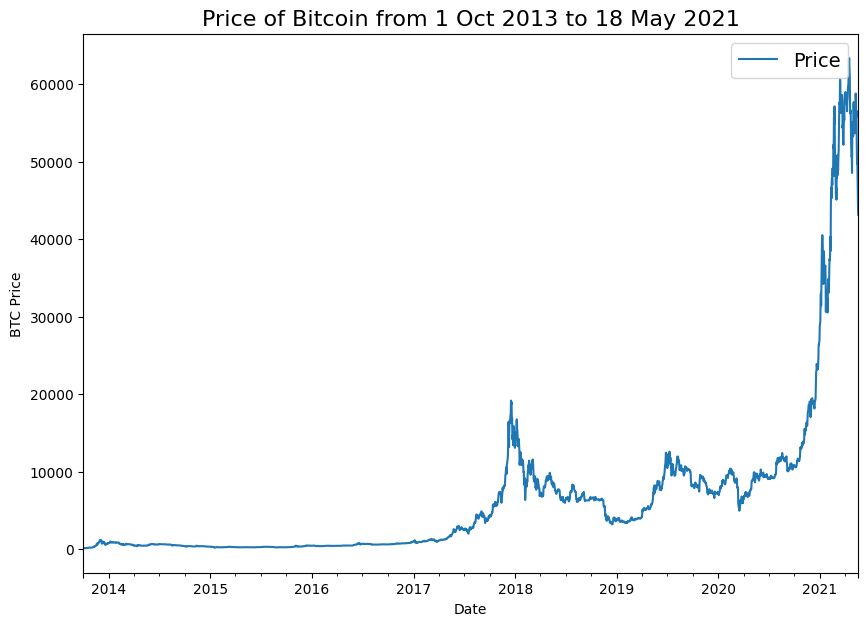

In [7]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10,7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021",fontsize=16)
plt.legend(fontsize=14);

## Import time series data with python's CSV modeule 

In [8]:
# Import and formatting historical Bitcoin data with Python 
import csv
from datetime import datetime

timesteps = []
btc_price = []
with open("./Data/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", "r") as f:
    csv_reader = csv.reader(f,delimiter=",")
    next(csv_reader) # Skip the first line
    for line in csv_reader:
        timesteps.append(datetime.strptime(line[1],"%Y-%m-%d")) # get dates as dates not strings
        btc_price.append(float(line[2])) # get the closing price as float 


timesteps[:10] , btc_price[:10]        

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

Text(0.5, 0, 'Date')

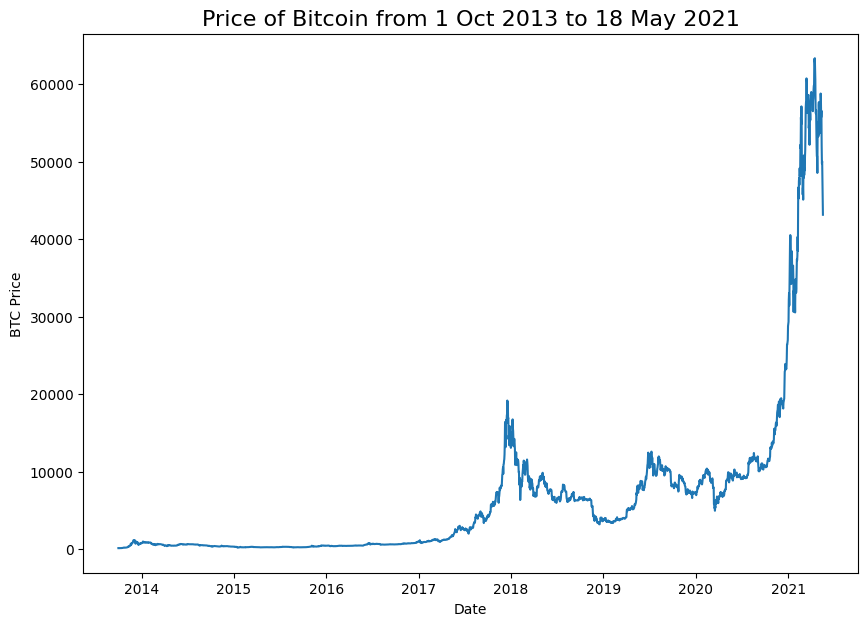

In [9]:
# Plot from Csv
import numpy as np
plt.figure(figsize=(10,7))
plt.plot(timesteps,btc_price)
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021",fontsize=16)
plt.xlabel("Date")

## Format data Part 1: Create train and test sets of our times series data

### Create train and test sets with time series data (the wrong way)

In [10]:
timesteps = np.asarray(timesteps)
btc_price = np.asarray(btc_price)

In [11]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(timesteps,
                                                      btc_price,
                                                       test_size=0.2,
                                                       random_state=42,
                                                      shuffle=True)
x_train

array([datetime.datetime(2015, 5, 23, 0, 0),
       datetime.datetime(2017, 11, 27, 0, 0),
       datetime.datetime(2019, 6, 1, 0, 0), ...,
       datetime.datetime(2016, 11, 4, 0, 0),
       datetime.datetime(2017, 4, 17, 0, 0),
       datetime.datetime(2016, 2, 8, 0, 0)], dtype=object)

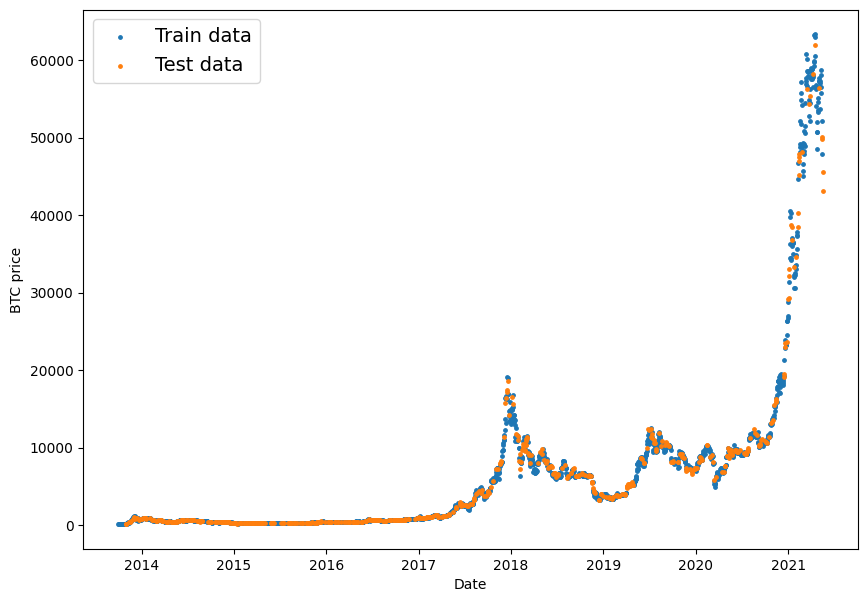

In [12]:
# Let's plot wrong train and test 
plt.figure(figsize=(10,7))
plt.scatter(x_train,y_train,s=6,label="Train data")
plt.scatter(x_test,y_test,s=6,label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC price")
plt.legend(fontsize=14);

 ## Creating train & test sets for time series (the right way)

In [13]:
# Create train and test spllit the right way
split_size = int(0.8 * len(btc_price)) # 80% train , 20% test 

# Create train data split
x_train , y_train = timesteps[:split_size] , btc_price[:split_size]

# Create test data split
x_test , y_test = timesteps[split_size:] , btc_price[split_size:]

len(x_train) , len(y_train) , len(x_test) , len(y_test)

(2229, 2229, 558, 558)

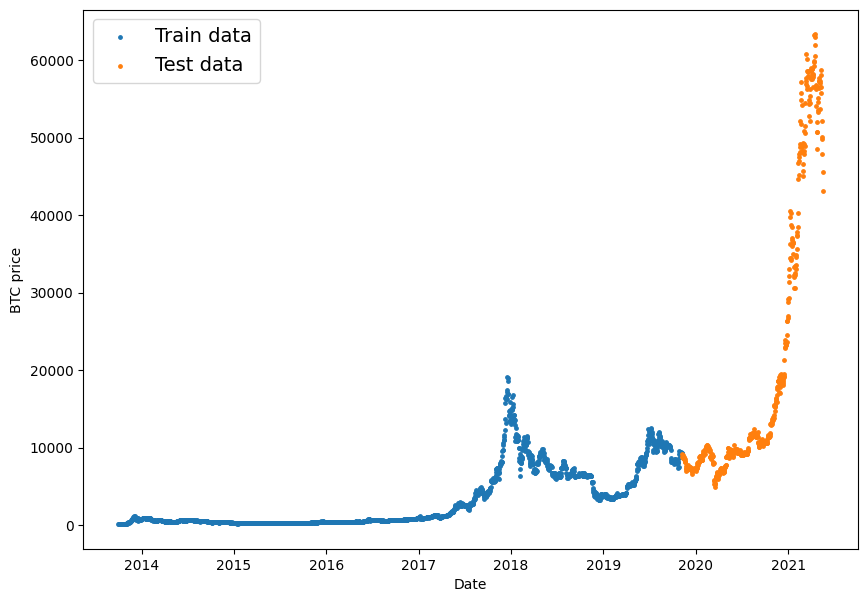

In [14]:
# Plot 
plt.figure(figsize=(10,7))
plt.scatter(x_train,y_train,s=6,label="Train data")
plt.scatter(x_test,y_test,s=6,label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC price")
plt.legend(fontsize=14);

In [15]:
def plot_times_series(timesteps,values,format=".",start=0,end=None,label=None):
    """
    Plots timesteps (aseries of points in time) against values (a series of values)
    
    Parameters
    ---------
    timesteps : array of timestep values
    values : array of values across time
    format : style of plot.default "."
    start : where to start the plot 
    end : where to end the plot
    label : label to show on plot about values , defalult None
    
    """
    
    plt.plot(timesteps[start:end],values[start:end],format , label=label)
    plt.xlabel("Time")
    plt.ylabel("BTC Price")
    if label:
        plt.legend(fontsize=14)
    plt.grid(True)

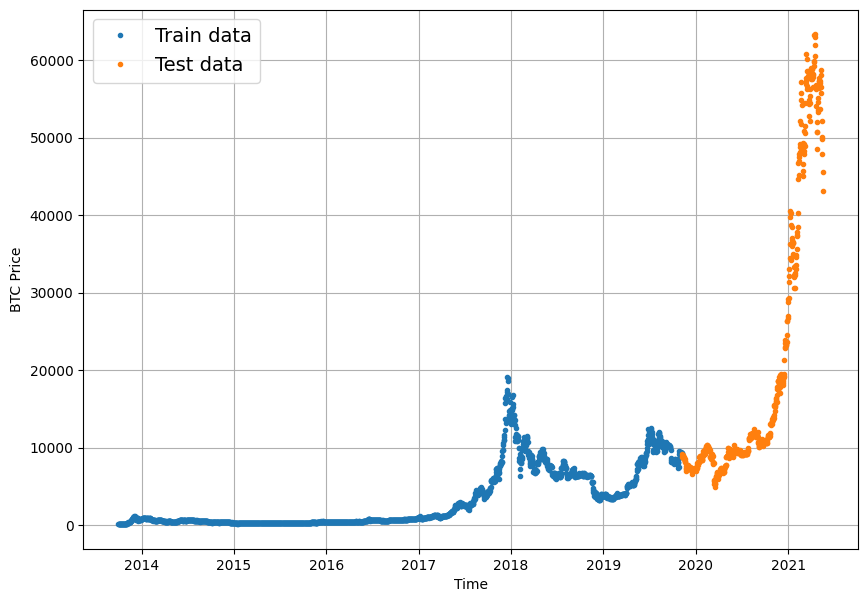

In [16]:
plt.figure(figsize=(10,7))
plot_times_series(x_train,y_train,label="Train data")
plot_times_series(x_test,y_test,label="Test data")

## Modeling Expriment

We can build almost any kind of model for our problem as long as the data inputs and outputs are formatted correctly.

However, just because we *can* build *almost any* kind of model, doesn't mean it'll perform well/should be used in a production setting.

We'll see what this means as we build and evaluate models throughout.

Before we discuss what modelling experiments we're going to run, there are two terms you should be familiar with, **horizon** and **window**. 
  * **horizon** = number of timesteps to predict into future
  * **window** = number of timesteps from past used to predict **horizon**

For example, if we wanted to predict the price of Bitcoin for tomorrow (1 day in the future) using the previous week's worth of Bitcoin prices (7 days in the past), the horizon would be 1 and the window would be 7.

Now, how about those modelling experiments?

| Model Number | Model Type | Horizon size | Window size | Extra data |
| ----- | ----- | ----- | ----- | ----- |
| 0 | Naïve model (baseline) | NA | NA | NA |
| 1 | Dense model | 1 | 7 | NA |
| 2 | Same as 1 | 1 | 30 | NA | 
| 3 | Same as 1 | 7 | 30 | NA |
| 4 | Conv1D | 1 | 7 | NA |
| 5 | LSTM | 1 | 7 | NA |
| 6 | Same as 1 (but with multivariate data) | 1 | 7 | Block reward size |
| 7 | [N-BEATs Algorithm](https://arxiv.org/pdf/1905.10437.pdf) | 1 | 7 | NA |
| 8 | Ensemble (multiple models optimized on different loss functions) | 1 | 7 | NA | 
| 9 | Future prediction model (model to predict future values) | 1 | 7 | NA| 
| 10 | Same as 1 (but with turkey 🦃 data introduced) | 1 | 7 | NA |

> 🔑 **Note:** To reiterate, as you can see, we can build many types of models for the data we're working with. But that doesn't mean that they'll perform well. Deep learning is a powerful technique but it doesn't always work. And as always, start with a simple model first and then add complexity as needed. 

## Model 0 : NAive forcast (baseline)

As usual, let's start with a baseline.

One of the most common baseline models for time series forecasting, the naïve model (also called the [naïve forecast](https://otexts.com/fpp3/simple-methods.html#na%C3%AFve-method)), requires no training at all.

That's because all the naïve model does is use the previous timestep value to predict the next timestep value.

The formula looks like this:

$$\hat{y}_{t} = y_{t-1}$$ 

In English: 
> The prediction at timestep `t` (y-hat) is equal to the value at timestep `t-1` (the previous timestep).

Sound simple?

Maybe not.

In an open system (like a stock market or crypto market), you'll often find beating the naïve forecast with *any* kind of model is quite hard.

> 🔑 **Note:** For the sake of this notebook, an **open system** is a system where inputs and outputs can freely flow, such as a market (stock or crypto). Where as, a **closed system** the inputs and outputs are contained within the system (like a poker game with your buddies, you know the buy in and you know how much the winner can get). Time series forecasting in **open systems** is generally quite poor.

In [17]:
y_test[:10] , y_test[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([58788.20967893, 58102.19142623, 55715.54665129, 56573.5554719 ,
        52147.82118698, 49764.1320816 , 50032.69313676, 47885.62525472,
        45604.61575361, 43144.47129086]))

In [18]:
naive_forcast = y_test[:-1]

naive_forcast[:10] , naive_forcast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

In [19]:
len(naive_forcast) , len(y_test)

(557, 558)

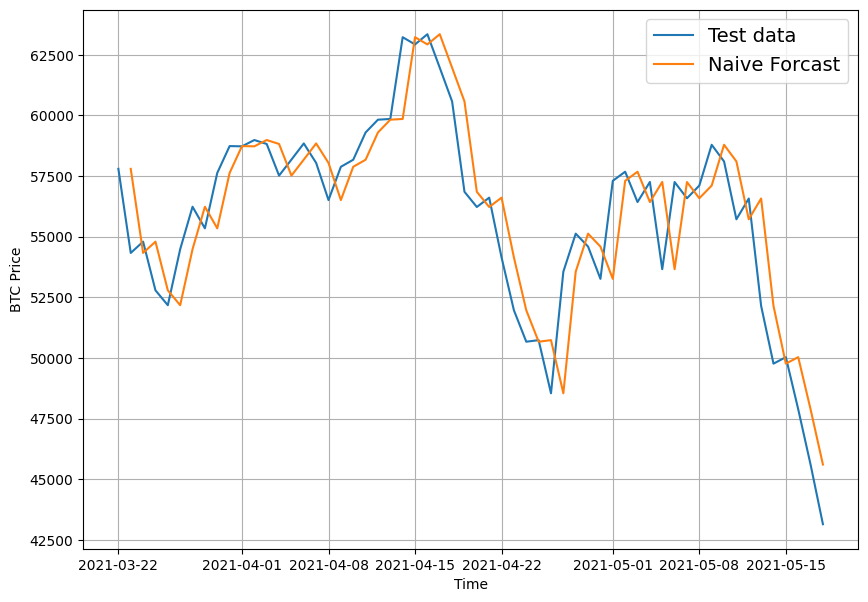

In [20]:
# Plot naive forcast
plt.figure(figsize=(10,7))
# plot_times_series(x_train,y_train,label="Train data")
plot_times_series(x_test,y_test,start=500,format="-",label="Test data")
plot_times_series(x_test[1:],naive_forcast,start=500,format="-",label="Naive Forcast")

## Evaluating a time series model

Time series forecasting often involves predicting a number (in our case, the price of Bitcoin).

And what kind of problem is predicting a number?

Ten points if you said regression.

With this known, we can use regression evaluation metrics to evaluate our time series forecasts.

The main thing we will be evaluating is: **how do our model's predictions (`y_pred`) compare against the actual values (`y_true` or *ground truth values*)**? 

> 📖 **Resource:** We're going to be using several metrics to evaluate our different model's time series forecast accuracy. Many of them are sourced and explained mathematically and conceptually in [Forecasting: Principles and Practice chapter 5.8](https://otexts.com/fpp3/accuracy.html), I'd recommend reading through here for a more in-depth overview of what we're going to practice.

For all of the following metrics, **lower is better** (for example an MAE of 0 is better than an MAE 100).



In [21]:
import tensorflow as tf

2023-09-25 15:16:42.119144: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-09-25 15:16:42.516480: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [22]:
# MASE implementation
def mean_absolute_scale_error(y_true,y_pred):
    """
    Implement MASE (assuming no seasonality of data)
    """
    
    mae = tf.reduce_mean(tf.abs(y_true - y_pred))
    mae = tf.cast(mae,dtype = tf.float32)
    # Find MAE of naive forcast (no seasonality)
    mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))
    
    mae_naive_no_season = tf.cast(mae_naive_no_season,dtype=tf.float32)

    return mae / mae_naive_no_season

In [23]:
mean_absolute_scale_error(np.asarray(y_test[1:]),np.asarray(naive_forcast))

2023-09-25 15:16:44.425094: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-25 15:16:44.457739: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-25 15:16:44.457843: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

<tf.Tensor: shape=(), dtype=float32, numpy=0.99957>

In [24]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scale_error(y_true, y_pred)

  # Account for different sized metrics (for longer horizons, reduce to single number)
  if mae.ndim > 0: # if mae isn't already a scalar, reduce it to one by aggregating tensors to mean
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [25]:
naive_results = evaluate_preds(np.asarray(y_test[1:]),np.asarray(naive_forcast))
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

Can't use transfer learning for timeseries problems , because the data always changing during the time.

## Format Data Part 2 : Windowing our dataset

Why do we window?

Windowing is a method to turn a time series dataset into **supervised learning problem**. 


In [26]:
# What we want to do with our Bitcoin data ?
print(f"We want to use this : {btc_price[:7]} to predict this :{btc_price[7]}")

We want to use this : [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] to predict this :123.033


In [27]:
# Let's setup global variable for window and horizon siz
HORIZON = 1 # Predict next 1 day 
WINDOW_SIZE = 7 # use the past week of bitcoin data to make predictions 

In [28]:
# Create function to label windowed data
def get_labelled_window (x,horizon=HORIZON):
    """
    Create labels for windowed dataset
    
    E.g if horizon =1 
    
    Input: [0,1,2,3,4,5,6,7] - > output : ([0,1,2,3,4,5,6],[7])
    
    """
    return (x[:,:-horizon] , x[:,-horizon:])
    

In [29]:
tf.range(8)+1

<tf.Tensor: shape=(8,), dtype=int32, numpy=array([1, 2, 3, 4, 5, 6, 7, 8], dtype=int32)>

In [30]:
tf.expand_dims(tf.range(8)+1,axis=0)

<tf.Tensor: shape=(1, 8), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7, 8]], dtype=int32)>

In [31]:
# Test out the window labelling fuction

test_window , test_label = get_labelled_window(tf.expand_dims(tf.range(8)+1,axis=0))
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [1 2 3 4 5 6 7] -> Label: 8


we've got a way to label our windowed data.

However , this only works on a small scale.

we need a way to do the above across our entire time serires.

In [32]:
get_labelled_window(tf.expand_dims(btc_price,axis=0)) , len(btc_price)

((<tf.Tensor: shape=(1, 2786), dtype=float64, numpy=
  array([[  123.65499   ,   125.455     ,   108.58483   , ...,
          50032.69313676, 47885.62525472, 45604.61575361]])>,
  <tf.Tensor: shape=(1, 1), dtype=float64, numpy=array([[43144.47129086]])>),
 2787)

## Window slicing method 1 
this method is not the best way to make superwise dataset , because
it make our dataset very small

In [33]:
2787 % 7

1

In [34]:
btc_price_2 = btc_price[:-1]

In [35]:
pd.DataFrame(btc_price_2.reshape((-1,7)))

,0,1,2,3,4,5,6
0,123.654990,125.455000,108.584830,118.674660,121.338660,120.655330,121.795000
1,123.033000,124.049000,125.961160,125.279660,125.927500,126.383330,135.241990
2,133.203330,142.763330,137.923330,142.951660,152.551830,160.338830,164.314990
3,177.633330,188.297160,200.701660,180.355000,175.031660,177.696500,187.159830
4,192.756660,197.400000,196.024990,198.048830,198.932330,200.543000,210.307500
...,...,...,...,...,...,...,...
393,59853.197242,63223.884391,62926.557176,63346.789035,61965.782598,60574.444728,56850.830166
394,56224.101588,56608.769748,54144.427476,51965.059559,50669.144382,50733.769504,48542.952203
395,53558.707845,55123.861981,54591.515326,53260.295341,57302.646424,57677.975222,56427.043125
396,57255.306838,53658.843121,57252.702185,56583.849879,57107.120672,58788.209679,58102.191426


In [36]:
btc_price_2.shape , btc_price_2.reshape((-1,7)).shape , btc_price_2.reshape(-1,7)[0]

((2786,),
 (398, 7),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  ]))

In [37]:
reshape_btc_price = btc_price_2.reshape(-1,7)

In [38]:
window_dataset = [get_labelled_window(np.expand_dims(x,axis=0)) for x  in reshape_btc_price]
window_dataset[0]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533]]),
 array([[121.795]]))

In [39]:
len(window_dataset)

398

## Window slicing method 2 


In [40]:
import numpy as np 
# Create function to view Numpy arrays as windows

def make_windows(x,window_size=WINDOW_SIZE,horizon = HORIZON):
    """
    Turns a 1D array into a 2D aaray of sequential labelled windows of window_size with horizon size labels 
    """
    window_step = np.expand_dims(np.arange(window_size+horizon),axis=0)
    
    
    window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)),axis=1)
    
    #print(f"Window indexes:\n{window_indexes,window_indexes.shape}")
    
    window_array = x[window_indexes]
    
    
    return get_labelled_window(window_array,horizon=horizon)

In [41]:
np.expand_dims(np.arange(8),axis=0).shape,np.expand_dims(np.arange(len(btc_price)-(7)),axis=1).shape,np.expand_dims(np.arange(8),axis=0),np.expand_dims(np.arange(len(btc_price)-(7)),axis=1)

((1, 8),
 (2780, 1),
 array([[0, 1, 2, 3, 4, 5, 6, 7]]),
 array([[   0],
        [   1],
        [   2],
        ...,
        [2777],
        [2778],
        [2779]]))

In [42]:
(np.arange(8)+np.expand_dims(np.arange(len(btc_price)-(7)),axis=1))

array([[   0,    1,    2, ...,    5,    6,    7],
       [   1,    2,    3, ...,    6,    7,    8],
       [   2,    3,    4, ...,    7,    8,    9],
       ...,
       [2777, 2778, 2779, ..., 2782, 2783, 2784],
       [2778, 2779, 2780, ..., 2783, 2784, 2785],
       [2779, 2780, 2781, ..., 2784, 2785, 2786]])

In [43]:
full_windows , full_labels = make_windows(btc_price)
len(full_windows) , len(full_labels) , len(btc_price)

(2780, 2780, 2787)

In [44]:
for i in range(3):
    print(f"Window: {full_windows[i-3]} -> Label: {full_labels[i-3]}")

Window: [58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676] -> Label: [47885.62525472]
Window: [58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472] -> Label: [45604.61575361]
Window: [55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] -> Label: [43144.47129086]


 ## Turning windows into training and test sets

In [45]:
# Make the train/test splits
def make_train_test_splits(windows,labels,test_split=0.2):
    """
    Splits matching pairs of windows and labels into train and test splits.
    """
    split_size = int(len(windows)*(1-test_split))
    train_windows = windows[:split_size]
    train_labels = labels[:split_size]
    test_windows = windows[split_size:]
    test_labels = labels[split_size:]
    return train_windows , test_windows , train_labels , test_labels

In [46]:
# Create train and test windows
train_windows , test_windows , train_labels , test_labels = make_train_test_splits(full_windows,full_labels)
full_windows.shape,full_labels.shape , len(train_windows), len(test_windows) , len(train_labels) , len(test_labels) , train_windows.shape

((2780, 7), (2780, 1), 2224, 556, 2224, 556, (2224, 7))

In [47]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_windows,train_labels)).batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset= tf.data.Dataset.from_tensor_slices((test_windows,test_labels)).batch(32).prefetch(tf.data.AUTOTUNE)
train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None, 1), dtype=tf.float64, name=None))>

## Make a modelling checkpoint



In [48]:
import os

# Create a functions to implement a Modelcheckpoint callbaxk
def creat_model_checkpoint(model_name , save_path="model_expriments"):
    return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path,model_name),verbose=0
                                              ,save_best_only=True)

In [49]:
train_windows.shape , train_labels.shape

((2224, 7), (2224, 1))

In [50]:
HORIZON

1

In [51]:
import tensorflow as tf
from tensorflow.keras import layers

# set random seed for as reproducible results as possible
tf.random.set_seed(42)

# 1. Construct model
inputs = layers.Input(shape=(7,))
x = layers.Dense(128,activation="relu")(inputs)
outputs = layers.Dense(HORIZON,activation="linear")(x) # linear activation is the same as having no activation
model_1 = tf.keras.Model(inputs,outputs)

# 2. Compile
model_1.compile(loss="mae",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["mae" , "mse"])

# 3. Fit the model
model_1.fit(train_windows,
            train_labels,
          epochs=100,
         verbose=1,
         batch_size=128,
         validation_data = (test_windows,test_labels),
         callbacks = [creat_model_checkpoint("model_1_dense")])

Epoch 1/100


2023-09-25 15:16:45.755621: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-09-25 15:16:45.824396: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f94d028a200 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-09-25 15:16:45.824423: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2023-09-25 15:16:45.880383: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-09-25 15:16:45.967029: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2023-09-25 15:16:46.205214: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifeti

 1/18 [>.............................] - ETA: 17s - loss: 3473.4761 - mae: 3473.4761 - mse: 24921844.0000INFO:tensorflow:Assets written to: model_expriments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_expriments/model_1_dense/assets


18/18 [==============================] - 1s 25ms/step - loss: 1398.6414 - mae: 1398.6414 - mse: 7077045.5000 - val_loss: 3094.3096 - val_mae: 3094.3096 - val_mse: 23170050.0000
Epoch 2/100
 1/18 [>.............................] - ETA: 0s - loss: 486.0875 - mae: 486.0875 - mse: 1117358.7500INFO:tensorflow:Assets written to: model_expriments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_expriments/model_1_dense/assets


18/18 [==============================] - 0s 13ms/step - loss: 397.3111 - mae: 397.3111 - mse: 646650.5625 - val_loss: 1825.4410 - val_mae: 1825.4410 - val_mse: 8406708.0000
Epoch 3/100
 1/18 [>.............................] - ETA: 0s - loss: 233.0137 - mae: 233.0137 - mse: 199001.6875INFO:tensorflow:Assets written to: model_expriments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_expriments/model_1_dense/assets


18/18 [==============================] - 0s 13ms/step - loss: 238.3450 - mae: 238.3450 - mse: 279395.7500 - val_loss: 1269.7649 - val_mae: 1269.7649 - val_mse: 4851216.5000
Epoch 4/100
 1/18 [>.............................] - ETA: 0s - loss: 270.7569 - mae: 270.7569 - mse: 312266.8125INFO:tensorflow:Assets written to: model_expriments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_expriments/model_1_dense/assets


18/18 [==============================] - 0s 19ms/step - loss: 211.2931 - mae: 211.2931 - mse: 229463.6875 - val_loss: 1120.0929 - val_mae: 1120.0929 - val_mse: 4112432.0000
Epoch 5/100
 1/18 [>.............................] - ETA: 0s - loss: 199.7247 - mae: 199.7247 - mse: 147556.7500INFO:tensorflow:Assets written to: model_expriments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_expriments/model_1_dense/assets


18/18 [==============================] - 0s 16ms/step - loss: 200.5326 - mae: 200.5326 - mse: 210751.0000 - val_loss: 1087.4340 - val_mae: 1087.4340 - val_mse: 3792359.2500
Epoch 6/100
 1/18 [>.............................] - ETA: 0s - loss: 145.4012 - mae: 145.4012 - mse: 77765.9141INFO:tensorflow:Assets written to: model_expriments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_expriments/model_1_dense/assets


18/18 [==============================] - 0s 15ms/step - loss: 191.6467 - mae: 191.6467 - mse: 190372.7031 - val_loss: 1017.8534 - val_mae: 1017.8534 - val_mse: 3414650.5000
Epoch 7/100
 1/18 [>.............................] - ETA: 0s - loss: 216.7675 - mae: 216.7675 - mse: 328656.6250INFO:tensorflow:Assets written to: model_expriments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_expriments/model_1_dense/assets


18/18 [==============================] - 0s 15ms/step - loss: 174.0940 - mae: 174.0940 - mse: 163264.0469 - val_loss: 944.7226 - val_mae: 944.7226 - val_mse: 2884321.5000
Epoch 8/100
 1/18 [>.............................] - ETA: 0s - loss: 133.7053 - mae: 133.7053 - mse: 74719.5859INFO:tensorflow:Assets written to: model_expriments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_expriments/model_1_dense/assets


18/18 [==============================] - 0s 13ms/step - loss: 163.6534 - mae: 163.6534 - mse: 146079.5625 - val_loss: 897.2573 - val_mae: 897.2573 - val_mse: 2682528.7500
Epoch 9/100
 1/18 [>.............................] - ETA: 0s - loss: 130.1012 - mae: 130.1012 - mse: 75249.3906INFO:tensorflow:Assets written to: model_expriments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_expriments/model_1_dense/assets


18/18 [==============================] - 0s 13ms/step - loss: 164.0037 - mae: 164.0037 - mse: 141777.1875 - val_loss: 858.8233 - val_mae: 858.8233 - val_mse: 2437010.2500
Epoch 10/100
 1/18 [>.............................] - ETA: 0s - loss: 158.7401 - mae: 158.7401 - mse: 179592.5312INFO:tensorflow:Assets written to: model_expriments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_expriments/model_1_dense/assets


18/18 [==============================] - 0s 14ms/step - loss: 153.5078 - mae: 153.5078 - mse: 131253.6875 - val_loss: 829.8989 - val_mae: 829.8989 - val_mse: 2272432.2500
Epoch 11/100
18/18 [==============================] - 0s 2ms/step - loss: 145.3009 - mae: 145.3009 - mse: 119307.4766 - val_loss: 860.3635 - val_mae: 860.3635 - val_mse: 2262474.7500
Epoch 12/100
18/18 [==============================] - 0s 2ms/step - loss: 143.4550 - mae: 143.4550 - mse: 115065.1484 - val_loss: 931.5295 - val_mae: 931.5295 - val_mse: 2430950.5000
Epoch 13/100
 1/18 [>.............................] - ETA: 0s - loss: 141.7276 - mae: 141.7276 - mse: 110518.4453INFO:tensorflow:Assets written to: model_expriments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_expriments/model_1_dense/assets


18/18 [==============================] - 0s 13ms/step - loss: 144.6246 - mae: 144.6246 - mse: 113968.4688 - val_loss: 812.9304 - val_mae: 812.9304 - val_mse: 2031299.2500
Epoch 14/100
 1/18 [>.............................] - ETA: 0s - loss: 135.5339 - mae: 135.5339 - mse: 77457.5859INFO:tensorflow:Assets written to: model_expriments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_expriments/model_1_dense/assets


18/18 [==============================] - 0s 13ms/step - loss: 135.7759 - mae: 135.7759 - mse: 104358.1172 - val_loss: 795.3599 - val_mae: 795.3599 - val_mse: 1940325.2500
Epoch 15/100
 1/18 [>.............................] - ETA: 0s - loss: 136.9366 - mae: 136.9366 - mse: 69872.0781INFO:tensorflow:Assets written to: model_expriments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_expriments/model_1_dense/assets


18/18 [==============================] - 0s 13ms/step - loss: 135.6438 - mae: 135.6438 - mse: 101988.8672 - val_loss: 726.1432 - val_mae: 726.1432 - val_mse: 1760615.3750
Epoch 16/100
 1/18 [>.............................] - ETA: 0s - loss: 122.1872 - mae: 122.1872 - mse: 59066.9141INFO:tensorflow:Assets written to: model_expriments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_expriments/model_1_dense/assets


18/18 [==============================] - 0s 13ms/step - loss: 128.9640 - mae: 128.9640 - mse: 95266.1953 - val_loss: 712.5298 - val_mae: 712.5298 - val_mse: 1680499.6250
Epoch 17/100
18/18 [==============================] - 0s 2ms/step - loss: 127.7875 - mae: 127.7875 - mse: 94797.4375 - val_loss: 732.5715 - val_mae: 732.5715 - val_mse: 1686773.1250
Epoch 18/100
 1/18 [>.............................] - ETA: 0s - loss: 136.3324 - mae: 136.3324 - mse: 99508.6562INFO:tensorflow:Assets written to: model_expriments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_expriments/model_1_dense/assets


18/18 [==============================] - 0s 13ms/step - loss: 126.1221 - mae: 126.1221 - mse: 91794.7031 - val_loss: 685.3304 - val_mae: 685.3304 - val_mse: 1574141.5000
Epoch 19/100
18/18 [==============================] - 0s 2ms/step - loss: 124.7720 - mae: 124.7720 - mse: 89636.0781 - val_loss: 721.5984 - val_mae: 721.5984 - val_mse: 1624011.7500
Epoch 20/100
18/18 [==============================] - 0s 2ms/step - loss: 123.1446 - mae: 123.1446 - mse: 86682.3438 - val_loss: 725.1321 - val_mae: 725.1321 - val_mse: 1746297.6250
Epoch 21/100
 1/18 [>.............................] - ETA: 0s - loss: 169.6581 - mae: 169.6581 - mse: 120001.2422INFO:tensorflow:Assets written to: model_expriments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_expriments/model_1_dense/assets


18/18 [==============================] - 0s 13ms/step - loss: 129.3048 - mae: 129.3048 - mse: 94976.5938 - val_loss: 678.2020 - val_mae: 678.2020 - val_mse: 1491481.6250
Epoch 22/100
18/18 [==============================] - 0s 2ms/step - loss: 119.5320 - mae: 119.5320 - mse: 84008.9531 - val_loss: 690.2465 - val_mae: 690.2465 - val_mse: 1513231.7500
Epoch 23/100
 1/18 [>.............................] - ETA: 0s - loss: 112.4173 - mae: 112.4173 - mse: 55981.6953INFO:tensorflow:Assets written to: model_expriments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_expriments/model_1_dense/assets


18/18 [==============================] - 0s 13ms/step - loss: 119.8466 - mae: 119.8466 - mse: 81722.8125 - val_loss: 646.9996 - val_mae: 646.9996 - val_mse: 1432653.7500
Epoch 24/100
18/18 [==============================] - 0s 2ms/step - loss: 117.7706 - mae: 117.7706 - mse: 82206.7188 - val_loss: 668.0335 - val_mae: 668.0335 - val_mse: 1443973.5000
Epoch 25/100
 1/18 [>.............................] - ETA: 0s - loss: 130.4180 - mae: 130.4180 - mse: 68738.8125INFO:tensorflow:Assets written to: model_expriments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_expriments/model_1_dense/assets


18/18 [==============================] - 0s 13ms/step - loss: 116.1140 - mae: 116.1140 - mse: 79333.1250 - val_loss: 644.9462 - val_mae: 644.9462 - val_mse: 1437070.1250
Epoch 26/100
 1/18 [>.............................] - ETA: 0s - loss: 119.7145 - mae: 119.7145 - mse: 64903.8086INFO:tensorflow:Assets written to: model_expriments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_expriments/model_1_dense/assets


18/18 [==============================] - 0s 13ms/step - loss: 116.6048 - mae: 116.6048 - mse: 79406.9922 - val_loss: 629.5633 - val_mae: 629.5633 - val_mse: 1348786.8750
Epoch 27/100
18/18 [==============================] - 0s 2ms/step - loss: 115.6547 - mae: 115.6547 - mse: 78309.1719 - val_loss: 650.1129 - val_mae: 650.1129 - val_mse: 1446716.6250
Epoch 28/100
 1/18 [>.............................] - ETA: 0s - loss: 110.6448 - mae: 110.6448 - mse: 57905.4766INFO:tensorflow:Assets written to: model_expriments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_expriments/model_1_dense/assets


18/18 [==============================] - 0s 20ms/step - loss: 114.4111 - mae: 114.4111 - mse: 77065.9062 - val_loss: 622.2314 - val_mae: 622.2314 - val_mse: 1319751.1250
Epoch 29/100
 1/18 [>.............................] - ETA: 0s - loss: 108.3776 - mae: 108.3776 - mse: 73878.7109INFO:tensorflow:Assets written to: model_expriments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_expriments/model_1_dense/assets


18/18 [==============================] - 0s 13ms/step - loss: 115.3229 - mae: 115.3229 - mse: 76744.7969 - val_loss: 615.0968 - val_mae: 615.0968 - val_mse: 1322023.8750
Epoch 30/100
 1/18 [>.............................] - ETA: 0s - loss: 126.9482 - mae: 126.9482 - mse: 89465.7656INFO:tensorflow:Assets written to: model_expriments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_expriments/model_1_dense/assets


18/18 [==============================] - 0s 14ms/step - loss: 117.0629 - mae: 117.0629 - mse: 79118.3594 - val_loss: 608.1421 - val_mae: 608.1421 - val_mse: 1287007.2500
Epoch 31/100
18/18 [==============================] - 0s 2ms/step - loss: 113.0048 - mae: 113.0048 - mse: 74681.8047 - val_loss: 611.0981 - val_mae: 611.0981 - val_mse: 1284797.7500
Epoch 32/100
18/18 [==============================] - 0s 2ms/step - loss: 111.3850 - mae: 111.3850 - mse: 74748.6641 - val_loss: 638.5430 - val_mae: 638.5430 - val_mse: 1343759.0000
Epoch 33/100
 1/18 [>.............................] - ETA: 0s - loss: 145.4872 - mae: 145.4872 - mse: 139370.4219INFO:tensorflow:Assets written to: model_expriments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_expriments/model_1_dense/assets


18/18 [==============================] - 0s 13ms/step - loss: 110.5907 - mae: 110.5907 - mse: 72460.7422 - val_loss: 606.1594 - val_mae: 606.1594 - val_mse: 1267736.6250
Epoch 34/100
 1/18 [>.............................] - ETA: 0s - loss: 136.1996 - mae: 136.1996 - mse: 136864.6875INFO:tensorflow:Assets written to: model_expriments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_expriments/model_1_dense/assets


18/18 [==============================] - 0s 13ms/step - loss: 110.2224 - mae: 110.2224 - mse: 74211.3281 - val_loss: 599.4357 - val_mae: 599.4357 - val_mse: 1265718.7500
Epoch 35/100
18/18 [==============================] - 0s 2ms/step - loss: 111.4667 - mae: 111.4667 - mse: 73696.7969 - val_loss: 611.6694 - val_mae: 611.6694 - val_mse: 1272882.5000
Epoch 36/100
 1/18 [>.............................] - ETA: 0s - loss: 148.5403 - mae: 148.5403 - mse: 138211.1562INFO:tensorflow:Assets written to: model_expriments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_expriments/model_1_dense/assets


18/18 [==============================] - 0s 13ms/step - loss: 111.7383 - mae: 111.7383 - mse: 70994.9141 - val_loss: 592.0328 - val_mae: 592.0328 - val_mse: 1240978.8750
Epoch 37/100
 1/18 [>.............................] - ETA: 0s - loss: 129.9289 - mae: 129.9289 - mse: 117736.2578INFO:tensorflow:Assets written to: model_expriments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_expriments/model_1_dense/assets


18/18 [==============================] - 0s 13ms/step - loss: 109.2052 - mae: 109.2052 - mse: 72187.6250 - val_loss: 589.0897 - val_mae: 589.0897 - val_mse: 1228904.7500
Epoch 38/100
 1/18 [>.............................] - ETA: 0s - loss: 106.6539 - mae: 106.6539 - mse: 70882.4688INFO:tensorflow:Assets written to: model_expriments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_expriments/model_1_dense/assets


18/18 [==============================] - 0s 14ms/step - loss: 108.9752 - mae: 108.9752 - mse: 71680.9219 - val_loss: 588.1613 - val_mae: 588.1613 - val_mse: 1230018.3750
Epoch 39/100
18/18 [==============================] - 0s 2ms/step - loss: 110.4902 - mae: 110.4902 - mse: 72900.9922 - val_loss: 594.2475 - val_mae: 594.2475 - val_mse: 1228827.8750
Epoch 40/100
18/18 [==============================] - 0s 2ms/step - loss: 109.1343 - mae: 109.1343 - mse: 70072.2500 - val_loss: 620.0464 - val_mae: 620.0464 - val_mse: 1317187.7500
Epoch 41/100
 1/18 [>.............................] - ETA: 0s - loss: 111.1335 - mae: 111.1335 - mse: 56914.4297INFO:tensorflow:Assets written to: model_expriments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_expriments/model_1_dense/assets


18/18 [==============================] - 0s 14ms/step - loss: 107.9778 - mae: 107.9778 - mse: 70963.7031 - val_loss: 585.9810 - val_mae: 585.9810 - val_mse: 1214681.3750
Epoch 42/100
18/18 [==============================] - 0s 2ms/step - loss: 111.7847 - mae: 111.7847 - mse: 73861.4453 - val_loss: 650.0820 - val_mae: 650.0820 - val_mse: 1347097.1250
Epoch 43/100
18/18 [==============================] - 0s 3ms/step - loss: 112.7467 - mae: 112.7467 - mse: 70021.6953 - val_loss: 663.8926 - val_mae: 663.8926 - val_mse: 1425070.7500
Epoch 44/100
18/18 [==============================] - 0s 2ms/step - loss: 110.6023 - mae: 110.6023 - mse: 70028.8594 - val_loss: 589.1711 - val_mae: 589.1711 - val_mse: 1214876.5000
Epoch 45/100
18/18 [==============================] - 0s 2ms/step - loss: 108.1152 - mae: 108.1152 - mse: 69204.3516 - val_loss: 588.8210 - val_mae: 588.8210 - val_mse: 1233638.2500
Epoch 46/100
18/18 [==============================] - 0s 2ms/step - loss: 108.3505 - mae: 108.3505 - m

INFO:tensorflow:Assets written to: model_expriments/model_1_dense/assets


18/18 [==============================] - 0s 13ms/step - loss: 105.9154 - mae: 105.9154 - mse: 69271.8828 - val_loss: 582.5328 - val_mae: 582.5328 - val_mse: 1202285.8750
Epoch 49/100
18/18 [==============================] - 0s 2ms/step - loss: 109.0173 - mae: 109.0173 - mse: 71216.8516 - val_loss: 706.3958 - val_mae: 706.3958 - val_mse: 1469466.3750
Epoch 50/100
18/18 [==============================] - 0s 2ms/step - loss: 115.4862 - mae: 115.4862 - mse: 74056.1328 - val_loss: 693.0720 - val_mae: 693.0721 - val_mse: 1503352.8750
Epoch 51/100
18/18 [==============================] - 0s 2ms/step - loss: 113.8969 - mae: 113.8969 - mse: 73003.4922 - val_loss: 607.6623 - val_mae: 607.6623 - val_mse: 1246296.0000
Epoch 52/100
18/18 [==============================] - 0s 2ms/step - loss: 111.5269 - mae: 111.5269 - mse: 71727.8906 - val_loss: 601.9695 - val_mae: 601.9695 - val_mse: 1262707.7500
Epoch 53/100
18/18 [==============================] - 0s 2ms/step - loss: 108.5449 - mae: 108.5449 - m

INFO:tensorflow:Assets written to: model_expriments/model_1_dense/assets


18/18 [==============================] - 0s 14ms/step - loss: 108.3151 - mae: 108.3151 - mse: 70722.0625 - val_loss: 579.8599 - val_mae: 579.8599 - val_mse: 1199686.8750
Epoch 56/100
18/18 [==============================] - 0s 2ms/step - loss: 105.7542 - mae: 105.7542 - mse: 69041.8047 - val_loss: 654.8938 - val_mae: 654.8938 - val_mse: 1392253.1250
Epoch 57/100
18/18 [==============================] - 0s 2ms/step - loss: 109.8847 - mae: 109.8847 - mse: 70707.4922 - val_loss: 660.8844 - val_mae: 660.8844 - val_mse: 1355480.1250
Epoch 58/100
 1/18 [>.............................] - ETA: 0s - loss: 100.9181 - mae: 100.9181 - mse: 49502.1641INFO:tensorflow:Assets written to: model_expriments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_expriments/model_1_dense/assets


18/18 [==============================] - 0s 14ms/step - loss: 106.2058 - mae: 106.2058 - mse: 68742.0625 - val_loss: 577.4932 - val_mae: 577.4932 - val_mse: 1190278.0000
Epoch 59/100
18/18 [==============================] - 0s 2ms/step - loss: 105.0289 - mae: 105.0289 - mse: 68739.3125 - val_loss: 593.4659 - val_mae: 593.4659 - val_mse: 1240923.1250
Epoch 60/100
18/18 [==============================] - 0s 2ms/step - loss: 108.1733 - mae: 108.1733 - mse: 69866.9062 - val_loss: 595.7733 - val_mae: 595.7733 - val_mse: 1217671.3750
Epoch 61/100
 1/18 [>.............................] - ETA: 0s - loss: 129.6665 - mae: 129.6665 - mse: 92835.1719INFO:tensorflow:Assets written to: model_expriments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_expriments/model_1_dense/assets


18/18 [==============================] - 0s 13ms/step - loss: 106.1520 - mae: 106.1520 - mse: 68436.5078 - val_loss: 574.4148 - val_mae: 574.4148 - val_mse: 1180101.6250
Epoch 62/100
18/18 [==============================] - 0s 2ms/step - loss: 104.1526 - mae: 104.1526 - mse: 67266.6562 - val_loss: 592.9573 - val_mae: 592.9573 - val_mse: 1211427.8750
Epoch 63/100
 1/18 [>.............................] - ETA: 0s - loss: 92.0327 - mae: 92.0327 - mse: 59260.2578INFO:tensorflow:Assets written to: model_expriments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_expriments/model_1_dense/assets


18/18 [==============================] - 0s 14ms/step - loss: 104.9107 - mae: 104.9107 - mse: 67279.7969 - val_loss: 573.9144 - val_mae: 573.9144 - val_mse: 1177219.8750
Epoch 64/100
18/18 [==============================] - 0s 2ms/step - loss: 107.0843 - mae: 107.0843 - mse: 69095.2891 - val_loss: 575.6941 - val_mae: 575.6941 - val_mse: 1182999.0000
Epoch 65/100
 1/18 [>.............................] - ETA: 0s - loss: 122.0491 - mae: 122.0491 - mse: 147074.7812INFO:tensorflow:Assets written to: model_expriments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_expriments/model_1_dense/assets


18/18 [==============================] - 0s 14ms/step - loss: 106.5405 - mae: 106.5405 - mse: 69345.2500 - val_loss: 573.8116 - val_mae: 573.8116 - val_mse: 1178592.7500
Epoch 66/100
18/18 [==============================] - 0s 2ms/step - loss: 104.2017 - mae: 104.2017 - mse: 67502.6484 - val_loss: 576.2280 - val_mae: 576.2280 - val_mse: 1183529.5000
Epoch 67/100
18/18 [==============================] - 0s 2ms/step - loss: 104.9110 - mae: 104.9110 - mse: 67466.3125 - val_loss: 709.6551 - val_mae: 709.6551 - val_mse: 1535438.2500
Epoch 68/100
18/18 [==============================] - 0s 2ms/step - loss: 110.5254 - mae: 110.5254 - mse: 68257.8906 - val_loss: 581.3311 - val_mae: 581.3311 - val_mse: 1204742.1250
Epoch 69/100
18/18 [==============================] - 0s 3ms/step - loss: 118.5444 - mae: 118.5444 - mse: 73206.9375 - val_loss: 798.9286 - val_mae: 798.9286 - val_mse: 1736481.6250
Epoch 70/100
18/18 [==============================] - 0s 3ms/step - loss: 124.8610 - mae: 124.8610 - m

INFO:tensorflow:Assets written to: model_expriments/model_1_dense/assets


18/18 [==============================] - 0s 13ms/step - loss: 109.1355 - mae: 109.1355 - mse: 70634.4062 - val_loss: 573.5511 - val_mae: 573.5511 - val_mse: 1176378.8750
Epoch 77/100
18/18 [==============================] - 0s 2ms/step - loss: 103.5097 - mae: 103.5097 - mse: 66400.4453 - val_loss: 579.6935 - val_mae: 579.6935 - val_mse: 1196298.6250
Epoch 78/100
18/18 [==============================] - 0s 2ms/step - loss: 105.9581 - mae: 105.9581 - mse: 66763.4844 - val_loss: 574.6722 - val_mae: 574.6722 - val_mse: 1179810.2500
Epoch 79/100
18/18 [==============================] - 0s 2ms/step - loss: 105.0970 - mae: 105.0970 - mse: 67965.8359 - val_loss: 609.9897 - val_mae: 609.9897 - val_mse: 1278381.8750
Epoch 80/100
18/18 [==============================] - 0s 3ms/step - loss: 109.9488 - mae: 109.9488 - mse: 71718.9453 - val_loss: 606.9428 - val_mae: 606.9428 - val_mse: 1235010.5000
Epoch 81/100
18/18 [==============================] - 0s 2ms/step - loss: 105.0019 - mae: 105.0019 - m

INFO:tensorflow:Assets written to: model_expriments/model_1_dense/assets


18/18 [==============================] - 0s 13ms/step - loss: 110.2052 - mae: 110.2052 - mse: 70084.8281 - val_loss: 571.0210 - val_mae: 571.0210 - val_mse: 1165946.7500
Epoch 92/100
18/18 [==============================] - 0s 2ms/step - loss: 107.9994 - mae: 107.9994 - mse: 69220.2031 - val_loss: 606.4611 - val_mae: 606.4611 - val_mse: 1261502.5000
Epoch 93/100
18/18 [==============================] - 0s 2ms/step - loss: 115.0455 - mae: 115.0455 - mse: 71533.1328 - val_loss: 604.2286 - val_mae: 604.2286 - val_mse: 1257821.7500
Epoch 94/100
18/18 [==============================] - 0s 2ms/step - loss: 117.1767 - mae: 117.1767 - mse: 75969.1562 - val_loss: 631.0940 - val_mae: 631.0940 - val_mse: 1285145.0000
Epoch 95/100
18/18 [==============================] - 0s 2ms/step - loss: 105.3179 - mae: 105.3179 - mse: 65948.1094 - val_loss: 577.6489 - val_mae: 577.6489 - val_mse: 1189827.7500
Epoch 96/100
18/18 [==============================] - 0s 2ms/step - loss: 108.4497 - mae: 108.4497 - m

INFO:tensorflow:Assets written to: model_expriments/model_1_dense/assets


18/18 [==============================] - 0s 21ms/step - loss: 109.2897 - mae: 109.2897 - mse: 69384.1328 - val_loss: 570.3884 - val_mae: 570.3884 - val_mse: 1162499.3750
Epoch 100/100
18/18 [==============================] - 0s 2ms/step - loss: 107.0825 - mae: 107.0825 - mse: 66644.2734 - val_loss: 581.0224 - val_mae: 581.0224 - val_mse: 1185694.5000


In [52]:
2224 / 128

17.375

In [53]:
model_1.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 581.0224 - mae: 581.0224 - mse: 1185694.2500


[581.0223999023438, 581.0223999023438, 1185694.25]

In [54]:
# Laod in saved beast performing model and evaulate it on test data
model_1 = tf.keras.models.load_model("./model_expriments/model_1_dense/")
model_1.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 979us/step - loss: 570.3884 - mae: 570.3884 - mse: 1162499.5000


[570.388427734375, 570.388427734375, 1162499.5]

## Making forecasts with a model (on the test dataset)

In [55]:
def make_pred(model,input_data):
    """
    use model to make predictions input_Data
    """
    
    forecast = model.predict(input_data)
    return tf.squeeze(forecast) # return 1D array of predictions

In [56]:
model_1_preds = make_pred(model_1,test_windows)
len(model_1_preds), model_1_preds[:10]

18/18 [==============================] - 0s 641us/step


(556,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8809.091, 8760.984, 9019.85 , 8711.513, 8719.828, 8709.451,
        8663.846, 8473.943, 8430.   , 8507.527], dtype=float32)>)

In [57]:
tf.squeeze(test_labels).shape , test_windows.shape , model_1_preds.shape

(TensorShape([556]), (556, 7), TensorShape([556]))

In [58]:
model_1_results = evaluate_preds(tf.squeeze(test_labels),
                                model_1_preds)
model_1_results

{'mae': 570.3884,
 'mse': 1162499.5,
 'rmse': 1078.1927,
 'mape': 2.5682366,
 'mase': 1.0020145}

In [59]:
x_test[8:len(test_windows)].shape

(548,)

In [60]:
model_1_preds.shape , x_test[-len(test_windows):].shape

(TensorShape([556]), (556,))

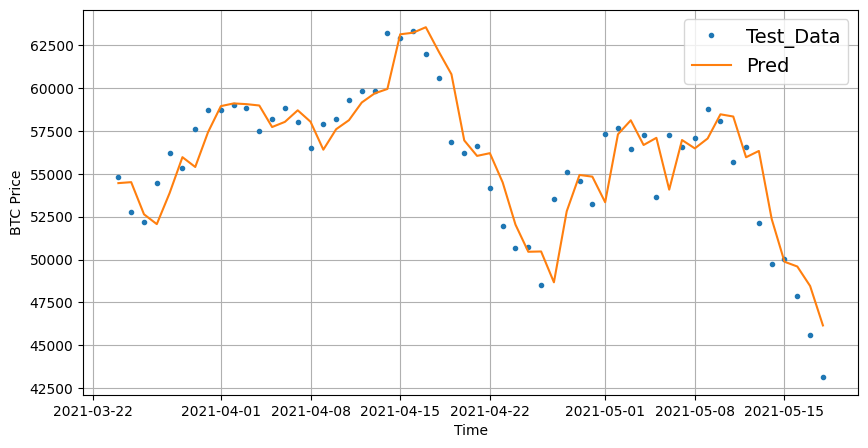

In [61]:
offset = 500
plt.figure(figsize=(10,5))
plot_times_series(x_test[-len(test_windows):],
                  test_labels[:,0],
                  start=offset,
                  label="Test_Data")

plot_times_series(x_test[-len(test_windows):],
                  model_1_preds,
                  start=offset,
                  format="-",
                  label="Pred")

In [62]:
x_test.shape , model_1_preds.shape , test_windows.shape , test_labels.shape , y_test.shape

((558,), TensorShape([556]), (556, 7), (556, 1), (558,))

## Model_2 : Dense (window = 30 , horizon = 1)

In [63]:
HORIZON = 1
WINDOW_SIZE = 30

In [64]:
# Make window data with appropriate horizon and window sizes
full_windows , full_labels = make_windows(btc_price , window_size=WINDOW_SIZE,horizon=HORIZON)
len(full_windows) , len(full_labels)

(2757, 2757)

In [65]:
# Make train and test windpws 

train_windows , test_windows , train_labels , test_labels = make_train_test_splits(windows=full_windows,
                                                                                  labels=full_labels,
                                                                                  test_split=0.2)

len(train_windows) , len(test_windows) , len(train_labels) , len(test_labels)

(2205, 552, 2205, 552)

In [66]:
2205 / 128

17.2265625

In [67]:
train_windows[:3]

array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ,
        126.38333, 135.24199, 133.20333, 142.76333, 137.92333, 142.95166,
        152.55183, 160.33883, 164.31499, 177.63333, 188.29716, 200.70166,
        180.355  , 175.03166, 177.6965 , 187.15983, 192.75666, 197.4    ],
       [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
        123.033  , 124.049  , 125.96116, 125.27966, 125.9275 , 126.38333,
        135.24199, 133.20333, 142.76333, 137.92333, 142.95166, 152.55183,
        160.33883, 164.31499, 177.63333, 188.29716, 200.70166, 180.355  ,
        175.03166, 177.6965 , 187.15983, 192.75666, 197.4    , 196.02499],
       [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
        124.049  , 125.96116, 125.27966, 125.9275 , 126.38333, 135.24199,
        133.20333, 142.76333, 137.92333, 142.95166, 152.55183, 160.33883,
        164.31499, 177.63333, 188.29

In [68]:
type(train_windows)

numpy.ndarray

In [69]:
tf.random.set_seed(42)
from tensorflow.keras import layers
# Create model

model_2 = tf.keras.Sequential([
    layers.Dense(128,activation="relu"),
    layers.Dense(HORIZON,activation="linear")
],name="model_2")

model_2.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["mae" , "mse"])



# Fie 
model_2.fit(train_windows,
           train_labels,
           epochs=100,
           batch_size=128,
           verbose=1,
           validation_data=(test_windows,test_labels),
           callbacks=[creat_model_checkpoint(model_name=model_2.name)])

Epoch 1/100
 1/18 [>.............................] - ETA: 7s - loss: 2107.5659 - mae: 2107.5659 - mse: 11181543.0000INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0233400>, 140280881342224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0233400>, 140280881342224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01fe040>, 140280881344144), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01fe040>, 140280881344144), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0087d30>, 140280881319168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0087d30>, 140280881319168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01c8f40>, 140280881343824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01c8f40>, 140280881343824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0233400>, 140280881342224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0233400>, 140280881342224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01fe040>, 140280881344144), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01fe040>, 140280881344144), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0087d30>, 140280881319168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0087d30>, 140280881319168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01c8f40>, 140280881343824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01c8f40>, 140280881343824), {}).


INFO:tensorflow:Assets written to: model_expriments/model_2/assets


INFO:tensorflow:Assets written to: model_expriments/model_2/assets


18/18 [==============================] - 1s 18ms/step - loss: 864.0413 - mae: 864.0413 - mse: 2989847.5000 - val_loss: 2217.0605 - val_mae: 2217.0605 - val_mse: 12682529.0000
Epoch 2/100
 1/18 [>.............................] - ETA: 0s - loss: 443.0856 - mae: 443.0856 - mse: 832820.5000INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0233400>, 140280881342224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0233400>, 140280881342224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01fe040>, 140280881344144), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01fe040>, 140280881344144), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0087d30>, 140280881319168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0087d30>, 140280881319168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01c8f40>, 140280881343824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01c8f40>, 140280881343824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0233400>, 140280881342224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0233400>, 140280881342224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01fe040>, 140280881344144), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01fe040>, 140280881344144), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0087d30>, 140280881319168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0087d30>, 140280881319168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01c8f40>, 140280881343824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01c8f40>, 140280881343824), {}).


INFO:tensorflow:Assets written to: model_expriments/model_2/assets


INFO:tensorflow:Assets written to: model_expriments/model_2/assets


18/18 [==============================] - 0s 13ms/step - loss: 384.7106 - mae: 384.7106 - mse: 640647.8750 - val_loss: 1287.8774 - val_mae: 1287.8774 - val_mse: 5149388.5000
Epoch 3/100
 1/18 [>.............................] - ETA: 0s - loss: 280.6820 - mae: 280.6820 - mse: 498627.6875INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0233400>, 140280881342224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0233400>, 140280881342224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01fe040>, 140280881344144), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01fe040>, 140280881344144), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0087d30>, 140280881319168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0087d30>, 140280881319168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01c8f40>, 140280881343824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01c8f40>, 140280881343824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0233400>, 140280881342224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0233400>, 140280881342224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01fe040>, 140280881344144), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01fe040>, 140280881344144), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0087d30>, 140280881319168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0087d30>, 140280881319168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01c8f40>, 140280881343824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01c8f40>, 140280881343824), {}).


INFO:tensorflow:Assets written to: model_expriments/model_2/assets


INFO:tensorflow:Assets written to: model_expriments/model_2/assets


18/18 [==============================] - 0s 13ms/step - loss: 264.6248 - mae: 264.6248 - mse: 309828.5625 - val_loss: 1187.2334 - val_mae: 1187.2334 - val_mse: 4344228.5000
Epoch 4/100
 1/18 [>.............................] - ETA: 0s - loss: 158.2754 - mae: 158.2754 - mse: 125766.8906INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0233400>, 140280881342224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0233400>, 140280881342224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01fe040>, 140280881344144), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01fe040>, 140280881344144), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0087d30>, 140280881319168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0087d30>, 140280881319168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01c8f40>, 140280881343824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01c8f40>, 140280881343824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0233400>, 140280881342224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0233400>, 140280881342224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01fe040>, 140280881344144), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01fe040>, 140280881344144), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0087d30>, 140280881319168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0087d30>, 140280881319168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01c8f40>, 140280881343824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01c8f40>, 140280881343824), {}).


INFO:tensorflow:Assets written to: model_expriments/model_2/assets


INFO:tensorflow:Assets written to: model_expriments/model_2/assets


18/18 [==============================] - 0s 15ms/step - loss: 214.7659 - mae: 214.7659 - mse: 212968.4531 - val_loss: 1009.1243 - val_mae: 1009.1243 - val_mse: 3343377.5000
Epoch 5/100
 1/18 [>.............................] - ETA: 0s - loss: 144.9039 - mae: 144.9039 - mse: 83853.1172INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0233400>, 140280881342224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0233400>, 140280881342224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01fe040>, 140280881344144), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01fe040>, 140280881344144), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0087d30>, 140280881319168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0087d30>, 140280881319168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01c8f40>, 140280881343824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01c8f40>, 140280881343824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0233400>, 140280881342224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0233400>, 140280881342224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01fe040>, 140280881344144), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01fe040>, 140280881344144), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0087d30>, 140280881319168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0087d30>, 140280881319168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01c8f40>, 140280881343824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01c8f40>, 140280881343824), {}).


INFO:tensorflow:Assets written to: model_expriments/model_2/assets


INFO:tensorflow:Assets written to: model_expriments/model_2/assets


18/18 [==============================] - 0s 13ms/step - loss: 190.6685 - mae: 190.6685 - mse: 178055.1094 - val_loss: 946.6339 - val_mae: 946.6339 - val_mse: 2878726.0000
Epoch 6/100
 1/18 [>.............................] - ETA: 0s - loss: 218.7978 - mae: 218.7978 - mse: 328566.0625INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0233400>, 140280881342224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0233400>, 140280881342224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01fe040>, 140280881344144), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01fe040>, 140280881344144), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0087d30>, 140280881319168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0087d30>, 140280881319168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01c8f40>, 140280881343824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01c8f40>, 140280881343824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0233400>, 140280881342224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0233400>, 140280881342224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01fe040>, 140280881344144), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01fe040>, 140280881344144), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0087d30>, 140280881319168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0087d30>, 140280881319168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01c8f40>, 140280881343824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01c8f40>, 140280881343824), {}).


INFO:tensorflow:Assets written to: model_expriments/model_2/assets


INFO:tensorflow:Assets written to: model_expriments/model_2/assets


18/18 [==============================] - 0s 13ms/step - loss: 169.8746 - mae: 169.8746 - mse: 149344.3125 - val_loss: 907.7483 - val_mae: 907.7483 - val_mse: 2791473.0000
Epoch 7/100
18/18 [==============================] - 0s 2ms/step - loss: 163.0877 - mae: 163.0877 - mse: 134285.0000 - val_loss: 942.3811 - val_mae: 942.3811 - val_mse: 2906637.0000
Epoch 8/100
18/18 [==============================] - 0s 2ms/step - loss: 161.4485 - mae: 161.4485 - mse: 134915.4688 - val_loss: 951.1085 - val_mae: 951.1085 - val_mse: 2932137.2500
Epoch 9/100
 1/18 [>.............................] - ETA: 0s - loss: 173.9021 - mae: 173.9021 - mse: 176167.2344INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0233400>, 140280881342224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0233400>, 140280881342224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01fe040>, 140280881344144), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01fe040>, 140280881344144), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0087d30>, 140280881319168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0087d30>, 140280881319168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01c8f40>, 140280881343824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01c8f40>, 140280881343824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0233400>, 140280881342224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0233400>, 140280881342224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01fe040>, 140280881344144), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01fe040>, 140280881344144), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0087d30>, 140280881319168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0087d30>, 140280881319168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01c8f40>, 140280881343824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01c8f40>, 140280881343824), {}).


INFO:tensorflow:Assets written to: model_expriments/model_2/assets


INFO:tensorflow:Assets written to: model_expriments/model_2/assets


18/18 [==============================] - 0s 14ms/step - loss: 175.1238 - mae: 175.1238 - mse: 149528.9062 - val_loss: 879.0328 - val_mae: 879.0328 - val_mse: 2330128.2500
Epoch 10/100
18/18 [==============================] - 0s 2ms/step - loss: 157.9191 - mae: 157.9191 - mse: 122754.1797 - val_loss: 882.7533 - val_mae: 882.7533 - val_mse: 2296884.2500
Epoch 11/100
 1/18 [>.............................] - ETA: 0s - loss: 156.7329 - mae: 156.7329 - mse: 122191.5312INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0233400>, 140280881342224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0233400>, 140280881342224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01fe040>, 140280881344144), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01fe040>, 140280881344144), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0087d30>, 140280881319168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0087d30>, 140280881319168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01c8f40>, 140280881343824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01c8f40>, 140280881343824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0233400>, 140280881342224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0233400>, 140280881342224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01fe040>, 140280881344144), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01fe040>, 140280881344144), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0087d30>, 140280881319168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0087d30>, 140280881319168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01c8f40>, 140280881343824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01c8f40>, 140280881343824), {}).


INFO:tensorflow:Assets written to: model_expriments/model_2/assets


INFO:tensorflow:Assets written to: model_expriments/model_2/assets


18/18 [==============================] - 0s 13ms/step - loss: 144.9165 - mae: 144.9165 - mse: 112135.1875 - val_loss: 867.6885 - val_mae: 867.6885 - val_mse: 2236344.2500
Epoch 12/100
 1/18 [>.............................] - ETA: 0s - loss: 130.8021 - mae: 130.8021 - mse: 80209.2031INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0233400>, 140280881342224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0233400>, 140280881342224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01fe040>, 140280881344144), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01fe040>, 140280881344144), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0087d30>, 140280881319168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0087d30>, 140280881319168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01c8f40>, 140280881343824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01c8f40>, 140280881343824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0233400>, 140280881342224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0233400>, 140280881342224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01fe040>, 140280881344144), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01fe040>, 140280881344144), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0087d30>, 140280881319168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0087d30>, 140280881319168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01c8f40>, 140280881343824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01c8f40>, 140280881343824), {}).


INFO:tensorflow:Assets written to: model_expriments/model_2/assets


INFO:tensorflow:Assets written to: model_expriments/model_2/assets


18/18 [==============================] - 0s 13ms/step - loss: 152.3440 - mae: 152.3440 - mse: 117103.2109 - val_loss: 775.9781 - val_mae: 775.9781 - val_mse: 1977102.3750
Epoch 13/100
18/18 [==============================] - 0s 2ms/step - loss: 150.2583 - mae: 150.2583 - mse: 114037.0859 - val_loss: 912.9931 - val_mae: 912.9931 - val_mse: 2700383.5000
Epoch 14/100
 1/18 [>.............................] - ETA: 0s - loss: 227.6127 - mae: 227.6127 - mse: 279551.5000INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0233400>, 140280881342224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0233400>, 140280881342224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01fe040>, 140280881344144), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01fe040>, 140280881344144), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0087d30>, 140280881319168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0087d30>, 140280881319168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01c8f40>, 140280881343824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01c8f40>, 140280881343824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0233400>, 140280881342224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0233400>, 140280881342224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01fe040>, 140280881344144), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01fe040>, 140280881344144), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0087d30>, 140280881319168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0087d30>, 140280881319168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01c8f40>, 140280881343824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01c8f40>, 140280881343824), {}).


INFO:tensorflow:Assets written to: model_expriments/model_2/assets


INFO:tensorflow:Assets written to: model_expriments/model_2/assets


18/18 [==============================] - 0s 13ms/step - loss: 144.0730 - mae: 144.0730 - mse: 111747.4609 - val_loss: 762.6541 - val_mae: 762.6541 - val_mse: 1946470.0000
Epoch 15/100
18/18 [==============================] - 0s 2ms/step - loss: 150.5907 - mae: 150.5907 - mse: 115279.5703 - val_loss: 769.9043 - val_mae: 769.9043 - val_mse: 1927940.0000
Epoch 16/100
 1/18 [>.............................] - ETA: 0s - loss: 148.4517 - mae: 148.4517 - mse: 99137.3359INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0233400>, 140280881342224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0233400>, 140280881342224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01fe040>, 140280881344144), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01fe040>, 140280881344144), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0087d30>, 140280881319168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0087d30>, 140280881319168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01c8f40>, 140280881343824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01c8f40>, 140280881343824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0233400>, 140280881342224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0233400>, 140280881342224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01fe040>, 140280881344144), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01fe040>, 140280881344144), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0087d30>, 140280881319168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0087d30>, 140280881319168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01c8f40>, 140280881343824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01c8f40>, 140280881343824), {}).


INFO:tensorflow:Assets written to: model_expriments/model_2/assets


INFO:tensorflow:Assets written to: model_expriments/model_2/assets


18/18 [==============================] - 0s 13ms/step - loss: 146.9536 - mae: 146.9536 - mse: 111407.8359 - val_loss: 738.7352 - val_mae: 738.7352 - val_mse: 1824940.6250
Epoch 17/100
18/18 [==============================] - 0s 2ms/step - loss: 138.3837 - mae: 138.3837 - mse: 102932.6328 - val_loss: 1101.2727 - val_mae: 1101.2727 - val_mse: 3060044.0000
Epoch 18/100
18/18 [==============================] - 0s 2ms/step - loss: 152.9263 - mae: 152.9263 - mse: 110650.3281 - val_loss: 785.5720 - val_mae: 785.5720 - val_mse: 1903355.3750
Epoch 19/100
18/18 [==============================] - 0s 2ms/step - loss: 141.8774 - mae: 141.8774 - mse: 101326.6641 - val_loss: 1182.0750 - val_mae: 1182.0750 - val_mse: 3805871.2500
Epoch 20/100
 1/18 [>.............................] - ETA: 0s - loss: 220.9976 - mae: 220.9976 - mse: 188618.7969INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.

INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0233400>, 140280881342224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01fe040>, 140280881344144), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01fe040>, 140280881344144), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0087d30>, 140280881319168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0087d30>, 140280881319168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01c8f40>, 140280881343824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01c8f40>, 140280881343824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0233400>, 140280881342224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0233400>, 140280881342224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01fe040>, 140280881344144), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01fe040>, 140280881344144), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0087d30>, 140280881319168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0087d30>, 140280881319168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01c8f40>, 140280881343824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01c8f40>, 140280881343824), {}).


INFO:tensorflow:Assets written to: model_expriments/model_2/assets


INFO:tensorflow:Assets written to: model_expriments/model_2/assets


18/18 [==============================] - 0s 20ms/step - loss: 157.0024 - mae: 157.0024 - mse: 117273.8281 - val_loss: 711.8910 - val_mae: 711.8910 - val_mse: 1716544.5000
Epoch 21/100
18/18 [==============================] - 0s 2ms/step - loss: 148.6169 - mae: 148.6169 - mse: 113416.9766 - val_loss: 760.9728 - val_mae: 760.9728 - val_mse: 1762326.8750
Epoch 22/100
18/18 [==============================] - 0s 2ms/step - loss: 152.4406 - mae: 152.4406 - mse: 110148.3359 - val_loss: 798.4405 - val_mae: 798.4405 - val_mse: 1876926.3750
Epoch 23/100
18/18 [==============================] - 0s 2ms/step - loss: 146.1793 - mae: 146.1793 - mse: 106404.4766 - val_loss: 869.5986 - val_mae: 869.5986 - val_mse: 2116630.2500
Epoch 24/100
18/18 [==============================] - 0s 2ms/step - loss: 135.9848 - mae: 135.9848 - mse: 97434.5781 - val_loss: 727.8036 - val_mae: 727.8036 - val_mse: 1750227.5000
Epoch 25/100
 1/18 [>.............................] - ETA: 0s - loss: 136.5742 - mae: 136.5742 - m

INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0233400>, 140280881342224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01fe040>, 140280881344144), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01fe040>, 140280881344144), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0087d30>, 140280881319168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0087d30>, 140280881319168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01c8f40>, 140280881343824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01c8f40>, 140280881343824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0233400>, 140280881342224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0233400>, 140280881342224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01fe040>, 140280881344144), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01fe040>, 140280881344144), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0087d30>, 140280881319168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0087d30>, 140280881319168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01c8f40>, 140280881343824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01c8f40>, 140280881343824), {}).


INFO:tensorflow:Assets written to: model_expriments/model_2/assets


INFO:tensorflow:Assets written to: model_expriments/model_2/assets


18/18 [==============================] - 0s 13ms/step - loss: 137.7066 - mae: 137.7066 - mse: 98768.1562 - val_loss: 696.3095 - val_mae: 696.3095 - val_mse: 1548719.8750
Epoch 26/100
18/18 [==============================] - 0s 2ms/step - loss: 130.8999 - mae: 130.8999 - mse: 90227.3516 - val_loss: 714.3933 - val_mae: 714.3933 - val_mse: 1684883.2500
Epoch 27/100
18/18 [==============================] - 0s 2ms/step - loss: 125.9208 - mae: 125.9208 - mse: 87593.7031 - val_loss: 751.7111 - val_mae: 751.7111 - val_mse: 1722212.1250
Epoch 28/100
18/18 [==============================] - 0s 2ms/step - loss: 140.7228 - mae: 140.7228 - mse: 103870.7656 - val_loss: 830.6166 - val_mae: 830.6166 - val_mse: 2165992.2500
Epoch 29/100
18/18 [==============================] - 0s 2ms/step - loss: 145.6349 - mae: 145.6349 - mse: 101959.3984 - val_loss: 862.7402 - val_mae: 862.7402 - val_mse: 2057001.2500
Epoch 30/100
18/18 [==============================] - 0s 2ms/step - loss: 153.0548 - mae: 153.0548 -

INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0233400>, 140280881342224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01fe040>, 140280881344144), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01fe040>, 140280881344144), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0087d30>, 140280881319168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0087d30>, 140280881319168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01c8f40>, 140280881343824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01c8f40>, 140280881343824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0233400>, 140280881342224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0233400>, 140280881342224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01fe040>, 140280881344144), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01fe040>, 140280881344144), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0087d30>, 140280881319168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0087d30>, 140280881319168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01c8f40>, 140280881343824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01c8f40>, 140280881343824), {}).


INFO:tensorflow:Assets written to: model_expriments/model_2/assets


INFO:tensorflow:Assets written to: model_expriments/model_2/assets


18/18 [==============================] - 0s 14ms/step - loss: 128.4236 - mae: 128.4236 - mse: 86667.0938 - val_loss: 657.5140 - val_mae: 657.5140 - val_mse: 1425241.5000
Epoch 40/100
18/18 [==============================] - 0s 2ms/step - loss: 122.9899 - mae: 122.9899 - mse: 83600.6641 - val_loss: 690.9854 - val_mae: 690.9854 - val_mse: 1588876.0000
Epoch 41/100
18/18 [==============================] - 0s 2ms/step - loss: 123.7483 - mae: 123.7483 - mse: 83462.4297 - val_loss: 819.7058 - val_mae: 819.7058 - val_mse: 1890816.1250
Epoch 42/100
18/18 [==============================] - 0s 2ms/step - loss: 136.4496 - mae: 136.4496 - mse: 93690.8906 - val_loss: 691.2906 - val_mae: 691.2906 - val_mse: 1504797.2500
Epoch 43/100
18/18 [==============================] - 0s 2ms/step - loss: 125.7056 - mae: 125.7056 - mse: 87933.9688 - val_loss: 863.5228 - val_mae: 863.5228 - val_mse: 2174561.5000
Epoch 44/100
18/18 [==============================] - 0s 2ms/step - loss: 134.4736 - mae: 134.4736 - m

INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0233400>, 140280881342224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01fe040>, 140280881344144), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01fe040>, 140280881344144), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0087d30>, 140280881319168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0087d30>, 140280881319168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01c8f40>, 140280881343824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01c8f40>, 140280881343824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0233400>, 140280881342224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0233400>, 140280881342224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01fe040>, 140280881344144), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01fe040>, 140280881344144), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0087d30>, 140280881319168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0087d30>, 140280881319168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01c8f40>, 140280881343824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01c8f40>, 140280881343824), {}).


INFO:tensorflow:Assets written to: model_expriments/model_2/assets


INFO:tensorflow:Assets written to: model_expriments/model_2/assets


18/18 [==============================] - 0s 13ms/step - loss: 121.3663 - mae: 121.3663 - mse: 84338.1094 - val_loss: 653.1121 - val_mae: 653.1121 - val_mse: 1433719.3750
Epoch 46/100
18/18 [==============================] - 0s 2ms/step - loss: 132.7752 - mae: 132.7752 - mse: 92629.4844 - val_loss: 747.1918 - val_mae: 747.1918 - val_mse: 1653659.1250
Epoch 47/100
18/18 [==============================] - 0s 2ms/step - loss: 134.3723 - mae: 134.3723 - mse: 89214.7734 - val_loss: 741.1313 - val_mae: 741.1313 - val_mse: 1627404.6250
Epoch 48/100
18/18 [==============================] - 0s 2ms/step - loss: 129.2375 - mae: 129.2375 - mse: 87161.2266 - val_loss: 881.5207 - val_mae: 881.5207 - val_mse: 2218224.7500
Epoch 49/100
18/18 [==============================] - 0s 2ms/step - loss: 155.5174 - mae: 155.5174 - mse: 106489.7109 - val_loss: 657.4271 - val_mae: 657.4271 - val_mse: 1456360.2500
Epoch 50/100
 1/18 [>.............................] - ETA: 0s - loss: 132.1476 - mae: 132.1476 - mse:

INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0233400>, 140280881342224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01fe040>, 140280881344144), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01fe040>, 140280881344144), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0087d30>, 140280881319168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0087d30>, 140280881319168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01c8f40>, 140280881343824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01c8f40>, 140280881343824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0233400>, 140280881342224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0233400>, 140280881342224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01fe040>, 140280881344144), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01fe040>, 140280881344144), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0087d30>, 140280881319168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0087d30>, 140280881319168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01c8f40>, 140280881343824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01c8f40>, 140280881343824), {}).


INFO:tensorflow:Assets written to: model_expriments/model_2/assets


INFO:tensorflow:Assets written to: model_expriments/model_2/assets


18/18 [==============================] - 0s 13ms/step - loss: 121.4160 - mae: 121.4160 - mse: 81921.5703 - val_loss: 652.4827 - val_mae: 652.4827 - val_mse: 1421220.5000
Epoch 51/100
18/18 [==============================] - 0s 2ms/step - loss: 130.5418 - mae: 130.5418 - mse: 89681.2578 - val_loss: 955.3251 - val_mae: 955.3251 - val_mse: 2494590.5000
Epoch 52/100
 1/18 [>.............................] - ETA: 0s - loss: 181.1222 - mae: 181.1222 - mse: 119886.0625INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0233400>, 140280881342224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0233400>, 140280881342224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01fe040>, 140280881344144), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01fe040>, 140280881344144), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0087d30>, 140280881319168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0087d30>, 140280881319168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01c8f40>, 140280881343824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01c8f40>, 140280881343824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0233400>, 140280881342224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0233400>, 140280881342224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01fe040>, 140280881344144), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01fe040>, 140280881344144), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0087d30>, 140280881319168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0087d30>, 140280881319168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01c8f40>, 140280881343824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01c8f40>, 140280881343824), {}).


INFO:tensorflow:Assets written to: model_expriments/model_2/assets


INFO:tensorflow:Assets written to: model_expriments/model_2/assets


18/18 [==============================] - 0s 14ms/step - loss: 134.9376 - mae: 134.9376 - mse: 97703.6016 - val_loss: 637.0278 - val_mae: 637.0278 - val_mse: 1336661.5000
Epoch 53/100
18/18 [==============================] - 0s 2ms/step - loss: 135.7127 - mae: 135.7127 - mse: 92365.1641 - val_loss: 926.7402 - val_mae: 926.7402 - val_mse: 2389815.7500
Epoch 54/100
18/18 [==============================] - 0s 2ms/step - loss: 141.8227 - mae: 141.8227 - mse: 99727.7422 - val_loss: 811.1753 - val_mae: 811.1753 - val_mse: 1862442.1250
Epoch 55/100
 1/18 [>.............................] - ETA: 0s - loss: 116.4397 - mae: 116.4397 - mse: 48031.2188INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0233400>, 140280881342224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0233400>, 140280881342224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01fe040>, 140280881344144), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01fe040>, 140280881344144), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0087d30>, 140280881319168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0087d30>, 140280881319168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01c8f40>, 140280881343824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01c8f40>, 140280881343824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0233400>, 140280881342224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0233400>, 140280881342224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01fe040>, 140280881344144), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01fe040>, 140280881344144), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0087d30>, 140280881319168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0087d30>, 140280881319168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01c8f40>, 140280881343824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01c8f40>, 140280881343824), {}).


INFO:tensorflow:Assets written to: model_expriments/model_2/assets


INFO:tensorflow:Assets written to: model_expriments/model_2/assets


18/18 [==============================] - 0s 13ms/step - loss: 128.7617 - mae: 128.7617 - mse: 82614.0625 - val_loss: 634.1422 - val_mae: 634.1422 - val_mse: 1344881.5000
Epoch 56/100
18/18 [==============================] - 0s 2ms/step - loss: 123.1054 - mae: 123.1054 - mse: 83424.8125 - val_loss: 666.4789 - val_mae: 666.4789 - val_mse: 1404946.3750
Epoch 57/100
18/18 [==============================] - 0s 2ms/step - loss: 129.1718 - mae: 129.1718 - mse: 87757.0156 - val_loss: 682.7751 - val_mae: 682.7751 - val_mse: 1456505.3750
Epoch 58/100
18/18 [==============================] - 0s 2ms/step - loss: 125.1956 - mae: 125.1956 - mse: 84514.5078 - val_loss: 1039.0675 - val_mae: 1039.0675 - val_mse: 2855966.2500
Epoch 59/100
18/18 [==============================] - 0s 2ms/step - loss: 180.6902 - mae: 180.6902 - mse: 131850.9219 - val_loss: 640.2166 - val_mae: 640.2166 - val_mse: 1344149.1250
Epoch 60/100
18/18 [==============================] - 0s 2ms/step - loss: 121.8532 - mae: 121.8532 

INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0233400>, 140280881342224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01fe040>, 140280881344144), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01fe040>, 140280881344144), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0087d30>, 140280881319168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0087d30>, 140280881319168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01c8f40>, 140280881343824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01c8f40>, 140280881343824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0233400>, 140280881342224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0233400>, 140280881342224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01fe040>, 140280881344144), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01fe040>, 140280881344144), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0087d30>, 140280881319168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0087d30>, 140280881319168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01c8f40>, 140280881343824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01c8f40>, 140280881343824), {}).


INFO:tensorflow:Assets written to: model_expriments/model_2/assets


INFO:tensorflow:Assets written to: model_expriments/model_2/assets


18/18 [==============================] - 0s 13ms/step - loss: 119.4952 - mae: 119.4952 - mse: 79946.1172 - val_loss: 621.9323 - val_mae: 621.9323 - val_mse: 1321307.3750
Epoch 62/100
18/18 [==============================] - 0s 2ms/step - loss: 116.5560 - mae: 116.5560 - mse: 77404.0234 - val_loss: 1014.8488 - val_mae: 1014.8488 - val_mse: 2721218.2500
Epoch 63/100
18/18 [==============================] - 0s 2ms/step - loss: 139.1451 - mae: 139.1451 - mse: 95852.3281 - val_loss: 674.9438 - val_mae: 674.9438 - val_mse: 1419096.7500
Epoch 64/100
18/18 [==============================] - 0s 2ms/step - loss: 116.3627 - mae: 116.3627 - mse: 77645.6406 - val_loss: 669.9489 - val_mae: 669.9489 - val_mse: 1471377.5000
Epoch 65/100
18/18 [==============================] - 0s 2ms/step - loss: 129.1440 - mae: 129.1440 - mse: 84807.4375 - val_loss: 673.0467 - val_mae: 673.0467 - val_mse: 1481325.8750
Epoch 66/100
 1/18 [>.............................] - ETA: 0s - loss: 128.5331 - mae: 128.5331 - mse

INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0233400>, 140280881342224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01fe040>, 140280881344144), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01fe040>, 140280881344144), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0087d30>, 140280881319168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0087d30>, 140280881319168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01c8f40>, 140280881343824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01c8f40>, 140280881343824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0233400>, 140280881342224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0233400>, 140280881342224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01fe040>, 140280881344144), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01fe040>, 140280881344144), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0087d30>, 140280881319168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0087d30>, 140280881319168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01c8f40>, 140280881343824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01c8f40>, 140280881343824), {}).


INFO:tensorflow:Assets written to: model_expriments/model_2/assets


INFO:tensorflow:Assets written to: model_expriments/model_2/assets


18/18 [==============================] - 0s 14ms/step - loss: 122.2335 - mae: 122.2335 - mse: 81093.5234 - val_loss: 621.4572 - val_mae: 621.4572 - val_mse: 1321271.3750
Epoch 67/100
18/18 [==============================] - 0s 2ms/step - loss: 120.0093 - mae: 120.0093 - mse: 80845.4219 - val_loss: 663.9324 - val_mae: 663.9324 - val_mse: 1451580.2500
Epoch 68/100
18/18 [==============================] - 0s 2ms/step - loss: 123.4875 - mae: 123.4875 - mse: 84051.0391 - val_loss: 886.8568 - val_mae: 886.8568 - val_mse: 2094091.6250
Epoch 69/100
18/18 [==============================] - 0s 2ms/step - loss: 124.4894 - mae: 124.4894 - mse: 83534.4766 - val_loss: 957.3444 - val_mae: 957.3444 - val_mse: 2347968.5000
Epoch 70/100
18/18 [==============================] - 0s 2ms/step - loss: 139.6355 - mae: 139.6355 - mse: 97186.4766 - val_loss: 770.5706 - val_mae: 770.5706 - val_mse: 1697608.0000
Epoch 71/100
18/18 [==============================] - 0s 2ms/step - loss: 123.1895 - mae: 123.1895 - m

INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0233400>, 140280881342224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01fe040>, 140280881344144), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01fe040>, 140280881344144), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0087d30>, 140280881319168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0087d30>, 140280881319168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01c8f40>, 140280881343824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01c8f40>, 140280881343824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0233400>, 140280881342224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0233400>, 140280881342224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01fe040>, 140280881344144), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01fe040>, 140280881344144), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0087d30>, 140280881319168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0087d30>, 140280881319168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01c8f40>, 140280881343824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01c8f40>, 140280881343824), {}).


INFO:tensorflow:Assets written to: model_expriments/model_2/assets


INFO:tensorflow:Assets written to: model_expriments/model_2/assets


18/18 [==============================] - 0s 13ms/step - loss: 125.3547 - mae: 125.3547 - mse: 83378.0547 - val_loss: 615.4540 - val_mae: 615.4540 - val_mse: 1303480.1250
Epoch 79/100
18/18 [==============================] - 0s 2ms/step - loss: 117.2594 - mae: 117.2594 - mse: 78664.7109 - val_loss: 763.9563 - val_mae: 763.9563 - val_mse: 1741990.1250
Epoch 80/100
18/18 [==============================] - 0s 2ms/step - loss: 128.1518 - mae: 128.1518 - mse: 85436.0078 - val_loss: 758.5438 - val_mae: 758.5438 - val_mse: 1659644.6250
Epoch 81/100
18/18 [==============================] - 0s 2ms/step - loss: 126.0646 - mae: 126.0646 - mse: 82134.9219 - val_loss: 616.5469 - val_mae: 616.5469 - val_mse: 1279249.7500
Epoch 82/100
18/18 [==============================] - 0s 3ms/step - loss: 114.0794 - mae: 114.0794 - mse: 74815.8594 - val_loss: 680.3223 - val_mae: 680.3223 - val_mse: 1419359.2500
Epoch 83/100
18/18 [==============================] - 0s 2ms/step - loss: 124.3246 - mae: 124.3246 - m

INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0233400>, 140280881342224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01fe040>, 140280881344144), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01fe040>, 140280881344144), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0087d30>, 140280881319168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0087d30>, 140280881319168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01c8f40>, 140280881343824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01c8f40>, 140280881343824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0233400>, 140280881342224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0233400>, 140280881342224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01fe040>, 140280881344144), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01fe040>, 140280881344144), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0087d30>, 140280881319168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0087d30>, 140280881319168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01c8f40>, 140280881343824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b01c8f40>, 140280881343824), {}).


INFO:tensorflow:Assets written to: model_expriments/model_2/assets


INFO:tensorflow:Assets written to: model_expriments/model_2/assets


18/18 [==============================] - 0s 13ms/step - loss: 126.5656 - mae: 126.5656 - mse: 80880.5938 - val_loss: 606.8893 - val_mae: 606.8893 - val_mse: 1256685.8750
Epoch 99/100
18/18 [==============================] - 0s 2ms/step - loss: 116.9624 - mae: 116.9624 - mse: 76353.7031 - val_loss: 617.1660 - val_mae: 617.1660 - val_mse: 1301700.6250
Epoch 100/100
18/18 [==============================] - 0s 2ms/step - loss: 128.9586 - mae: 128.9586 - mse: 86713.4766 - val_loss: 668.9225 - val_mae: 668.9225 - val_mse: 1433373.6250


In [70]:
model_2.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 940us/step - loss: 668.9225 - mae: 668.9225 - mse: 1433373.8750


[668.9224853515625, 668.9224853515625, 1433373.875]

In [71]:
# Load in the best performing model
model_2 = tf.keras.models.load_model("model_expriments/model_2")
model_2.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 927us/step - loss: 606.8894 - mae: 606.8894 - mse: 1256685.7500


[606.889404296875, 606.889404296875, 1256685.75]

In [72]:
model_2_preds = make_pred(model_2,
                          input_data=test_windows)
model_2_preds.shape

18/18 [==============================] - 0s 1ms/step


TensorShape([552])

In [73]:
# Evaluate results for model 2 predictions
model_2_results = evaluate_preds(tf.squeeze(test_labels),
                                model_2_preds)
model_2_results

{'mae': 606.88934,
 'mse': 1256685.8,
 'rmse': 1121.0199,
 'mape': 2.7246501,
 'mase': 1.0608486}

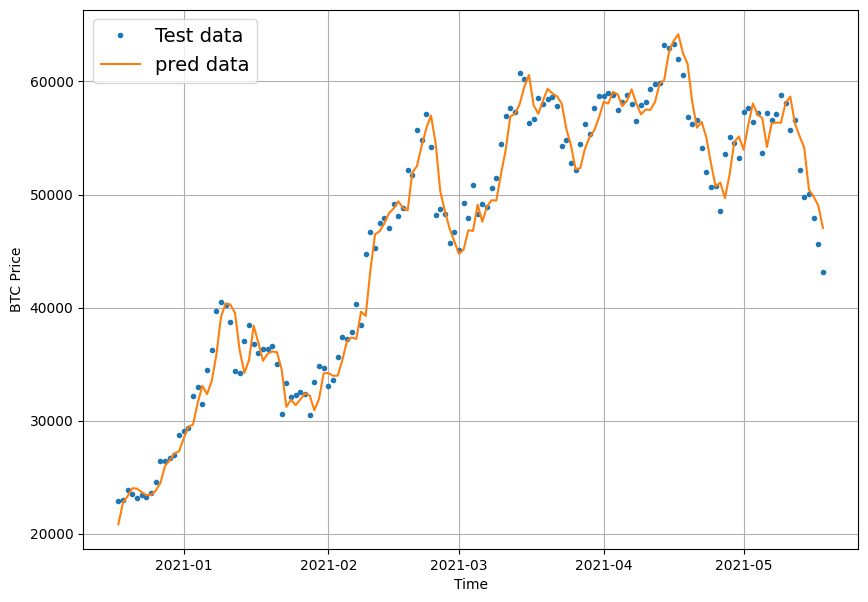

In [74]:
offset = 400
plt.figure(figsize=(10,7))
plot_times_series(x_test[-len(test_windows):],
                 test_labels[:,0],
                 start=offset,
                 label="Test data")

plot_times_series(x_test[-len(test_windows):],
                 model_2_preds,
                 start=offset,
                  format="-",
                 label="pred data")

## Model 3 : Dense (window = 30 , horizon = 7)


In [75]:
HORIZON = 7
WINDOW_SIZE=30

full_windows , full_labels = make_windows(btc_price,window_size=WINDOW_SIZE , horizon=HORIZON)
len(full_windows) , len (full_labels)

(2751, 2751)

In [76]:
train_windows ,test_windows, train_labels , test_labels = make_train_test_splits(full_windows,
                                                                     full_labels)
len(test_windows) , len(test_windows) , len(train_labels) , len(test_labels)

(551, 551, 2200, 551)

In [77]:
tf.random.set_seed(42)
# Create model_3
model_3 = tf.keras.Sequential([
    layers.Dense(128,activation="relu"),
    layers.Dense(HORIZON)
],name="model_3_dense")

# Compile
model_3.compile(loss="MAE",
               optimizer=tf.keras.optimizers.Adam())

# Fit
model_3.fit(train_windows,
           train_labels,
           batch_size=128,
           epochs=100,
           verbose=0,
           validation_data=(test_windows,test_labels),
           callbacks=[creat_model_checkpoint(model_3.name)])

INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564149160>, 140279605336784), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564149160>, 140279605336784), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95640fa370>, 140279605337184), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95640fa370>, 140279605337184), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95641b1100>, 140279605413648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95641b1100>, 140279605413648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0397880>, 140279605337904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0397880>, 140279605337904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564149160>, 140279605336784), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564149160>, 140279605336784), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95640fa370>, 140279605337184), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95640fa370>, 140279605337184), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95641b1100>, 140279605413648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95641b1100>, 140279605413648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0397880>, 140279605337904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0397880>, 140279605337904), {}).


INFO:tensorflow:Assets written to: model_expriments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_expriments/model_3_dense/assets


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564149160>, 140279605336784), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564149160>, 140279605336784), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95640fa370>, 140279605337184), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95640fa370>, 140279605337184), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95641b1100>, 140279605413648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95641b1100>, 140279605413648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0397880>, 140279605337904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0397880>, 140279605337904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564149160>, 140279605336784), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564149160>, 140279605336784), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95640fa370>, 140279605337184), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95640fa370>, 140279605337184), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95641b1100>, 140279605413648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95641b1100>, 140279605413648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0397880>, 140279605337904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0397880>, 140279605337904), {}).


INFO:tensorflow:Assets written to: model_expriments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_expriments/model_3_dense/assets


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564149160>, 140279605336784), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564149160>, 140279605336784), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95640fa370>, 140279605337184), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95640fa370>, 140279605337184), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95641b1100>, 140279605413648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95641b1100>, 140279605413648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0397880>, 140279605337904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0397880>, 140279605337904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564149160>, 140279605336784), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564149160>, 140279605336784), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95640fa370>, 140279605337184), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95640fa370>, 140279605337184), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95641b1100>, 140279605413648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95641b1100>, 140279605413648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0397880>, 140279605337904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0397880>, 140279605337904), {}).


INFO:tensorflow:Assets written to: model_expriments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_expriments/model_3_dense/assets


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564149160>, 140279605336784), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564149160>, 140279605336784), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95640fa370>, 140279605337184), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95640fa370>, 140279605337184), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95641b1100>, 140279605413648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95641b1100>, 140279605413648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0397880>, 140279605337904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0397880>, 140279605337904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564149160>, 140279605336784), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564149160>, 140279605336784), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95640fa370>, 140279605337184), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95640fa370>, 140279605337184), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95641b1100>, 140279605413648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95641b1100>, 140279605413648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0397880>, 140279605337904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0397880>, 140279605337904), {}).


INFO:tensorflow:Assets written to: model_expriments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_expriments/model_3_dense/assets


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564149160>, 140279605336784), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564149160>, 140279605336784), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95640fa370>, 140279605337184), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95640fa370>, 140279605337184), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95641b1100>, 140279605413648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95641b1100>, 140279605413648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0397880>, 140279605337904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0397880>, 140279605337904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564149160>, 140279605336784), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564149160>, 140279605336784), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95640fa370>, 140279605337184), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95640fa370>, 140279605337184), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95641b1100>, 140279605413648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95641b1100>, 140279605413648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0397880>, 140279605337904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0397880>, 140279605337904), {}).


INFO:tensorflow:Assets written to: model_expriments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_expriments/model_3_dense/assets


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564149160>, 140279605336784), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564149160>, 140279605336784), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95640fa370>, 140279605337184), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95640fa370>, 140279605337184), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95641b1100>, 140279605413648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95641b1100>, 140279605413648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0397880>, 140279605337904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0397880>, 140279605337904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564149160>, 140279605336784), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564149160>, 140279605336784), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95640fa370>, 140279605337184), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95640fa370>, 140279605337184), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95641b1100>, 140279605413648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95641b1100>, 140279605413648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0397880>, 140279605337904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0397880>, 140279605337904), {}).


INFO:tensorflow:Assets written to: model_expriments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_expriments/model_3_dense/assets


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564149160>, 140279605336784), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564149160>, 140279605336784), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95640fa370>, 140279605337184), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95640fa370>, 140279605337184), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95641b1100>, 140279605413648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95641b1100>, 140279605413648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0397880>, 140279605337904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0397880>, 140279605337904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564149160>, 140279605336784), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564149160>, 140279605336784), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95640fa370>, 140279605337184), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95640fa370>, 140279605337184), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95641b1100>, 140279605413648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95641b1100>, 140279605413648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0397880>, 140279605337904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0397880>, 140279605337904), {}).


INFO:tensorflow:Assets written to: model_expriments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_expriments/model_3_dense/assets


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564149160>, 140279605336784), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564149160>, 140279605336784), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95640fa370>, 140279605337184), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95640fa370>, 140279605337184), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95641b1100>, 140279605413648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95641b1100>, 140279605413648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0397880>, 140279605337904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0397880>, 140279605337904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564149160>, 140279605336784), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564149160>, 140279605336784), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95640fa370>, 140279605337184), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95640fa370>, 140279605337184), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95641b1100>, 140279605413648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95641b1100>, 140279605413648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0397880>, 140279605337904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0397880>, 140279605337904), {}).


INFO:tensorflow:Assets written to: model_expriments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_expriments/model_3_dense/assets


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564149160>, 140279605336784), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564149160>, 140279605336784), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95640fa370>, 140279605337184), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95640fa370>, 140279605337184), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95641b1100>, 140279605413648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95641b1100>, 140279605413648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0397880>, 140279605337904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0397880>, 140279605337904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564149160>, 140279605336784), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564149160>, 140279605336784), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95640fa370>, 140279605337184), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95640fa370>, 140279605337184), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95641b1100>, 140279605413648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95641b1100>, 140279605413648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0397880>, 140279605337904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0397880>, 140279605337904), {}).


INFO:tensorflow:Assets written to: model_expriments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_expriments/model_3_dense/assets


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564149160>, 140279605336784), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564149160>, 140279605336784), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95640fa370>, 140279605337184), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95640fa370>, 140279605337184), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95641b1100>, 140279605413648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95641b1100>, 140279605413648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0397880>, 140279605337904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0397880>, 140279605337904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564149160>, 140279605336784), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564149160>, 140279605336784), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95640fa370>, 140279605337184), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95640fa370>, 140279605337184), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95641b1100>, 140279605413648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95641b1100>, 140279605413648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0397880>, 140279605337904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0397880>, 140279605337904), {}).


INFO:tensorflow:Assets written to: model_expriments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_expriments/model_3_dense/assets


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564149160>, 140279605336784), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564149160>, 140279605336784), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95640fa370>, 140279605337184), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95640fa370>, 140279605337184), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95641b1100>, 140279605413648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95641b1100>, 140279605413648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0397880>, 140279605337904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0397880>, 140279605337904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564149160>, 140279605336784), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564149160>, 140279605336784), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95640fa370>, 140279605337184), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95640fa370>, 140279605337184), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95641b1100>, 140279605413648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95641b1100>, 140279605413648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0397880>, 140279605337904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0397880>, 140279605337904), {}).


INFO:tensorflow:Assets written to: model_expriments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_expriments/model_3_dense/assets


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564149160>, 140279605336784), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564149160>, 140279605336784), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95640fa370>, 140279605337184), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95640fa370>, 140279605337184), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95641b1100>, 140279605413648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95641b1100>, 140279605413648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0397880>, 140279605337904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0397880>, 140279605337904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564149160>, 140279605336784), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564149160>, 140279605336784), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95640fa370>, 140279605337184), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95640fa370>, 140279605337184), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95641b1100>, 140279605413648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95641b1100>, 140279605413648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0397880>, 140279605337904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0397880>, 140279605337904), {}).


INFO:tensorflow:Assets written to: model_expriments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_expriments/model_3_dense/assets


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564149160>, 140279605336784), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564149160>, 140279605336784), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95640fa370>, 140279605337184), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95640fa370>, 140279605337184), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95641b1100>, 140279605413648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95641b1100>, 140279605413648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0397880>, 140279605337904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0397880>, 140279605337904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564149160>, 140279605336784), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564149160>, 140279605336784), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95640fa370>, 140279605337184), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95640fa370>, 140279605337184), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95641b1100>, 140279605413648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95641b1100>, 140279605413648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0397880>, 140279605337904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0397880>, 140279605337904), {}).


INFO:tensorflow:Assets written to: model_expriments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_expriments/model_3_dense/assets


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564149160>, 140279605336784), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564149160>, 140279605336784), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95640fa370>, 140279605337184), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95640fa370>, 140279605337184), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95641b1100>, 140279605413648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95641b1100>, 140279605413648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0397880>, 140279605337904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0397880>, 140279605337904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564149160>, 140279605336784), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564149160>, 140279605336784), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95640fa370>, 140279605337184), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95640fa370>, 140279605337184), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95641b1100>, 140279605413648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95641b1100>, 140279605413648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0397880>, 140279605337904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0397880>, 140279605337904), {}).


INFO:tensorflow:Assets written to: model_expriments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_expriments/model_3_dense/assets


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564149160>, 140279605336784), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564149160>, 140279605336784), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95640fa370>, 140279605337184), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95640fa370>, 140279605337184), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95641b1100>, 140279605413648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95641b1100>, 140279605413648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0397880>, 140279605337904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0397880>, 140279605337904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564149160>, 140279605336784), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564149160>, 140279605336784), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95640fa370>, 140279605337184), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95640fa370>, 140279605337184), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95641b1100>, 140279605413648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95641b1100>, 140279605413648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0397880>, 140279605337904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0397880>, 140279605337904), {}).


INFO:tensorflow:Assets written to: model_expriments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_expriments/model_3_dense/assets


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564149160>, 140279605336784), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564149160>, 140279605336784), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95640fa370>, 140279605337184), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95640fa370>, 140279605337184), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95641b1100>, 140279605413648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95641b1100>, 140279605413648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0397880>, 140279605337904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0397880>, 140279605337904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564149160>, 140279605336784), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564149160>, 140279605336784), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95640fa370>, 140279605337184), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95640fa370>, 140279605337184), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95641b1100>, 140279605413648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95641b1100>, 140279605413648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0397880>, 140279605337904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0397880>, 140279605337904), {}).


INFO:tensorflow:Assets written to: model_expriments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_expriments/model_3_dense/assets


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564149160>, 140279605336784), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564149160>, 140279605336784), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95640fa370>, 140279605337184), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95640fa370>, 140279605337184), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95641b1100>, 140279605413648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95641b1100>, 140279605413648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0397880>, 140279605337904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0397880>, 140279605337904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564149160>, 140279605336784), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564149160>, 140279605336784), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95640fa370>, 140279605337184), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95640fa370>, 140279605337184), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95641b1100>, 140279605413648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95641b1100>, 140279605413648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0397880>, 140279605337904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0397880>, 140279605337904), {}).


INFO:tensorflow:Assets written to: model_expriments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_expriments/model_3_dense/assets


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564149160>, 140279605336784), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564149160>, 140279605336784), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95640fa370>, 140279605337184), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95640fa370>, 140279605337184), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95641b1100>, 140279605413648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95641b1100>, 140279605413648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0397880>, 140279605337904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0397880>, 140279605337904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564149160>, 140279605336784), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564149160>, 140279605336784), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95640fa370>, 140279605337184), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95640fa370>, 140279605337184), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95641b1100>, 140279605413648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95641b1100>, 140279605413648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0397880>, 140279605337904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0397880>, 140279605337904), {}).


INFO:tensorflow:Assets written to: model_expriments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_expriments/model_3_dense/assets


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564149160>, 140279605336784), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564149160>, 140279605336784), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95640fa370>, 140279605337184), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95640fa370>, 140279605337184), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95641b1100>, 140279605413648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95641b1100>, 140279605413648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0397880>, 140279605337904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0397880>, 140279605337904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564149160>, 140279605336784), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564149160>, 140279605336784), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95640fa370>, 140279605337184), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95640fa370>, 140279605337184), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95641b1100>, 140279605413648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95641b1100>, 140279605413648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0397880>, 140279605337904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0397880>, 140279605337904), {}).


INFO:tensorflow:Assets written to: model_expriments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_expriments/model_3_dense/assets


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564149160>, 140279605336784), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564149160>, 140279605336784), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95640fa370>, 140279605337184), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95640fa370>, 140279605337184), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95641b1100>, 140279605413648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95641b1100>, 140279605413648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0397880>, 140279605337904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0397880>, 140279605337904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564149160>, 140279605336784), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564149160>, 140279605336784), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95640fa370>, 140279605337184), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95640fa370>, 140279605337184), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95641b1100>, 140279605413648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95641b1100>, 140279605413648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0397880>, 140279605337904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0397880>, 140279605337904), {}).


INFO:tensorflow:Assets written to: model_expriments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_expriments/model_3_dense/assets


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564149160>, 140279605336784), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564149160>, 140279605336784), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95640fa370>, 140279605337184), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95640fa370>, 140279605337184), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95641b1100>, 140279605413648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95641b1100>, 140279605413648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0397880>, 140279605337904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0397880>, 140279605337904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564149160>, 140279605336784), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564149160>, 140279605336784), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95640fa370>, 140279605337184), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95640fa370>, 140279605337184), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95641b1100>, 140279605413648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95641b1100>, 140279605413648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0397880>, 140279605337904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0397880>, 140279605337904), {}).


INFO:tensorflow:Assets written to: model_expriments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_expriments/model_3_dense/assets


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564149160>, 140279605336784), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564149160>, 140279605336784), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95640fa370>, 140279605337184), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95640fa370>, 140279605337184), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95641b1100>, 140279605413648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95641b1100>, 140279605413648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0397880>, 140279605337904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0397880>, 140279605337904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564149160>, 140279605336784), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564149160>, 140279605336784), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95640fa370>, 140279605337184), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95640fa370>, 140279605337184), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95641b1100>, 140279605413648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95641b1100>, 140279605413648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0397880>, 140279605337904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95b0397880>, 140279605337904), {}).


INFO:tensorflow:Assets written to: model_expriments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_expriments/model_3_dense/assets


In [78]:
# Evaluate the model on test data
model_3.evaluate(test_windows , test_labels )

18/18 [==============================] - 0s 801us/step - loss: 1452.2816


1452.2816162109375

In [79]:
# Load best version of model_3

model_3 = tf.keras.models.load_model("model_expriments/model_3_dense/")

model_3.evaluate(test_windows,test_labels)



18/18 [==============================] - 0s 869us/step - loss: 1240.4628


1240.4627685546875

In [80]:
# Make prediction 

model_3_preds = make_pred(model_3,
                          input_data=test_windows)
model_3_preds.shape

18/18 [==============================] - 0s 620us/step


TensorShape([551, 7])

In [81]:
# Evaluate model_3 results

model_3_results = evaluate_preds(tf.squeeze(test_labels),
                                model_3_preds)
model_3_results

{'mae': 1240.4626,
 'mse': 5447789.5,
 'rmse': 1425.0051,
 'mape': 5.634954,
 'mase': 2.2073338}

In [82]:
test_windows.shape , test_labels.shape

((551, 30), (551, 7))

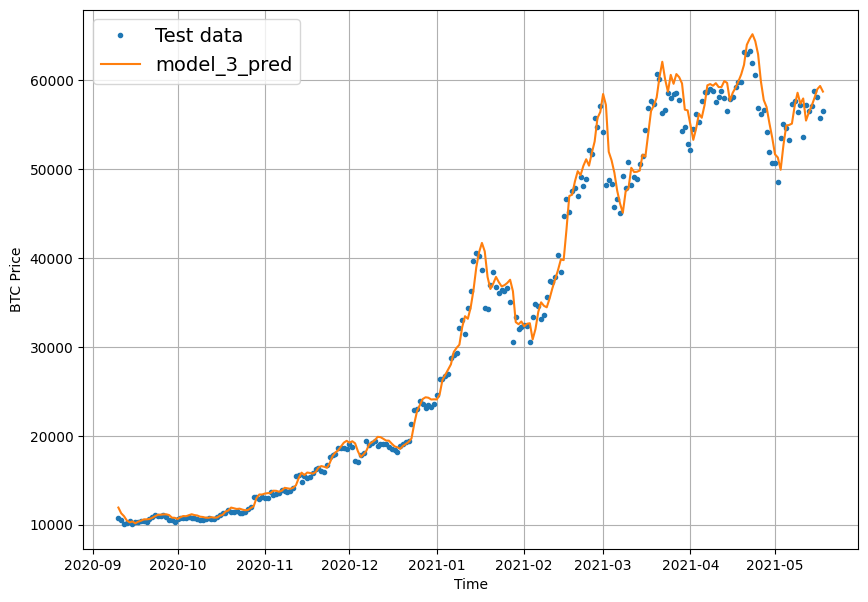

In [83]:
offset = 300
plt.figure(figsize=(10,7))
plot_times_series(x_test[-len(test_windows):],test_labels[:,0],start=offset , format=".",label="Test data")
plot_times_series(x_test[-len(test_windows):],tf.reduce_mean(model_3_preds,axis=1),format="-",start=offset,label="model_3_pred")

## Which of our model is performing the best so far ?

<Axes: >

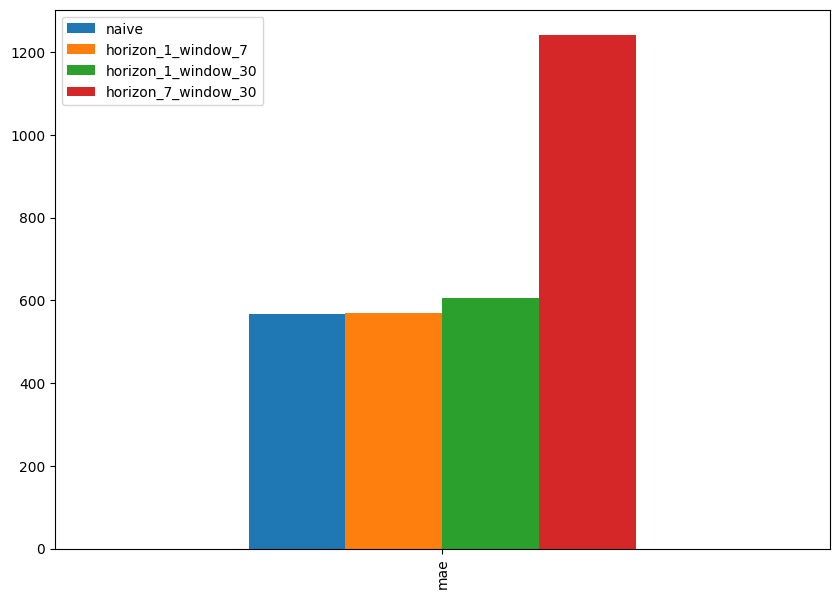

In [84]:
import pandas as pd
pd.DataFrame({
    "naive" : naive_results["mae"],
    "horizon_1_window_7" : model_1_results["mae"],
    "horizon_1_window_30" : model_2_results["mae"],
    "horizon_7_window_30" : model_3_results["mae"]},index=["mae"]).plot(figsize=(10,7),kind="bar")

naive model performe so good ...

## Model_4 : Conv1D 

In [85]:
HORIZON = 1 # Predict next day of Bitcoin prices
WINDOW_SIZE = 7  # Use previous week worth data


In [86]:
# Create windowsd data
full_windows , full_labels = make_windows(btc_price)
full_windows.shape , full_labels.shape

((2780, 7), (2780, 1))

In [87]:
# Create train_test sets
train_windows , test_windows , train_labels , test_labels = make_train_test_splits(full_windows,full_labels)
len(train_windows) , len(train_labels) , len(test_windows) , len(test_labels)

(2224, 2224, 556, 556)

In [88]:
x = tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [89]:
expand_dims_layer = layers.Lambda(lambda x : tf.expand_dims(x,axis=1)) # add an extra layer

In [90]:
print(f"Original shape: {x.shape}") # (window_size)
print(f"Expand shape: {expand_dims_layer(x).shape}")
print(f"Original values with expanded shape:\n{expand_dims_layer(x)}")

Original shape: (7,)
Expand shape: (7, 1)
Original values with expanded shape:
[[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [91]:
# Create model_4

inputs = layers.Input(shape=(7,))

x = layers.Lambda(lambda x : tf.expand_dims(x,axis=1))(inputs)

x = layers.Conv1D(128,7,padding="causal",activation="relu")(x)

outputs = layers.Dense(HORIZON)(x)

model_4 = tf.keras.Model(inputs,outputs)

model_4.compile(loss=tf.keras.losses.MAE,
               optimizer=tf.keras.optimizers.Adam())
model_4.fit(train_windows,
           train_labels,
           batch_size=128,
           epochs=100,
           verbose=1,
           validation_data=(test_windows,test_labels),
           callbacks=[creat_model_checkpoint("model_4_Conv1d")])

Epoch 1/100
18/18 [==============================] - ETA: 0s - loss: 1568.8269 INFO:tensorflow:Assets written to: model_expriments/model_4_Conv1d/assets


INFO:tensorflow:Assets written to: model_expriments/model_4_Conv1d/assets


18/18 [==============================] - 2s 35ms/step - loss: 1568.8269 - val_loss: 1089.0519
Epoch 2/100
18/18 [==============================] - 0s 3ms/step - loss: 341.0273 - val_loss: 1568.6775
Epoch 3/100
18/18 [==============================] - 0s 2ms/step - loss: 223.7972 - val_loss: 1110.3230
Epoch 4/100
 1/18 [>.............................] - ETA: 0s - loss: 246.1121INFO:tensorflow:Assets written to: model_expriments/model_4_Conv1d/assets


INFO:tensorflow:Assets written to: model_expriments/model_4_Conv1d/assets


18/18 [==============================] - 0s 17ms/step - loss: 196.4447 - val_loss: 1060.2081
Epoch 5/100
 1/18 [>.............................] - ETA: 0s - loss: 206.5106INFO:tensorflow:Assets written to: model_expriments/model_4_Conv1d/assets


INFO:tensorflow:Assets written to: model_expriments/model_4_Conv1d/assets


18/18 [==============================] - 0s 16ms/step - loss: 189.6329 - val_loss: 1059.3943
Epoch 6/100
 1/18 [>.............................] - ETA: 0s - loss: 143.5923INFO:tensorflow:Assets written to: model_expriments/model_4_Conv1d/assets


INFO:tensorflow:Assets written to: model_expriments/model_4_Conv1d/assets


18/18 [==============================] - 0s 17ms/step - loss: 187.2424 - val_loss: 1050.8307
Epoch 7/100
 1/18 [>.............................] - ETA: 0s - loss: 237.6950INFO:tensorflow:Assets written to: model_expriments/model_4_Conv1d/assets


INFO:tensorflow:Assets written to: model_expriments/model_4_Conv1d/assets


18/18 [==============================] - 0s 17ms/step - loss: 186.2351 - val_loss: 1022.3729
Epoch 8/100
18/18 [==============================] - 0s 3ms/step - loss: 181.2456 - val_loss: 1024.1893
Epoch 9/100
18/18 [==============================] - 0s 3ms/step - loss: 179.0113 - val_loss: 1039.9161
Epoch 10/100
 1/18 [>.............................] - ETA: 0s - loss: 196.0607INFO:tensorflow:Assets written to: model_expriments/model_4_Conv1d/assets


INFO:tensorflow:Assets written to: model_expriments/model_4_Conv1d/assets


18/18 [==============================] - 0s 16ms/step - loss: 176.9978 - val_loss: 988.7130
Epoch 11/100
 1/18 [>.............................] - ETA: 0s - loss: 194.9979INFO:tensorflow:Assets written to: model_expriments/model_4_Conv1d/assets


INFO:tensorflow:Assets written to: model_expriments/model_4_Conv1d/assets


18/18 [==============================] - 0s 16ms/step - loss: 174.2878 - val_loss: 966.6828
Epoch 12/100
18/18 [==============================] - 0s 2ms/step - loss: 174.1078 - val_loss: 1001.1863
Epoch 13/100
18/18 [==============================] - 0s 2ms/step - loss: 169.4617 - val_loss: 974.0430
Epoch 14/100
 1/18 [>.............................] - ETA: 0s - loss: 190.3761INFO:tensorflow:Assets written to: model_expriments/model_4_Conv1d/assets


INFO:tensorflow:Assets written to: model_expriments/model_4_Conv1d/assets


18/18 [==============================] - 0s 16ms/step - loss: 166.3341 - val_loss: 941.8794
Epoch 15/100
18/18 [==============================] - 0s 2ms/step - loss: 164.4567 - val_loss: 972.5035
Epoch 16/100
 1/18 [>.............................] - ETA: 0s - loss: 155.4319INFO:tensorflow:Assets written to: model_expriments/model_4_Conv1d/assets


INFO:tensorflow:Assets written to: model_expriments/model_4_Conv1d/assets


18/18 [==============================] - 0s 16ms/step - loss: 161.4449 - val_loss: 892.0876
Epoch 17/100
18/18 [==============================] - 0s 3ms/step - loss: 158.2283 - val_loss: 910.2241
Epoch 18/100
 1/18 [>.............................] - ETA: 0s - loss: 163.6897INFO:tensorflow:Assets written to: model_expriments/model_4_Conv1d/assets


INFO:tensorflow:Assets written to: model_expriments/model_4_Conv1d/assets


18/18 [==============================] - 0s 17ms/step - loss: 155.8712 - val_loss: 878.4952
Epoch 19/100
18/18 [==============================] - 0s 3ms/step - loss: 152.4052 - val_loss: 883.8423
Epoch 20/100
 1/18 [>.............................] - ETA: 0s - loss: 163.7953INFO:tensorflow:Assets written to: model_expriments/model_4_Conv1d/assets


INFO:tensorflow:Assets written to: model_expriments/model_4_Conv1d/assets


18/18 [==============================] - 0s 16ms/step - loss: 151.4507 - val_loss: 839.4230
Epoch 21/100
 1/18 [>.............................] - ETA: 0s - loss: 207.0181INFO:tensorflow:Assets written to: model_expriments/model_4_Conv1d/assets


INFO:tensorflow:Assets written to: model_expriments/model_4_Conv1d/assets


18/18 [==============================] - 0s 16ms/step - loss: 149.9056 - val_loss: 815.8476
Epoch 22/100
18/18 [==============================] - 0s 2ms/step - loss: 147.2968 - val_loss: 823.7733
Epoch 23/100
18/18 [==============================] - 0s 3ms/step - loss: 144.0806 - val_loss: 822.1396
Epoch 24/100
 1/18 [>.............................] - ETA: 0s - loss: 163.9627INFO:tensorflow:Assets written to: model_expriments/model_4_Conv1d/assets


INFO:tensorflow:Assets written to: model_expriments/model_4_Conv1d/assets


18/18 [==============================] - 0s 17ms/step - loss: 144.8030 - val_loss: 811.3313
Epoch 25/100
 1/18 [>.............................] - ETA: 0s - loss: 152.1160INFO:tensorflow:Assets written to: model_expriments/model_4_Conv1d/assets


INFO:tensorflow:Assets written to: model_expriments/model_4_Conv1d/assets


18/18 [==============================] - 0s 17ms/step - loss: 141.1629 - val_loss: 778.8618
Epoch 26/100
 1/18 [>.............................] - ETA: 0s - loss: 145.7985INFO:tensorflow:Assets written to: model_expriments/model_4_Conv1d/assets


INFO:tensorflow:Assets written to: model_expriments/model_4_Conv1d/assets


18/18 [==============================] - 0s 18ms/step - loss: 137.9856 - val_loss: 764.0851
Epoch 27/100
 1/18 [>.............................] - ETA: 0s - loss: 195.3824INFO:tensorflow:Assets written to: model_expriments/model_4_Conv1d/assets


INFO:tensorflow:Assets written to: model_expriments/model_4_Conv1d/assets


18/18 [==============================] - 0s 28ms/step - loss: 137.7561 - val_loss: 750.8707
Epoch 28/100
 1/18 [>.............................] - ETA: 0s - loss: 136.3188INFO:tensorflow:Assets written to: model_expriments/model_4_Conv1d/assets


INFO:tensorflow:Assets written to: model_expriments/model_4_Conv1d/assets


18/18 [==============================] - 0s 17ms/step - loss: 134.4316 - val_loss: 749.2544
Epoch 29/100
 1/18 [>.............................] - ETA: 0s - loss: 126.8880INFO:tensorflow:Assets written to: model_expriments/model_4_Conv1d/assets


INFO:tensorflow:Assets written to: model_expriments/model_4_Conv1d/assets


18/18 [==============================] - 0s 18ms/step - loss: 132.9146 - val_loss: 732.8846
Epoch 30/100
18/18 [==============================] - 0s 2ms/step - loss: 134.8752 - val_loss: 803.6113
Epoch 31/100
18/18 [==============================] - 0s 2ms/step - loss: 140.6243 - val_loss: 813.0038
Epoch 32/100
18/18 [==============================] - 0s 2ms/step - loss: 135.4708 - val_loss: 755.9447
Epoch 33/100
 1/18 [>.............................] - ETA: 0s - loss: 158.7805INFO:tensorflow:Assets written to: model_expriments/model_4_Conv1d/assets


INFO:tensorflow:Assets written to: model_expriments/model_4_Conv1d/assets


18/18 [==============================] - 0s 16ms/step - loss: 131.7091 - val_loss: 728.8126
Epoch 34/100
 1/18 [>.............................] - ETA: 0s - loss: 142.6778INFO:tensorflow:Assets written to: model_expriments/model_4_Conv1d/assets


INFO:tensorflow:Assets written to: model_expriments/model_4_Conv1d/assets


18/18 [==============================] - 0s 17ms/step - loss: 128.8728 - val_loss: 711.7014
Epoch 35/100
 1/18 [>.............................] - ETA: 0s - loss: 112.2094INFO:tensorflow:Assets written to: model_expriments/model_4_Conv1d/assets


INFO:tensorflow:Assets written to: model_expriments/model_4_Conv1d/assets


18/18 [==============================] - 0s 16ms/step - loss: 127.7129 - val_loss: 699.4572
Epoch 36/100
18/18 [==============================] - 0s 2ms/step - loss: 129.7388 - val_loss: 743.8456
Epoch 37/100
 1/18 [>.............................] - ETA: 0s - loss: 162.6414INFO:tensorflow:Assets written to: model_expriments/model_4_Conv1d/assets


INFO:tensorflow:Assets written to: model_expriments/model_4_Conv1d/assets


18/18 [==============================] - 0s 16ms/step - loss: 126.8411 - val_loss: 674.8782
Epoch 38/100
 1/18 [>.............................] - ETA: 0s - loss: 115.2970INFO:tensorflow:Assets written to: model_expriments/model_4_Conv1d/assets


INFO:tensorflow:Assets written to: model_expriments/model_4_Conv1d/assets


18/18 [==============================] - 0s 17ms/step - loss: 124.3107 - val_loss: 669.7509
Epoch 39/100
18/18 [==============================] - 0s 2ms/step - loss: 124.9463 - val_loss: 698.6677
Epoch 40/100
 1/18 [>.............................] - ETA: 0s - loss: 126.5870INFO:tensorflow:Assets written to: model_expriments/model_4_Conv1d/assets


INFO:tensorflow:Assets written to: model_expriments/model_4_Conv1d/assets


18/18 [==============================] - 0s 17ms/step - loss: 122.5446 - val_loss: 667.6111
Epoch 41/100
 1/18 [>.............................] - ETA: 0s - loss: 112.5590INFO:tensorflow:Assets written to: model_expriments/model_4_Conv1d/assets


INFO:tensorflow:Assets written to: model_expriments/model_4_Conv1d/assets


18/18 [==============================] - 0s 17ms/step - loss: 122.6116 - val_loss: 652.9185
Epoch 42/100
18/18 [==============================] - 0s 2ms/step - loss: 123.7521 - val_loss: 656.1334
Epoch 43/100
 1/18 [>.............................] - ETA: 0s - loss: 99.4573INFO:tensorflow:Assets written to: model_expriments/model_4_Conv1d/assets


INFO:tensorflow:Assets written to: model_expriments/model_4_Conv1d/assets


18/18 [==============================] - 0s 17ms/step - loss: 120.2875 - val_loss: 647.1801
Epoch 44/100
18/18 [==============================] - 0s 2ms/step - loss: 120.5619 - val_loss: 647.2393
Epoch 45/100
18/18 [==============================] - 0s 2ms/step - loss: 122.1584 - val_loss: 650.7405
Epoch 46/100
 1/18 [>.............................] - ETA: 0s - loss: 93.8719INFO:tensorflow:Assets written to: model_expriments/model_4_Conv1d/assets


INFO:tensorflow:Assets written to: model_expriments/model_4_Conv1d/assets


18/18 [==============================] - 0s 16ms/step - loss: 119.1635 - val_loss: 644.7556
Epoch 47/100
18/18 [==============================] - 0s 2ms/step - loss: 122.5414 - val_loss: 707.5927
Epoch 48/100
18/18 [==============================] - 0s 2ms/step - loss: 118.2719 - val_loss: 656.7584
Epoch 49/100
 1/18 [>.............................] - ETA: 0s - loss: 166.2459INFO:tensorflow:Assets written to: model_expriments/model_4_Conv1d/assets


INFO:tensorflow:Assets written to: model_expriments/model_4_Conv1d/assets


18/18 [==============================] - 0s 16ms/step - loss: 118.9554 - val_loss: 626.2551
Epoch 50/100
18/18 [==============================] - 0s 3ms/step - loss: 118.8979 - val_loss: 641.4305
Epoch 51/100
18/18 [==============================] - 0s 2ms/step - loss: 116.8792 - val_loss: 627.7409
Epoch 52/100
18/18 [==============================] - 0s 2ms/step - loss: 117.0707 - val_loss: 634.2858
Epoch 53/100
18/18 [==============================] - 0s 2ms/step - loss: 119.4304 - val_loss: 651.9033
Epoch 54/100
18/18 [==============================] - 0s 2ms/step - loss: 120.5126 - val_loss: 693.0450
Epoch 55/100
18/18 [==============================] - 0s 2ms/step - loss: 118.7020 - val_loss: 628.9247
Epoch 56/100
18/18 [==============================] - 0s 2ms/step - loss: 116.6317 - val_loss: 837.5708
Epoch 57/100
 1/18 [>.............................] - ETA: 0s - loss: 125.8191INFO:tensorflow:Assets written to: model_expriments/model_4_Conv1d/assets


INFO:tensorflow:Assets written to: model_expriments/model_4_Conv1d/assets


18/18 [==============================] - 0s 18ms/step - loss: 143.2094 - val_loss: 610.9144
Epoch 58/100
18/18 [==============================] - 0s 3ms/step - loss: 122.9967 - val_loss: 613.6216
Epoch 59/100
 1/18 [>.............................] - ETA: 0s - loss: 83.5797INFO:tensorflow:Assets written to: model_expriments/model_4_Conv1d/assets


INFO:tensorflow:Assets written to: model_expriments/model_4_Conv1d/assets


18/18 [==============================] - 0s 18ms/step - loss: 114.2756 - val_loss: 606.5237
Epoch 60/100
18/18 [==============================] - 0s 2ms/step - loss: 113.8997 - val_loss: 607.6065
Epoch 61/100
18/18 [==============================] - 0s 2ms/step - loss: 113.6462 - val_loss: 614.8033
Epoch 62/100
 1/18 [>.............................] - ETA: 0s - loss: 82.2939INFO:tensorflow:Assets written to: model_expriments/model_4_Conv1d/assets


INFO:tensorflow:Assets written to: model_expriments/model_4_Conv1d/assets


18/18 [==============================] - 0s 28ms/step - loss: 113.5154 - val_loss: 601.1973
Epoch 63/100
18/18 [==============================] - 0s 3ms/step - loss: 114.5252 - val_loss: 614.7970
Epoch 64/100
18/18 [==============================] - 0s 3ms/step - loss: 113.7485 - val_loss: 642.9905
Epoch 65/100
 1/18 [>.............................] - ETA: 0s - loss: 134.8408INFO:tensorflow:Assets written to: model_expriments/model_4_Conv1d/assets


INFO:tensorflow:Assets written to: model_expriments/model_4_Conv1d/assets


18/18 [==============================] - 0s 18ms/step - loss: 115.7473 - val_loss: 599.3433
Epoch 66/100
 1/18 [>.............................] - ETA: 0s - loss: 120.2372INFO:tensorflow:Assets written to: model_expriments/model_4_Conv1d/assets


INFO:tensorflow:Assets written to: model_expriments/model_4_Conv1d/assets


18/18 [==============================] - 0s 17ms/step - loss: 113.6276 - val_loss: 594.8160
Epoch 67/100
18/18 [==============================] - 0s 2ms/step - loss: 113.0176 - val_loss: 664.2535
Epoch 68/100
18/18 [==============================] - 0s 3ms/step - loss: 121.9948 - val_loss: 760.4003
Epoch 69/100
18/18 [==============================] - 0s 2ms/step - loss: 133.6650 - val_loss: 678.6812
Epoch 70/100
 1/18 [>.............................] - ETA: 0s - loss: 132.3413INFO:tensorflow:Assets written to: model_expriments/model_4_Conv1d/assets


INFO:tensorflow:Assets written to: model_expriments/model_4_Conv1d/assets


18/18 [==============================] - 0s 16ms/step - loss: 119.6749 - val_loss: 594.5851
Epoch 71/100
18/18 [==============================] - 0s 2ms/step - loss: 114.0268 - val_loss: 609.4702
Epoch 72/100
 1/18 [>.............................] - ETA: 0s - loss: 100.9007INFO:tensorflow:Assets written to: model_expriments/model_4_Conv1d/assets


INFO:tensorflow:Assets written to: model_expriments/model_4_Conv1d/assets


18/18 [==============================] - 0s 16ms/step - loss: 111.9440 - val_loss: 589.6935
Epoch 73/100
18/18 [==============================] - 0s 3ms/step - loss: 112.9419 - val_loss: 614.7886
Epoch 74/100
 1/18 [>.............................] - ETA: 0s - loss: 166.2997INFO:tensorflow:Assets written to: model_expriments/model_4_Conv1d/assets


INFO:tensorflow:Assets written to: model_expriments/model_4_Conv1d/assets


18/18 [==============================] - 0s 17ms/step - loss: 111.6740 - val_loss: 587.3244
Epoch 75/100
18/18 [==============================] - 0s 2ms/step - loss: 111.8571 - val_loss: 612.5685
Epoch 76/100
18/18 [==============================] - 0s 3ms/step - loss: 112.5096 - val_loss: 588.0932
Epoch 77/100
18/18 [==============================] - 0s 2ms/step - loss: 111.4522 - val_loss: 588.0276
Epoch 78/100
 1/18 [>.............................] - ETA: 0s - loss: 111.1241INFO:tensorflow:Assets written to: model_expriments/model_4_Conv1d/assets


INFO:tensorflow:Assets written to: model_expriments/model_4_Conv1d/assets


18/18 [==============================] - 0s 18ms/step - loss: 111.6975 - val_loss: 584.3271
Epoch 79/100
18/18 [==============================] - 0s 3ms/step - loss: 111.6566 - val_loss: 595.1381
Epoch 80/100
18/18 [==============================] - 0s 2ms/step - loss: 110.3110 - val_loss: 585.4777
Epoch 81/100
 1/18 [>.............................] - ETA: 0s - loss: 94.4238INFO:tensorflow:Assets written to: model_expriments/model_4_Conv1d/assets


INFO:tensorflow:Assets written to: model_expriments/model_4_Conv1d/assets


18/18 [==============================] - 0s 16ms/step - loss: 110.0845 - val_loss: 584.0745
Epoch 82/100
18/18 [==============================] - 0s 2ms/step - loss: 115.3128 - val_loss: 588.2577
Epoch 83/100
18/18 [==============================] - 0s 2ms/step - loss: 114.1715 - val_loss: 672.9539
Epoch 84/100
18/18 [==============================] - 0s 2ms/step - loss: 115.8214 - val_loss: 586.6072
Epoch 85/100
18/18 [==============================] - 0s 2ms/step - loss: 110.1254 - val_loss: 587.7458
Epoch 86/100
18/18 [==============================] - 0s 2ms/step - loss: 109.7694 - val_loss: 628.1140
Epoch 87/100
 1/18 [>.............................] - ETA: 0s - loss: 128.4852INFO:tensorflow:Assets written to: model_expriments/model_4_Conv1d/assets


INFO:tensorflow:Assets written to: model_expriments/model_4_Conv1d/assets


18/18 [==============================] - 0s 16ms/step - loss: 110.9569 - val_loss: 578.6880
Epoch 88/100
18/18 [==============================] - 0s 2ms/step - loss: 111.4982 - val_loss: 620.7955
Epoch 89/100
18/18 [==============================] - 0s 2ms/step - loss: 110.4845 - val_loss: 579.6428
Epoch 90/100
18/18 [==============================] - 0s 2ms/step - loss: 110.8780 - val_loss: 702.5109
Epoch 91/100
18/18 [==============================] - 0s 2ms/step - loss: 115.1466 - val_loss: 616.0280
Epoch 92/100
18/18 [==============================] - 0s 2ms/step - loss: 110.9624 - val_loss: 581.0109
Epoch 93/100
18/18 [==============================] - 0s 2ms/step - loss: 115.7512 - val_loss: 650.4721
Epoch 94/100
 1/18 [>.............................] - ETA: 0s - loss: 151.7490INFO:tensorflow:Assets written to: model_expriments/model_4_Conv1d/assets


INFO:tensorflow:Assets written to: model_expriments/model_4_Conv1d/assets


18/18 [==============================] - 0s 15ms/step - loss: 111.3875 - val_loss: 574.9641
Epoch 95/100
18/18 [==============================] - 0s 2ms/step - loss: 109.9065 - val_loss: 581.7590
Epoch 96/100
18/18 [==============================] - 0s 2ms/step - loss: 114.0835 - val_loss: 619.2155
Epoch 97/100
18/18 [==============================] - 0s 2ms/step - loss: 111.4922 - val_loss: 581.6995
Epoch 98/100
 1/18 [>.............................] - ETA: 0s - loss: 118.3052INFO:tensorflow:Assets written to: model_expriments/model_4_Conv1d/assets


INFO:tensorflow:Assets written to: model_expriments/model_4_Conv1d/assets


18/18 [==============================] - 0s 16ms/step - loss: 108.6438 - val_loss: 573.8735
Epoch 99/100
18/18 [==============================] - 0s 2ms/step - loss: 108.7762 - val_loss: 575.4865
Epoch 100/100
18/18 [==============================] - 0s 2ms/step - loss: 109.4328 - val_loss: 629.4365


In [92]:
model_4.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 951us/step - loss: 629.4364


629.4364013671875

In [93]:
model_4.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 7)]               0         
                                                                 
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            6400      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 6529 (25.50 KB)
Trainable params: 6529 (25.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [94]:
model_4 = tf.keras.models.load_model("./model_expriments/model_4_Conv1d/")
model_4.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 954us/step - loss: 573.8736


573.8735961914062

In [95]:
# make prediction
model_4_preds = make_pred(model_4 , test_windows)
model_4_preds[:10]

18/18 [==============================] - 0s 745us/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8905.075, 8794.46 , 8980.009, 8796.087, 8749.573, 8725.896,
       8681.65 , 8542.068, 8461.093, 8510.284], dtype=float32)>

In [96]:
model_4_results = evaluate_preds(tf.squeeze(test_labels),
                                model_4_preds)
model_4_results

{'mae': 573.87354,
 'mse': 1195216.5,
 'rmse': 1093.2595,
 'mape': 2.5726664,
 'mase': 1.0081369}

In [97]:
model_1_results

{'mae': 570.3884,
 'mse': 1162499.5,
 'rmse': 1078.1927,
 'mape': 2.5682366,
 'mase': 1.0020145}

## Model_5 : RNN (LSTM)

In [98]:
tf.random.set_seed(42)

# Create model
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x : tf.expand_dims(x,axis=1))(inputs)
x = layers.LSTM(128,return_sequences=True,activation="relu")(x) # If we want to stack some LSTM layers we should set return_sequence=TRUE
x = layers.LSTM(128,activation="relu")(x)
x = layers.Dense(32,activation="relu")(x)
output = layers.Dense(HORIZON)(x)

model_5 = tf.keras.Model(inputs,output,name="model_5_LSTM")

# Compile
model_5.compile(loss="mae",
               optimizer=tf.keras.optimizers.Adam())

# Fit
model_5.fit(train_windows,
           train_labels,
           epochs=100,
           verbose=1,
           batch_size=128,
           validation_data=(test_windows,test_labels),
           callbacks=[creat_model_checkpoint(model_name=model_5.name)])


Epoch 1/100
15/18 [========================>.....] - ETA: 0s - loss: 2979.2327 INFO:tensorflow:Assets written to: model_expriments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_expriments/model_5_LSTM/assets


18/18 [==============================] - 4s 95ms/step - loss: 2974.8796 - val_loss: 16751.3320
Epoch 2/100
16/18 [=========================>....] - ETA: 0s - loss: 1847.5743INFO:tensorflow:Assets written to: model_expriments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_expriments/model_5_LSTM/assets


18/18 [==============================] - 1s 82ms/step - loss: 1724.4537 - val_loss: 1202.6071
Epoch 3/100
16/18 [=========================>....] - ETA: 0s - loss: 353.7947INFO:tensorflow:Assets written to: model_expriments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_expriments/model_5_LSTM/assets


18/18 [==============================] - 2s 92ms/step - loss: 341.9750 - val_loss: 1088.5845
Epoch 4/100
15/18 [========================>.....] - ETA: 0s - loss: 208.8331INFO:tensorflow:Assets written to: model_expriments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_expriments/model_5_LSTM/assets


18/18 [==============================] - 1s 77ms/step - loss: 204.0992 - val_loss: 1003.9463
Epoch 5/100
17/18 [===========================>..] - ETA: 0s - loss: 172.8331INFO:tensorflow:Assets written to: model_expriments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_expriments/model_5_LSTM/assets


18/18 [==============================] - 2s 95ms/step - loss: 170.9618 - val_loss: 955.7017
Epoch 6/100
18/18 [==============================] - 0s 4ms/step - loss: 168.8944 - val_loss: 1034.7797
Epoch 7/100
16/18 [=========================>....] - ETA: 0s - loss: 176.8676INFO:tensorflow:Assets written to: model_expriments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_expriments/model_5_LSTM/assets


18/18 [==============================] - 1s 76ms/step - loss: 173.6802 - val_loss: 942.5378
Epoch 8/100
16/18 [=========================>....] - ETA: 0s - loss: 174.3015INFO:tensorflow:Assets written to: model_expriments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_expriments/model_5_LSTM/assets


18/18 [==============================] - 1s 79ms/step - loss: 175.0388 - val_loss: 920.0878
Epoch 9/100
15/18 [========================>.....] - ETA: 0s - loss: 166.6301INFO:tensorflow:Assets written to: model_expriments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_expriments/model_5_LSTM/assets


18/18 [==============================] - 2s 98ms/step - loss: 163.2738 - val_loss: 896.9783
Epoch 10/100
14/18 [======================>.......] - ETA: 0s - loss: 152.8512INFO:tensorflow:Assets written to: model_expriments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_expriments/model_5_LSTM/assets


18/18 [==============================] - 1s 81ms/step - loss: 158.6574 - val_loss: 892.7759
Epoch 11/100
18/18 [==============================] - 0s 6ms/step - loss: 157.9449 - val_loss: 916.8690
Epoch 12/100
18/18 [==============================] - 0s 5ms/step - loss: 153.2012 - val_loss: 952.4523
Epoch 13/100
18/18 [==============================] - 0s 5ms/step - loss: 152.8013 - val_loss: 936.7568
Epoch 14/100
17/18 [===========================>..] - ETA: 0s - loss: 145.0600INFO:tensorflow:Assets written to: model_expriments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_expriments/model_5_LSTM/assets


18/18 [==============================] - 1s 77ms/step - loss: 147.7401 - val_loss: 868.3027
Epoch 15/100
13/18 [====================>.........] - ETA: 0s - loss: 148.4913INFO:tensorflow:Assets written to: model_expriments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_expriments/model_5_LSTM/assets


18/18 [==============================] - 2s 89ms/step - loss: 149.0805 - val_loss: 803.4404
Epoch 16/100
17/18 [===========================>..] - ETA: 0s - loss: 140.0694INFO:tensorflow:Assets written to: model_expriments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_expriments/model_5_LSTM/assets


18/18 [==============================] - 1s 74ms/step - loss: 138.4716 - val_loss: 766.6633
Epoch 17/100
18/18 [==============================] - ETA: 0s - loss: 137.0780INFO:tensorflow:Assets written to: model_expriments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_expriments/model_5_LSTM/assets


18/18 [==============================] - 1s 88ms/step - loss: 137.0780 - val_loss: 759.7452
Epoch 18/100
13/18 [====================>.........] - ETA: 0s - loss: 143.8334INFO:tensorflow:Assets written to: model_expriments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_expriments/model_5_LSTM/assets


18/18 [==============================] - 1s 74ms/step - loss: 135.0198 - val_loss: 746.9269
Epoch 19/100
18/18 [==============================] - 0s 4ms/step - loss: 133.7997 - val_loss: 810.0984
Epoch 20/100
17/18 [===========================>..] - ETA: 0s - loss: 130.9519INFO:tensorflow:Assets written to: model_expriments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_expriments/model_5_LSTM/assets


18/18 [==============================] - 1s 74ms/step - loss: 131.2521 - val_loss: 719.9442
Epoch 21/100
17/18 [===========================>..] - ETA: 0s - loss: 135.3640INFO:tensorflow:Assets written to: model_expriments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_expriments/model_5_LSTM/assets


18/18 [==============================] - 2s 89ms/step - loss: 136.1890 - val_loss: 695.6190
Epoch 22/100
18/18 [==============================] - 0s 5ms/step - loss: 131.6894 - val_loss: 810.4431
Epoch 23/100
17/18 [===========================>..] - ETA: 0s - loss: 128.8324INFO:tensorflow:Assets written to: model_expriments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_expriments/model_5_LSTM/assets


18/18 [==============================] - 1s 74ms/step - loss: 129.6871 - val_loss: 685.2278
Epoch 24/100
17/18 [===========================>..] - ETA: 0s - loss: 126.2103INFO:tensorflow:Assets written to: model_expriments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_expriments/model_5_LSTM/assets


18/18 [==============================] - 1s 74ms/step - loss: 124.7094 - val_loss: 681.0278
Epoch 25/100
17/18 [===========================>..] - ETA: 0s - loss: 123.5140INFO:tensorflow:Assets written to: model_expriments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_expriments/model_5_LSTM/assets


18/18 [==============================] - 1s 87ms/step - loss: 123.0299 - val_loss: 661.5676
Epoch 26/100
17/18 [===========================>..] - ETA: 0s - loss: 121.7658INFO:tensorflow:Assets written to: model_expriments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_expriments/model_5_LSTM/assets


18/18 [==============================] - 1s 73ms/step - loss: 121.9315 - val_loss: 659.9899
Epoch 27/100
18/18 [==============================] - 0s 4ms/step - loss: 119.7912 - val_loss: 678.1368
Epoch 28/100
18/18 [==============================] - ETA: 0s - loss: 119.2858INFO:tensorflow:Assets written to: model_expriments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_expriments/model_5_LSTM/assets


18/18 [==============================] - 1s 85ms/step - loss: 119.2858 - val_loss: 640.4651
Epoch 29/100
18/18 [==============================] - 0s 5ms/step - loss: 124.0867 - val_loss: 677.1971
Epoch 30/100
17/18 [===========================>..] - ETA: 0s - loss: 129.3952INFO:tensorflow:Assets written to: model_expriments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_expriments/model_5_LSTM/assets


18/18 [==============================] - 1s 74ms/step - loss: 128.9780 - val_loss: 636.6044
Epoch 31/100
17/18 [===========================>..] - ETA: 0s - loss: 120.6558INFO:tensorflow:Assets written to: model_expriments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_expriments/model_5_LSTM/assets


18/18 [==============================] - 1s 74ms/step - loss: 120.9750 - val_loss: 633.2329
Epoch 32/100
18/18 [==============================] - ETA: 0s - loss: 120.1503INFO:tensorflow:Assets written to: model_expriments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_expriments/model_5_LSTM/assets


18/18 [==============================] - 1s 87ms/step - loss: 120.1503 - val_loss: 623.9897
Epoch 33/100
18/18 [==============================] - 0s 4ms/step - loss: 118.7694 - val_loss: 672.0704
Epoch 34/100
17/18 [===========================>..] - ETA: 0s - loss: 116.6698INFO:tensorflow:Assets written to: model_expriments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_expriments/model_5_LSTM/assets


18/18 [==============================] - 1s 73ms/step - loss: 116.9971 - val_loss: 619.6266
Epoch 35/100
18/18 [==============================] - 0s 4ms/step - loss: 117.4346 - val_loss: 629.4062
Epoch 36/100
18/18 [==============================] - ETA: 0s - loss: 118.9264INFO:tensorflow:Assets written to: model_expriments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_expriments/model_5_LSTM/assets


18/18 [==============================] - 1s 73ms/step - loss: 118.9264 - val_loss: 610.0497
Epoch 37/100
18/18 [==============================] - 0s 5ms/step - loss: 115.5095 - val_loss: 613.4515
Epoch 38/100
17/18 [===========================>..] - ETA: 0s - loss: 115.1088INFO:tensorflow:Assets written to: model_expriments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_expriments/model_5_LSTM/assets


18/18 [==============================] - 1s 86ms/step - loss: 114.9490 - val_loss: 601.6351
Epoch 39/100
18/18 [==============================] - 0s 5ms/step - loss: 117.6373 - val_loss: 607.0669
Epoch 40/100
18/18 [==============================] - 0s 4ms/step - loss: 132.2493 - val_loss: 727.9483
Epoch 41/100
18/18 [==============================] - 0s 4ms/step - loss: 132.5557 - val_loss: 713.2858
Epoch 42/100
18/18 [==============================] - 0s 4ms/step - loss: 125.6319 - val_loss: 694.2403
Epoch 43/100
18/18 [==============================] - 0s 4ms/step - loss: 121.5701 - val_loss: 659.4412
Epoch 44/100
18/18 [==============================] - 0s 4ms/step - loss: 119.0322 - val_loss: 643.7532
Epoch 45/100
18/18 [==============================] - 0s 4ms/step - loss: 117.8247 - val_loss: 701.5400
Epoch 46/100
18/18 [==============================] - 0s 4ms/step - loss: 118.7405 - val_loss: 744.5039
Epoch 47/100
18/18 [==============================] - 0s 4ms/step - loss: 12

INFO:tensorflow:Assets written to: model_expriments/model_5_LSTM/assets


18/18 [==============================] - 1s 74ms/step - loss: 111.9582 - val_loss: 599.3090
Epoch 62/100
18/18 [==============================] - 0s 5ms/step - loss: 109.8344 - val_loss: 610.6683
Epoch 63/100
16/18 [=========================>....] - ETA: 0s - loss: 113.2385INFO:tensorflow:Assets written to: model_expriments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_expriments/model_5_LSTM/assets


18/18 [==============================] - 1s 88ms/step - loss: 111.9957 - val_loss: 594.6290
Epoch 64/100
18/18 [==============================] - 0s 5ms/step - loss: 111.3978 - val_loss: 730.5685
Epoch 65/100
18/18 [==============================] - 0s 5ms/step - loss: 125.8965 - val_loss: 626.5109
Epoch 66/100
17/18 [===========================>..] - ETA: 0s - loss: 112.7368INFO:tensorflow:Assets written to: model_expriments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_expriments/model_5_LSTM/assets


18/18 [==============================] - 1s 77ms/step - loss: 112.3736 - val_loss: 588.6495
Epoch 67/100
18/18 [==============================] - 0s 5ms/step - loss: 109.2710 - val_loss: 633.4176
Epoch 68/100
18/18 [==============================] - 0s 5ms/step - loss: 116.6306 - val_loss: 654.8596
Epoch 69/100
18/18 [==============================] - 0s 5ms/step - loss: 130.8774 - val_loss: 700.8091
Epoch 70/100
18/18 [==============================] - 0s 5ms/step - loss: 137.5353 - val_loss: 789.2217
Epoch 71/100
18/18 [==============================] - 0s 5ms/step - loss: 128.4390 - val_loss: 652.7902
Epoch 72/100
18/18 [==============================] - 0s 5ms/step - loss: 114.2211 - val_loss: 590.9014
Epoch 73/100
18/18 [==============================] - 0s 5ms/step - loss: 109.0072 - val_loss: 594.3088
Epoch 74/100
18/18 [==============================] - 0s 5ms/step - loss: 116.5343 - val_loss: 592.2755
Epoch 75/100
18/18 [==============================] - 0s 4ms/step - loss: 11

INFO:tensorflow:Assets written to: model_expriments/model_5_LSTM/assets


18/18 [==============================] - 1s 81ms/step - loss: 113.5119 - val_loss: 582.6498
Epoch 77/100
18/18 [==============================] - 0s 5ms/step - loss: 108.3864 - val_loss: 583.9695
Epoch 78/100
18/18 [==============================] - 0s 5ms/step - loss: 108.8523 - val_loss: 585.7155
Epoch 79/100
18/18 [==============================] - 0s 5ms/step - loss: 109.1994 - val_loss: 611.8239
Epoch 80/100
18/18 [==============================] - 0s 4ms/step - loss: 112.8715 - val_loss: 625.1870
Epoch 81/100
18/18 [==============================] - 0s 5ms/step - loss: 109.5655 - val_loss: 666.8703
Epoch 82/100
18/18 [==============================] - 0s 5ms/step - loss: 120.8884 - val_loss: 718.6533
Epoch 83/100
18/18 [==============================] - 0s 5ms/step - loss: 130.6387 - val_loss: 589.7909
Epoch 84/100
18/18 [==============================] - 0s 5ms/step - loss: 125.5416 - val_loss: 604.3906
Epoch 85/100
18/18 [==============================] - 0s 5ms/step - loss: 11

INFO:tensorflow:Assets written to: model_expriments/model_5_LSTM/assets


18/18 [==============================] - 2s 91ms/step - loss: 110.2788 - val_loss: 576.5117
Epoch 89/100
18/18 [==============================] - 0s 5ms/step - loss: 108.3689 - val_loss: 597.7950
Epoch 90/100
18/18 [==============================] - 0s 5ms/step - loss: 108.6336 - val_loss: 577.4918
Epoch 91/100
18/18 [==============================] - 0s 5ms/step - loss: 113.6805 - val_loss: 589.8528
Epoch 92/100
18/18 [==============================] - 0s 5ms/step - loss: 110.1540 - val_loss: 641.7770
Epoch 93/100
18/18 [==============================] - 0s 5ms/step - loss: 123.0542 - val_loss: 633.0214
Epoch 94/100
18/18 [==============================] - 0s 5ms/step - loss: 124.3034 - val_loss: 662.2118
Epoch 95/100
18/18 [==============================] - 0s 5ms/step - loss: 112.0005 - val_loss: 583.5118
Epoch 96/100
18/18 [==============================] - 0s 5ms/step - loss: 115.8994 - val_loss: 642.6671
Epoch 97/100
18/18 [==============================] - 0s 5ms/step - loss: 11

INFO:tensorflow:Assets written to: model_expriments/model_5_LSTM/assets


18/18 [==============================] - 1s 77ms/step - loss: 112.0515 - val_loss: 575.1646


In [99]:
# Load in best version of model 5 and evaluate it
model_5 = tf.keras.models.load_model("./model_expriments/model_5_LSTM/")
model_5.evaluate(test_windows , test_labels)

18/18 [==============================] - 0s 1ms/step - loss: 575.1918


575.1918334960938

In [100]:
# make predictions with our LSTM model
model_5_preds = make_pred(model_5,test_windows)
model_5_preds[:10]

18/18 [==============================] - 0s 1ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8858.021 , 8793.566 , 8996.821 , 8717.3125, 8749.396 , 8727.534 ,
       8663.996 , 8485.305 , 8470.841 , 8501.884 ], dtype=float32)>

In [101]:
# Evaluate model 5 predictions
model_5_results = evaluate_preds(tf.squeeze(test_labels),
                                model_5_preds)
model_5_results

{'mae': 575.19183,
 'mse': 1174953.1,
 'rmse': 1083.9525,
 'mape': 2.5598865,
 'mase': 1.0104527}

In [102]:
model_1_results

{'mae': 570.3884,
 'mse': 1162499.5,
 'rmse': 1078.1927,
 'mape': 2.5682366,
 'mase': 1.0020145}

Because neural networs are sch powerful algorithm, they can be useed for almost any problems, hoever , that deosen't mean they ' ll achive performance or usable results .

## Make a multivariate time series 

So far all of our models have barely kept up with the naïve forecast.

And so far all of them have been trained on a single variable (also called univariate time series): the historical price of Bitcoin.

If predicting the price of Bitcoin using the price of Bitcoin hasn't worked out very well, maybe giving our model more information may help.

More information is a vague term because we could actually feed almost anything to our model(s) and they would still try to find patterns. 

For example, we could use the historical price of Bitcoin as well as anyone (Donald Trump) on that day to predict the future price of Bitcoin.

What would be better is if we passed our model something related to Bitcoin (again, this is quite vauge, since in an open system like a market, you could argue everything is related).

This will be different for almost every time series you work on but in our case, we could try to see if the [Bitcoin block reward size](https://www.investopedia.com/terms/b/block-reward.asp) adds any predictive power to our model(s).

What is the Bitcoin block reward size?

The Bitcoin block reward size is the number of Bitcoin someone receives from mining a Bitcoin block.


| Block Reward | Start Date |
| ----- | ----- |
| 50 | 3 January 2009 (2009-01-03) |
| 25 | 28 November 2012 |
| 12.5 | 9 July 2016 |
| 6.25 | 11 May 2020 |
| 3.125 | TBA (expected 2024) |
| 1.5625 | TBA (expected 2028) | 


In [103]:
bitcoin_prices

,Price
Date,
2013-10-01,123.654990
2013-10-02,125.455000
2013-10-03,108.584830
2013-10-04,118.674660
2013-10-05,121.338660
...,...
2021-05-14,49764.132082
2021-05-15,50032.693137
2021-05-16,47885.625255


In [104]:
# Add bitcoin halving events to our dataset
block_reward_1 = 50 # 3 January 2009 - this block reward isn't in our dataset
block_reward_2 = 25 # 8 November 2012
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 18 May 2020

# block reward day
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-18")


In [105]:
block_reward_2_datetime < bitcoin_prices.index[0] < block_reward_3_datetime

True

In [106]:
# Create data ranges of where specific block_reward values should be 
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
block_reward_2_days , block_reward_3_days

(1012, 2421)

In [107]:
# Add in block_reward column
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None

# Add in block_reward values  as a feature to our dataframe 
bitcoin_prices_block.iloc[:block_reward_2_days , -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days,-1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:,-1] = block_reward_4

In [108]:
bitcoin_prices_block

,Price,block_reward
Date,,
2013-10-01,123.654990,25
2013-10-02,125.455000,25
2013-10-03,108.584830,25
2013-10-04,118.674660,25
2013-10-05,121.338660,25
...,...,...
2021-05-14,49764.132082,6.25
2021-05-15,50032.693137,6.25
2021-05-16,47885.625255,6.25


<Axes: xlabel='Date'>

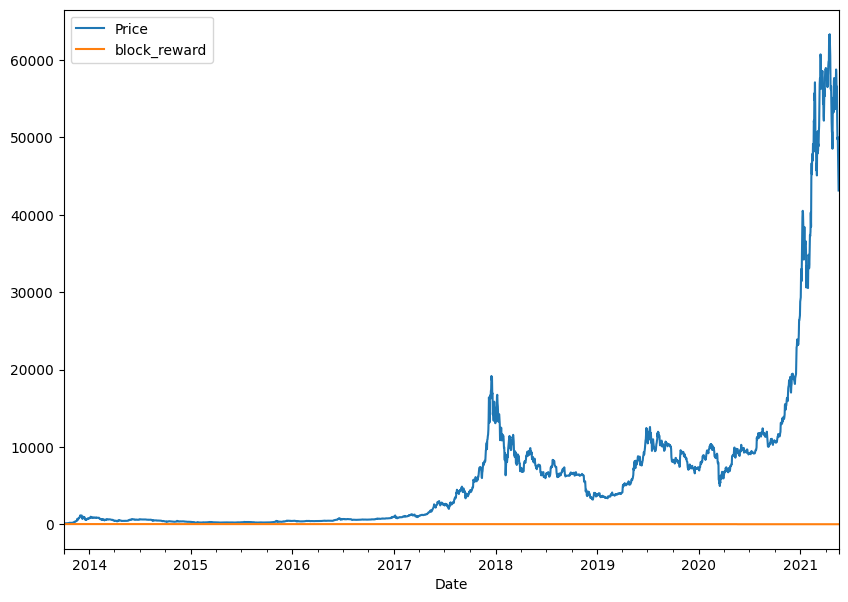

In [109]:
# Plot the block reward vs price over time 
bitcoin_prices_block.plot(figsize=(10,7))

as you can see the features are not scaled ... 

In [110]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
bitcoin_price_block_norm = pd.DataFrame(scaler.fit_transform(bitcoin_prices_block[["Price" , "block_reward"]])
                                        ,columns=bitcoin_prices_block.columns,
                                       index = bitcoin_prices_block.index)
bitcoin_price_block_norm

,Price,block_reward
Date,,
2013-10-01,0.000238,1.0
2013-10-02,0.000267,1.0
2013-10-03,0.000000,1.0
2013-10-04,0.000160,1.0
2013-10-05,0.000202,1.0
...,...,...
2021-05-14,0.785214,0.0
2021-05-15,0.789461,0.0
2021-05-16,0.755509,0.0


<Axes: xlabel='Date'>

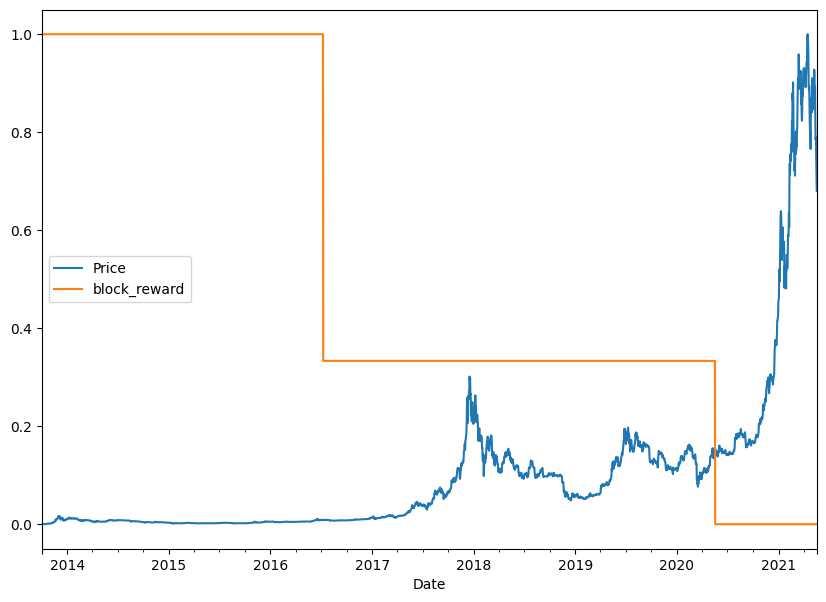

In [111]:
bitcoin_price_block_norm.plot(figsize=(10,7))

## Making a windowed dataset with pandas

In [112]:
# Setup dataset hyperparameters
HORIZON = 1
WINDOW_SIZE = 7

In [113]:
# Make a copy of the Bitcoin historical data with block reward feature
bitcoin_prices_windowed = bitcoin_prices_block.copy()
for i in range(WINDOW_SIZE):
    bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)
bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [114]:
# Create X (windows) and y (horizon) feature
x = bitcoin_prices_windowed.dropna().drop("Price",axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)
x.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [115]:
y.head()

Date
2013-10-08    123.032997
2013-10-09    124.049004
2013-10-10    125.961159
2013-10-11    125.279663
2013-10-12    125.927498
Name: Price, dtype: float32

In [116]:
# Make train and test sets using indexing
split_size = int(len(x) * 0.8)
x_train , y_train = x[:split_size] , y[:split_size]
x_test, y_test = x[split_size:] , y[split_size:]
len(x_train) , len(y_train) , len(x_test) , len(y_test)

(2224, 2224, 556, 556)

## Model_6 : Dense (multivariate time series)


In [117]:
tf.random.set_seed(42)
# Make multivariate time series model
model_6 = tf.keras.Sequential([
    layers.Dense(128,activation="relu"),
    layers.Dense(HORIZON)
],name="model_6_Dense_multivariate")

model_6.compile(loss="mae",
               optimizer=tf.keras.optimizers.Adam())

model_6.fit(x_train,
           y_train,
           epochs=100,
           batch_size=128,
           verbose=1,
           validation_data=(x_test,y_test),
           callbacks=[creat_model_checkpoint(model_name = model_6.name)])

Epoch 1/100
 1/18 [>.............................] - ETA: 8s - loss: 3354.7485INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Assets written to: model_expriments/model_6_Dense_multivariate/assets


INFO:tensorflow:Assets written to: model_expriments/model_6_Dense_multivariate/assets


18/18 [==============================] - 1s 17ms/step - loss: 1387.1715 - val_loss: 2835.8921
Epoch 2/100
 1/18 [>.............................] - ETA: 0s - loss: 418.5396INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Assets written to: model_expriments/model_6_Dense_multivariate/assets


INFO:tensorflow:Assets written to: model_expriments/model_6_Dense_multivariate/assets


18/18 [==============================] - 0s 13ms/step - loss: 353.5428 - val_loss: 1561.1691
Epoch 3/100
 1/18 [>.............................] - ETA: 0s - loss: 203.6953INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Assets written to: model_expriments/model_6_Dense_multivariate/assets


INFO:tensorflow:Assets written to: model_expriments/model_6_Dense_multivariate/assets


18/18 [==============================] - 0s 13ms/step - loss: 198.1365 - val_loss: 1107.8093
Epoch 4/100
 1/18 [>.............................] - ETA: 0s - loss: 221.7398INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Assets written to: model_expriments/model_6_Dense_multivariate/assets


INFO:tensorflow:Assets written to: model_expriments/model_6_Dense_multivariate/assets


18/18 [==============================] - 0s 13ms/step - loss: 175.0960 - val_loss: 933.4542
Epoch 5/100
 1/18 [>.............................] - ETA: 0s - loss: 169.0843INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Assets written to: model_expriments/model_6_Dense_multivariate/assets


INFO:tensorflow:Assets written to: model_expriments/model_6_Dense_multivariate/assets


18/18 [==============================] - 0s 13ms/step - loss: 167.3908 - val_loss: 907.8572
Epoch 6/100
18/18 [==============================] - 0s 2ms/step - loss: 165.7699 - val_loss: 916.8555
Epoch 7/100
 1/18 [>.............................] - ETA: 0s - loss: 197.3279INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Assets written to: model_expriments/model_6_Dense_multivariate/assets


INFO:tensorflow:Assets written to: model_expriments/model_6_Dense_multivariate/assets


18/18 [==============================] - 0s 13ms/step - loss: 160.0335 - val_loss: 856.9667
Epoch 8/100
 1/18 [>.............................] - ETA: 0s - loss: 135.8471INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Assets written to: model_expriments/model_6_Dense_multivariate/assets


INFO:tensorflow:Assets written to: model_expriments/model_6_Dense_multivariate/assets


18/18 [==============================] - 0s 13ms/step - loss: 154.0691 - val_loss: 836.9853
Epoch 9/100
 1/18 [>.............................] - ETA: 0s - loss: 134.5874INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Assets written to: model_expriments/model_6_Dense_multivariate/assets


INFO:tensorflow:Assets written to: model_expriments/model_6_Dense_multivariate/assets


18/18 [==============================] - 0s 13ms/step - loss: 151.4011 - val_loss: 826.0074
Epoch 10/100
 1/18 [>.............................] - ETA: 0s - loss: 156.9872INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Assets written to: model_expriments/model_6_Dense_multivariate/assets


INFO:tensorflow:Assets written to: model_expriments/model_6_Dense_multivariate/assets


18/18 [==============================] - 0s 13ms/step - loss: 149.4747 - val_loss: 800.3475
Epoch 11/100
18/18 [==============================] - 0s 2ms/step - loss: 144.5372 - val_loss: 838.7758
Epoch 12/100
18/18 [==============================] - 0s 2ms/step - loss: 142.7628 - val_loss: 839.8383
Epoch 13/100
18/18 [==============================] - 0s 2ms/step - loss: 142.4831 - val_loss: 824.5359
Epoch 14/100
 1/18 [>.............................] - ETA: 0s - loss: 147.6243INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Assets written to: model_expriments/model_6_Dense_multivariate/assets


INFO:tensorflow:Assets written to: model_expriments/model_6_Dense_multivariate/assets


18/18 [==============================] - 0s 13ms/step - loss: 136.0483 - val_loss: 734.0532
Epoch 15/100
 1/18 [>.............................] - ETA: 0s - loss: 129.2003INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Assets written to: model_expriments/model_6_Dense_multivariate/assets


INFO:tensorflow:Assets written to: model_expriments/model_6_Dense_multivariate/assets


18/18 [==============================] - 0s 13ms/step - loss: 137.8653 - val_loss: 727.8400
Epoch 16/100
18/18 [==============================] - 0s 2ms/step - loss: 130.6031 - val_loss: 753.4528
Epoch 17/100
18/18 [==============================] - 0s 2ms/step - loss: 129.7742 - val_loss: 769.1724
Epoch 18/100
 1/18 [>.............................] - ETA: 0s - loss: 146.5995INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Assets written to: model_expriments/model_6_Dense_multivariate/assets


INFO:tensorflow:Assets written to: model_expriments/model_6_Dense_multivariate/assets


18/18 [==============================] - 0s 12ms/step - loss: 129.0642 - val_loss: 685.5092
Epoch 19/100
18/18 [==============================] - 0s 2ms/step - loss: 125.4245 - val_loss: 702.7600
Epoch 20/100
 1/18 [>.............................] - ETA: 0s - loss: 142.5530INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Assets written to: model_expriments/model_6_Dense_multivariate/assets


INFO:tensorflow:Assets written to: model_expriments/model_6_Dense_multivariate/assets


18/18 [==============================] - 0s 12ms/step - loss: 123.3681 - val_loss: 669.1148
Epoch 21/100
 1/18 [>.............................] - ETA: 0s - loss: 140.4810INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Assets written to: model_expriments/model_6_Dense_multivariate/assets


INFO:tensorflow:Assets written to: model_expriments/model_6_Dense_multivariate/assets


18/18 [==============================] - 0s 12ms/step - loss: 125.9217 - val_loss: 656.3775
Epoch 22/100
18/18 [==============================] - 0s 2ms/step - loss: 124.2906 - val_loss: 664.6352
Epoch 23/100
 1/18 [>.............................] - ETA: 0s - loss: 127.2884INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Assets written to: model_expriments/model_6_Dense_multivariate/assets


INFO:tensorflow:Assets written to: model_expriments/model_6_Dense_multivariate/assets


18/18 [==============================] - 0s 13ms/step - loss: 124.8976 - val_loss: 652.5400
Epoch 24/100
18/18 [==============================] - 0s 2ms/step - loss: 124.2413 - val_loss: 658.5106
Epoch 25/100
 1/18 [>.............................] - ETA: 0s - loss: 130.0230INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Assets written to: model_expriments/model_6_Dense_multivariate/assets


INFO:tensorflow:Assets written to: model_expriments/model_6_Dense_multivariate/assets


18/18 [==============================] - 0s 13ms/step - loss: 121.4291 - val_loss: 633.1113
Epoch 26/100
 1/18 [>.............................] - ETA: 0s - loss: 115.8466INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Assets written to: model_expriments/model_6_Dense_multivariate/assets


INFO:tensorflow:Assets written to: model_expriments/model_6_Dense_multivariate/assets


18/18 [==============================] - 0s 13ms/step - loss: 119.4365 - val_loss: 629.6158
Epoch 27/100
18/18 [==============================] - 0s 2ms/step - loss: 120.9155 - val_loss: 630.5479
Epoch 28/100
 1/18 [>.............................] - ETA: 0s - loss: 109.9786INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Assets written to: model_expriments/model_6_Dense_multivariate/assets


INFO:tensorflow:Assets written to: model_expriments/model_6_Dense_multivariate/assets


18/18 [==============================] - 0s 13ms/step - loss: 116.3309 - val_loss: 624.0784
Epoch 29/100
 1/18 [>.............................] - ETA: 0s - loss: 119.1387INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Assets written to: model_expriments/model_6_Dense_multivariate/assets


INFO:tensorflow:Assets written to: model_expriments/model_6_Dense_multivariate/assets


18/18 [==============================] - 0s 13ms/step - loss: 118.4427 - val_loss: 623.9639
Epoch 30/100
18/18 [==============================] - 0s 2ms/step - loss: 121.9909 - val_loss: 633.9125
Epoch 31/100
18/18 [==============================] - 0s 2ms/step - loss: 122.3846 - val_loss: 698.8488
Epoch 32/100
 1/18 [>.............................] - ETA: 0s - loss: 126.9164INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Assets written to: model_expriments/model_6_Dense_multivariate/assets


INFO:tensorflow:Assets written to: model_expriments/model_6_Dense_multivariate/assets


18/18 [==============================] - 0s 12ms/step - loss: 117.7238 - val_loss: 616.8604
Epoch 33/100
18/18 [==============================] - 0s 2ms/step - loss: 117.1230 - val_loss: 627.1074
Epoch 34/100
18/18 [==============================] - 0s 2ms/step - loss: 115.9541 - val_loss: 620.9147
Epoch 35/100
 1/18 [>.............................] - ETA: 0s - loss: 105.2752INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Assets written to: model_expriments/model_6_Dense_multivariate/assets


INFO:tensorflow:Assets written to: model_expriments/model_6_Dense_multivariate/assets


18/18 [==============================] - 0s 13ms/step - loss: 114.3921 - val_loss: 602.9941
Epoch 36/100
 1/18 [>.............................] - ETA: 0s - loss: 160.1712INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Assets written to: model_expriments/model_6_Dense_multivariate/assets


INFO:tensorflow:Assets written to: model_expriments/model_6_Dense_multivariate/assets


18/18 [==============================] - 0s 12ms/step - loss: 118.7579 - val_loss: 600.9160
Epoch 37/100
18/18 [==============================] - 0s 2ms/step - loss: 115.9916 - val_loss: 601.1329
Epoch 38/100
18/18 [==============================] - 0s 2ms/step - loss: 116.1677 - val_loss: 604.3497
Epoch 39/100
 1/18 [>.............................] - ETA: 0s - loss: 127.2298INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Assets written to: model_expriments/model_6_Dense_multivariate/assets


INFO:tensorflow:Assets written to: model_expriments/model_6_Dense_multivariate/assets


18/18 [==============================] - 0s 12ms/step - loss: 114.8565 - val_loss: 594.2817
Epoch 40/100
18/18 [==============================] - 0s 2ms/step - loss: 112.7797 - val_loss: 595.0918
Epoch 41/100
18/18 [==============================] - 0s 2ms/step - loss: 112.4600 - val_loss: 635.2901
Epoch 42/100
18/18 [==============================] - 0s 2ms/step - loss: 116.9574 - val_loss: 642.3716
Epoch 43/100
18/18 [==============================] - 0s 2ms/step - loss: 119.5532 - val_loss: 650.3862
Epoch 44/100
18/18 [==============================] - 0s 2ms/step - loss: 125.8748 - val_loss: 665.7311
Epoch 45/100
18/18 [==============================] - 0s 2ms/step - loss: 117.4985 - val_loss: 611.5617
Epoch 46/100
 1/18 [>.............................] - ETA: 0s - loss: 85.5228INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 14

INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Assets written to: model_expriments/model_6_Dense_multivariate/assets


INFO:tensorflow:Assets written to: model_expriments/model_6_Dense_multivariate/assets


18/18 [==============================] - 0s 13ms/step - loss: 115.6198 - val_loss: 589.2787
Epoch 47/100
18/18 [==============================] - 0s 2ms/step - loss: 110.6668 - val_loss: 623.5466
Epoch 48/100
18/18 [==============================] - 0s 2ms/step - loss: 110.9288 - val_loss: 597.7734
Epoch 49/100
18/18 [==============================] - 0s 2ms/step - loss: 110.3863 - val_loss: 610.8595
Epoch 50/100
18/18 [==============================] - 0s 2ms/step - loss: 113.7433 - val_loss: 622.4988
Epoch 51/100
18/18 [==============================] - 0s 2ms/step - loss: 113.5589 - val_loss: 620.0228
Epoch 52/100
18/18 [==============================] - 0s 2ms/step - loss: 114.1507 - val_loss: 605.2485
Epoch 53/100
18/18 [==============================] - 0s 2ms/step - loss: 114.9207 - val_loss: 664.8904
Epoch 54/100
18/18 [==============================] - 0s 2ms/step - loss: 121.8279 - val_loss: 658.6344
Epoch 55/100
 1/18 [>.............................] - ETA: 0s - loss: 137.85

INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Assets written to: model_expriments/model_6_Dense_multivariate/assets


INFO:tensorflow:Assets written to: model_expriments/model_6_Dense_multivariate/assets


18/18 [==============================] - 0s 12ms/step - loss: 113.3285 - val_loss: 588.4388
Epoch 56/100
18/18 [==============================] - 0s 2ms/step - loss: 113.7947 - val_loss: 791.1289
Epoch 57/100
18/18 [==============================] - 0s 2ms/step - loss: 141.9732 - val_loss: 656.2313
Epoch 58/100
18/18 [==============================] - 0s 2ms/step - loss: 124.8508 - val_loss: 672.8619
Epoch 59/100
18/18 [==============================] - 0s 2ms/step - loss: 109.5314 - val_loss: 602.0253
Epoch 60/100
18/18 [==============================] - 0s 2ms/step - loss: 111.4619 - val_loss: 653.8406
Epoch 61/100
18/18 [==============================] - 0s 2ms/step - loss: 111.9132 - val_loss: 595.4695
Epoch 62/100
 1/18 [>.............................] - ETA: 0s - loss: 78.3246INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 14

INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Assets written to: model_expriments/model_6_Dense_multivariate/assets


INFO:tensorflow:Assets written to: model_expriments/model_6_Dense_multivariate/assets


18/18 [==============================] - 0s 13ms/step - loss: 108.3389 - val_loss: 582.3870
Epoch 63/100
18/18 [==============================] - 0s 2ms/step - loss: 109.7209 - val_loss: 588.5082
Epoch 64/100
18/18 [==============================] - 0s 2ms/step - loss: 109.3272 - val_loss: 598.2659
Epoch 65/100
18/18 [==============================] - 0s 2ms/step - loss: 111.7454 - val_loss: 606.4407
Epoch 66/100
 1/18 [>.............................] - ETA: 0s - loss: 121.2210INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Assets written to: model_expriments/model_6_Dense_multivariate/assets


INFO:tensorflow:Assets written to: model_expriments/model_6_Dense_multivariate/assets


18/18 [==============================] - 0s 12ms/step - loss: 109.1179 - val_loss: 579.9543
Epoch 67/100
18/18 [==============================] - 0s 2ms/step - loss: 107.9551 - val_loss: 660.3594
Epoch 68/100
18/18 [==============================] - 0s 2ms/step - loss: 111.7061 - val_loss: 688.5126
Epoch 69/100
18/18 [==============================] - 0s 2ms/step - loss: 126.0949 - val_loss: 633.2607
Epoch 70/100
18/18 [==============================] - 0s 2ms/step - loss: 130.3504 - val_loss: 588.2173
Epoch 71/100
18/18 [==============================] - 0s 2ms/step - loss: 113.6333 - val_loss: 601.2674
Epoch 72/100
 1/18 [>.............................] - ETA: 0s - loss: 100.8247INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Assets written to: model_expriments/model_6_Dense_multivariate/assets


INFO:tensorflow:Assets written to: model_expriments/model_6_Dense_multivariate/assets


18/18 [==============================] - 0s 12ms/step - loss: 109.4147 - val_loss: 575.0106
Epoch 73/100
18/18 [==============================] - 0s 2ms/step - loss: 109.8761 - val_loss: 581.9523
Epoch 74/100
18/18 [==============================] - 0s 2ms/step - loss: 107.9415 - val_loss: 575.5382
Epoch 75/100
 1/18 [>.............................] - ETA: 0s - loss: 124.1209INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Assets written to: model_expriments/model_6_Dense_multivariate/assets


INFO:tensorflow:Assets written to: model_expriments/model_6_Dense_multivariate/assets


18/18 [==============================] - 0s 23ms/step - loss: 108.0922 - val_loss: 574.1743
Epoch 76/100
18/18 [==============================] - 0s 2ms/step - loss: 110.9081 - val_loss: 574.7563
Epoch 77/100
 1/18 [>.............................] - ETA: 0s - loss: 84.0573INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Assets written to: model_expriments/model_6_Dense_multivariate/assets


INFO:tensorflow:Assets written to: model_expriments/model_6_Dense_multivariate/assets


18/18 [==============================] - 0s 13ms/step - loss: 107.3347 - val_loss: 573.8959
Epoch 78/100
18/18 [==============================] - 0s 2ms/step - loss: 109.2737 - val_loss: 581.3438
Epoch 79/100
18/18 [==============================] - 0s 2ms/step - loss: 108.0994 - val_loss: 586.7764
Epoch 80/100
18/18 [==============================] - 0s 2ms/step - loss: 108.8377 - val_loss: 608.6803
Epoch 81/100
 1/18 [>.............................] - ETA: 0s - loss: 97.0458INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Assets written to: model_expriments/model_6_Dense_multivariate/assets


INFO:tensorflow:Assets written to: model_expriments/model_6_Dense_multivariate/assets


18/18 [==============================] - 0s 13ms/step - loss: 107.9730 - val_loss: 572.7783
Epoch 82/100
 1/18 [>.............................] - ETA: 0s - loss: 187.0500INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Assets written to: model_expriments/model_6_Dense_multivariate/assets


INFO:tensorflow:Assets written to: model_expriments/model_6_Dense_multivariate/assets


18/18 [==============================] - 0s 13ms/step - loss: 115.8712 - val_loss: 571.8810
Epoch 83/100
18/18 [==============================] - 0s 2ms/step - loss: 113.3955 - val_loss: 705.0417
Epoch 84/100
18/18 [==============================] - 0s 2ms/step - loss: 114.9844 - val_loss: 605.1680
Epoch 85/100
18/18 [==============================] - 0s 2ms/step - loss: 108.1777 - val_loss: 584.4520
Epoch 86/100
18/18 [==============================] - 0s 2ms/step - loss: 106.2835 - val_loss: 584.6911
Epoch 87/100
18/18 [==============================] - 0s 2ms/step - loss: 107.3322 - val_loss: 614.8652
Epoch 88/100
18/18 [==============================] - 0s 2ms/step - loss: 108.6396 - val_loss: 574.1776
Epoch 89/100
 1/18 [>.............................] - ETA: 0s - loss: 100.6512INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 1

INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Assets written to: model_expriments/model_6_Dense_multivariate/assets


INFO:tensorflow:Assets written to: model_expriments/model_6_Dense_multivariate/assets


18/18 [==============================] - 0s 13ms/step - loss: 106.7825 - val_loss: 569.9464
Epoch 90/100
18/18 [==============================] - 0s 2ms/step - loss: 106.7710 - val_loss: 581.7836
Epoch 91/100
 1/18 [>.............................] - ETA: 0s - loss: 88.4869INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956443b400>, 140279003079664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f956464eaf0>, 140279003079424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f9564729190>, 140279002112208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f95404097f0>, 140279002113168), {}).


INFO:tensorflow:Assets written to: model_expriments/model_6_Dense_multivariate/assets


INFO:tensorflow:Assets written to: model_expriments/model_6_Dense_multivariate/assets


18/18 [==============================] - 0s 12ms/step - loss: 108.3637 - val_loss: 569.6877
Epoch 92/100
18/18 [==============================] - 0s 2ms/step - loss: 111.4644 - val_loss: 573.0507
Epoch 93/100
18/18 [==============================] - 0s 2ms/step - loss: 116.7041 - val_loss: 635.6990
Epoch 94/100
18/18 [==============================] - 0s 2ms/step - loss: 111.3205 - val_loss: 602.7712
Epoch 95/100
18/18 [==============================] - 0s 2ms/step - loss: 106.3180 - val_loss: 570.0944
Epoch 96/100
18/18 [==============================] - 0s 2ms/step - loss: 109.4155 - val_loss: 617.4200
Epoch 97/100
18/18 [==============================] - 0s 2ms/step - loss: 109.3223 - val_loss: 619.1569
Epoch 98/100
18/18 [==============================] - 0s 2ms/step - loss: 108.2213 - val_loss: 582.1262
Epoch 99/100
18/18 [==============================] - 0s 2ms/step - loss: 107.2472 - val_loss: 576.8735
Epoch 100/100
18/18 [==============================] - 0s 2ms/step - loss: 1

In [118]:
# Evaluate multivariate model
model_6.evaluate(x_test,y_test)

18/18 [==============================] - 0s 716us/step - loss: 716.2529


716.2529296875

In [119]:
model_6 = tf.keras.models.load_model("./model_expriments/model_6_Dense_multivariate/")
model_6.evaluate(x_test,y_test)

18/18 [==============================] - 0s 797us/step - loss: 569.6878


569.6878051757812

In [120]:
# make predictions with multivariate model
model_6_preds = tf.squeeze(model_6.predict(x_test))
model_6_preds

18/18 [==============================] - 0s 695us/step


<tf.Tensor: shape=(556,), dtype=float32, numpy=
array([ 8827.206 ,  8752.331 ,  9007.414 ,  8761.538 ,  8719.403 ,
        8742.992 ,  8632.645 ,  8523.026 ,  8427.171 ,  8506.325 ,
        8242.509 ,  8092.318 ,  8054.176 ,  7644.2036,  7300.832 ,
        7263.0947,  7049.7456,  7155.2007,  7149.8086,  7425.206 ,
        7464.505 ,  7651.948 ,  7643.832 ,  7372.4873,  7351.75  ,
        7276.9233,  7221.2188,  7343.2637,  7504.4404,  7534.671 ,
        7565.8696,  7366.6816,  7228.7803,  7184.1636,  7160.17  ,
        7219.413 ,  7098.627 ,  7082.3203,  6911.271 ,  6590.9873,
        7256.8115,  7250.66  ,  7094.878 ,  7311.9067,  7217.872 ,
        7207.423 ,  7210.9316,  7212.7744,  7183.8994,  7216.3413,
        7294.788 ,  7384.5195,  7282.3096,  7176.394 ,  7163.5264,
        6970.3433,  7207.978 ,  7357.379 ,  7334.869 ,  7687.476 ,
        8026.99  ,  8122.0254,  7884.4404,  8035.051 ,  8117.49  ,
        8136.714 ,  8152.143 ,  8628.306 ,  8916.225 ,  8745.05  ,
        8931.6

In [121]:
# Evaluate predictions to get eval metrics 
model_6_results = evaluate_preds(y_test,
                                model_6_preds)
model_6_results

{'mae': 569.68774,
 'mse': 1165185.5,
 'rmse': 1079.4375,
 'mape': 2.5509968,
 'mase': 1.0007836}

In [122]:
model_1_results

{'mae': 570.3884,
 'mse': 1162499.5,
 'rmse': 1078.1927,
 'mape': 2.5682366,
 'mase': 1.0020145}

In [123]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

## Model_6 + normalize and multi-inputs

normalize our data ...

In [124]:
x

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,25.00,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.00,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.00,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.00,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.00,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661
...,...,...,...,...,...,...,...,...
2021-05-14,6.25,52147.820312,56573.554688,55715.546875,58102.191406,58788.210938,57107.121094,56583.851562
2021-05-15,6.25,49764.132812,52147.820312,56573.554688,55715.546875,58102.191406,58788.210938,57107.121094
2021-05-16,6.25,50032.691406,49764.132812,52147.820312,56573.554688,55715.546875,58102.191406,58788.210938


In [125]:
scaler = MinMaxScaler()
x_norm_reward = scaler.fit_transform(np.reshape(x.block_reward,(-1,1)))
# x_norm_reward = x.block_reward
x_norm_reward.shape , x_norm_reward

((2780, 1),
 array([[1.],
        [1.],
        [1.],
        ...,
        [0.],
        [0.],
        [0.]], dtype=float32))

In [126]:
x_norm_price = scaler.fit_transform(x.drop(columns=["block_reward"]))
# x_norm_price = x.drop(columns=["block_reward"])
x_norm_price.shape , x_norm_price

((2780, 7),
 array([[0.0000000e+00, 0.0000000e+00, 1.0807766e-05, ..., 0.0000000e+00,
         2.6677188e-04, 2.3830787e-04],
        [1.9580824e-05, 1.8025283e-05, 0.0000000e+00, ..., 1.5955267e-04,
         0.0000000e+00, 2.6677188e-04],
        [3.5650562e-05, 3.7605758e-05, 1.8025283e-05, ..., 2.0167918e-04,
         1.5955267e-04, 0.0000000e+00],
        ...,
        [7.8941715e-01, 7.8517348e-01, 8.2287443e-01, ..., 8.7932545e-01,
         9.1706598e-01, 9.2791420e-01],
        [7.5545806e-01, 7.8942102e-01, 7.8517348e-01, ..., 8.9289331e-01,
         8.7932545e-01, 9.1706598e-01],
        [7.1938038e-01, 7.5546253e-01, 7.8942102e-01, ..., 8.2290816e-01,
         8.9289331e-01, 8.7932545e-01]], dtype=float32))

In [127]:
y_norm_price = scaler.fit_transform(np.reshape(y[:split_size],(-1,1)))
y_norm_price.shape

(2224, 1)

make train and test dateset ... 

In [128]:
split_size = int(len(x) * 0.8)
x_price_train , x_reward_train , y_price_train = x_norm_price[:split_size],x_norm_reward[:split_size] , y[:split_size]
x_price_test,x_reward_test , y_price_test = x_norm_price[split_size:],x_norm_reward[split_size:] , y[split_size:]

start design architecture ...

In [129]:
# set random seed
tf.random.set_seed(42)

# make model for price
inputs_1 = layers.Input(shape=(7,))
dense_out_1 = layers.Dense(128,activation="relu")(inputs_1)
output_1 = tf.keras.Model(inputs=inputs_1,
                         outputs=dense_out_1)
# make model for reward
inputs_2 = layers.Input(shape=(1,))
dense_out_2 = layers.Dense(128,activation="relu")(inputs_2)
output_2 = tf.keras.Model(inputs_2,dense_out_2)
# Concatenate 
con = layers.Concatenate()([output_1.output,output_2.output])

# make output
dense_out_3 = layers.Dense(320,activation="relu")(con)
# di_nomr = layers.Lambda(lambda x : scaler.inverse_transform(np.asarray(x)))(dense_out_3)
outputs = layers.Dense(HORIZON)(dense_out_3)
model_6_2 = tf.keras.Model([inputs_1,
                           inputs_2],
                          outputs,name="model_6_2_multi_inputs")

model_6_2.compile(loss="mae",
                 optimizer=tf.keras.optimizers.Adam())

model_6_2.fit([x_price_train,x_reward_train],
             y_price_train,
              epochs=100,
             verbose=1,
             validation_data=([x_price_test,x_reward_test],y_price_test),
             batch_size=120)

Epoch 1/100
19/19 [==============================] - 1s 6ms/step - loss: 3157.7542 - val_loss: 20094.4629
Epoch 2/100
19/19 [==============================] - 0s 2ms/step - loss: 3154.8252 - val_loss: 20087.7773
Epoch 3/100
19/19 [==============================] - 0s 3ms/step - loss: 3146.4360 - val_loss: 20069.3203
Epoch 4/100
19/19 [==============================] - 0s 2ms/step - loss: 3126.9756 - val_loss: 20028.8906
Epoch 5/100
19/19 [==============================] - 0s 2ms/step - loss: 3088.8860 - val_loss: 19953.5371
Epoch 6/100
19/19 [==============================] - 0s 2ms/step - loss: 3023.1738 - val_loss: 19829.1699
Epoch 7/100
19/19 [==============================] - 0s 2ms/step - loss: 2927.8840 - val_loss: 19648.7891
Epoch 8/100
19/19 [==============================] - 0s 2ms/step - loss: 2836.4033 - val_loss: 19427.2285
Epoch 9/100
19/19 [==============================] - 0s 3ms/step - loss: 2772.3152 - val_loss: 19194.2090
Epoch 10/100
19/19 [==========================

In [130]:
model_6_2.summary()

Model: "model_6_2_multi_inputs"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 7)]                  0         []                            
                                                                                                  
 input_5 (InputLayer)        [(None, 1)]                  0         []                            
                                                                                                  
 dense_11 (Dense)            (None, 128)                  1024      ['input_4[0][0]']             
                                                                                                  
 dense_12 (Dense)            (None, 128)                  256       ['input_5[0][0]']             
                                                                             

## Model_6 + multi-inputs (without normalize)

normalize our data ...

In [131]:
x_reward = x.block_reward
x_reward.shape , x_reward

((2780,),
 Date
 2013-10-08    25.00
 2013-10-09    25.00
 2013-10-10    25.00
 2013-10-11    25.00
 2013-10-12    25.00
               ...  
 2021-05-14     6.25
 2021-05-15     6.25
 2021-05-16     6.25
 2021-05-17     6.25
 2021-05-18     6.25
 Name: block_reward, Length: 2780, dtype: float32)

In [132]:
x_price = x.drop(columns=["block_reward"])
x_price.shape , x_price

((2780, 7),
                  Price+1       Price+2       Price+3       Price+4  \
 Date                                                                 
 2013-10-08    121.794998    120.655327    121.338661    118.674660   
 2013-10-09    123.032997    121.794998    120.655327    121.338661   
 2013-10-10    124.049004    123.032997    121.794998    120.655327   
 2013-10-11    125.961159    124.049004    123.032997    121.794998   
 2013-10-12    125.279663    125.961159    124.049004    123.032997   
 ...                  ...           ...           ...           ...   
 2021-05-14  52147.820312  56573.554688  55715.546875  58102.191406   
 2021-05-15  49764.132812  52147.820312  56573.554688  55715.546875   
 2021-05-16  50032.691406  49764.132812  52147.820312  56573.554688   
 2021-05-17  47885.625000  50032.691406  49764.132812  52147.820312   
 2021-05-18  45604.617188  47885.625000  50032.691406  49764.132812   
 
                  Price+5       Price+6       Price+7  
 Date  

In [133]:
# y_norm_price = scaler.fit_transform(np.reshape(y[:split_size],(-1,1)))
# y_norm_price.shape

make train and test dateset ... 

In [134]:
split_size = int(len(x) * 0.8)
x_price_train , x_reward_train , y_price_train = x_price[:split_size],x_reward[:split_size] , y[:split_size]
x_price_test,x_reward_test , y_price_test = x_price[split_size:],x_reward[split_size:] , y[split_size:]

start design architecture ...

In [135]:
# set random seed
tf.random.set_seed(42)

# make model for price
inputs_1 = layers.Input(shape=(7,))
dense_out_1 = layers.Dense(128,activation="relu")(inputs_1)

# make model for reward
inputs_2 = layers.Input(shape=(1,))
dense_out_2 = layers.Dense(128,activation="relu")(inputs_2)

# Concatenate 
con = layers.Concatenate()([dense_out_1,dense_out_2])

# make output
dense_out_3 = layers.Dense(320,activation="relu")(con)
# drop_out = layers.Dropout(0.1)(dense_out_3)
outputs = layers.Dense(HORIZON)(dense_out_3)
model_6_3 = tf.keras.Model([inputs_1,
                           inputs_2],
                          outputs,name="model_6_2_multi_inputs")

model_6_3.compile(loss="mae",
                 optimizer=tf.keras.optimizers.Adam())

model_6_3.fit([x_price_train,x_reward_train],
             y_price_train,
              epochs=100,
             verbose=1,
             validation_data=([x_price_test,x_reward_test],y_price_test),
             batch_size=120)

Epoch 1/100
19/19 [==============================] - 1s 6ms/step - loss: 1117.6616 - val_loss: 3343.5513
Epoch 2/100
19/19 [==============================] - 0s 3ms/step - loss: 254.3464 - val_loss: 1030.7999
Epoch 3/100
19/19 [==============================] - 0s 2ms/step - loss: 177.1266 - val_loss: 926.7357
Epoch 4/100
19/19 [==============================] - 0s 2ms/step - loss: 164.5270 - val_loss: 815.9568
Epoch 5/100
19/19 [==============================] - 0s 2ms/step - loss: 138.6994 - val_loss: 707.4256
Epoch 6/100
19/19 [==============================] - 0s 2ms/step - loss: 123.6493 - val_loss: 743.5253
Epoch 7/100
19/19 [==============================] - 0s 2ms/step - loss: 119.4100 - val_loss: 607.6516
Epoch 8/100
19/19 [==============================] - 0s 2ms/step - loss: 123.2408 - val_loss: 613.1623
Epoch 9/100
19/19 [==============================] - 0s 2ms/step - loss: 121.7126 - val_loss: 593.7576
Epoch 10/100
19/19 [==============================] - 0s 2ms/step - lo

Epoch 80/100
19/19 [==============================] - 0s 2ms/step - loss: 110.9544 - val_loss: 573.4606
Epoch 81/100
19/19 [==============================] - 0s 2ms/step - loss: 104.9105 - val_loss: 579.0073
Epoch 82/100
19/19 [==============================] - 0s 2ms/step - loss: 128.6855 - val_loss: 751.6428
Epoch 83/100
19/19 [==============================] - 0s 3ms/step - loss: 146.8791 - val_loss: 582.1475
Epoch 84/100
19/19 [==============================] - 0s 3ms/step - loss: 124.9149 - val_loss: 596.0522
Epoch 85/100
19/19 [==============================] - 0s 3ms/step - loss: 113.0972 - val_loss: 585.8333
Epoch 86/100
19/19 [==============================] - 0s 2ms/step - loss: 109.6627 - val_loss: 571.1099
Epoch 87/100
19/19 [==============================] - 0s 2ms/step - loss: 105.1956 - val_loss: 591.5586
Epoch 88/100
19/19 [==============================] - 0s 2ms/step - loss: 105.1871 - val_loss: 584.9269
Epoch 89/100
19/19 [==============================] - 0s 2ms/ste

In [136]:
x_price_test.shape , x_reward_test.shape

((556, 7), (556,))

In [137]:
model_6_3.evaluate([x_price_test,x_reward_test],y_price_test)


18/18 [==============================] - 0s 965us/step - loss: 588.8947


588.8947143554688

In [138]:
model_6_3_pred = tf.squeeze(model_6_3.predict([x_price_test,x_reward_test]))
model_6_3_pred

18/18 [==============================] - 0s 844us/step


<tf.Tensor: shape=(556,), dtype=float32, numpy=
array([ 8762.305 ,  8713.147 ,  8978.171 ,  8689.482 ,  8701.302 ,
        8669.325 ,  8609.823 ,  8448.316 ,  8389.606 ,  8466.918 ,
        8172.5205,  8057.041 ,  8000.273 ,  7600.6494,  7298.423 ,
        7213.4443,  7039.3745,  7184.198 ,  7085.0474,  7425.115 ,
        7364.2617,  7652.9385,  7536.575 ,  7356.414 ,  7286.6396,
        7261.136 ,  7173.168 ,  7314.4634,  7451.8994,  7490.4644,
        7505.4443,  7308.654 ,  7196.3867,  7143.948 ,  7133.873 ,
        7176.206 ,  7045.297 ,  7051.1885,  6849.5566,  6560.741 ,
        7281.208 ,  7139.283 ,  7146.9336,  7214.7637,  7215.6396,
        7149.734 ,  7167.7437,  7172.102 ,  7141.413 ,  7169.47  ,
        7258.106 ,  7340.038 ,  7220.7393,  7134.287 ,  7122.815 ,
        6924.8364,  7200.625 ,  7288.872 ,  7309.7686,  7632.668 ,
        7981.0693,  8054.2817,  7804.0684,  8020.3633,  8058.8906,
        8109.1875,  8067.703 ,  8629.667 ,  8816.341 ,  8690.886 ,
        8864.0

In [139]:
model_6_3_results = evaluate_preds(y_price_test,model_6_3_pred)
model_6_3_results

{'mae': 588.8948,
 'mse': 1204816.4,
 'rmse': 1097.6412,
 'mape': 2.6714022,
 'mase': 1.034525}

### Model_7 : N-BEATS algorithm
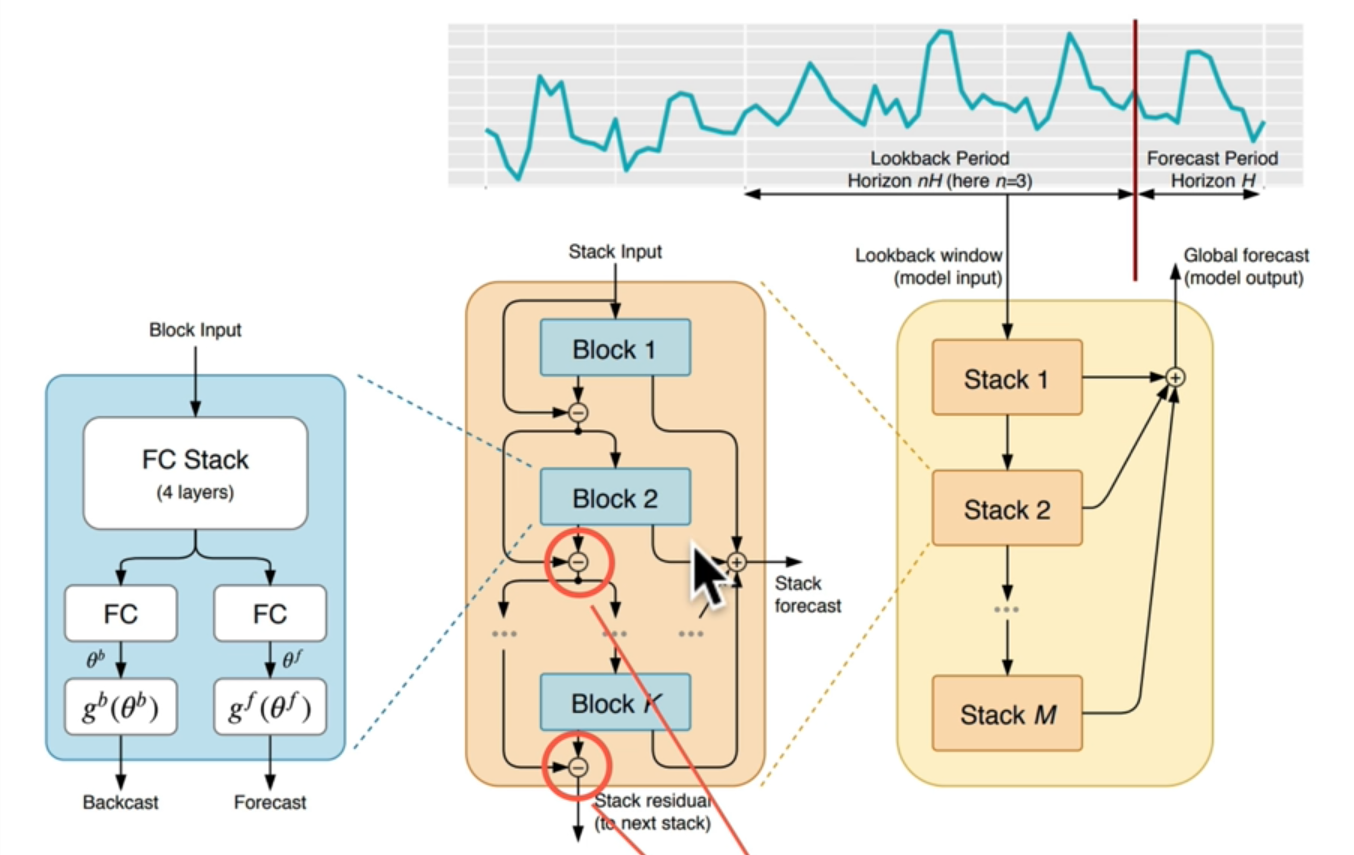

### Bulding and testing N-BEATS block layer
Because the N-BEATS block layers doesn't exist in Tensorflow , we 've got to create custom layers and models in Tensorflow we can use subclassing:
https://www.tensorflow.org/guid/keras/custom_layers_and_models

to doing so we should implement the `call` method in our class this is a fuction that apply on the input. 



In [140]:
# Create NBeats custom layers
class NBeatsBlock (tf.keras.layers.Layer):
    def __init__ (self,
                 input_size:int,
                 theta_size:int,
                 horizon: int,
                 n_neurons:int,
                 n_layers:int,
                 **kwargs): # the argments takes care of all the arguments for the parent class
        super().__init__(**kwargs)
        self.input_size = input_size
        self.theta_size = theta_size
        self.horizon = horizon
        self.n_neurons = n_neurons
        self.n_layers = n_layers
        
        # Block contains stack of 4 fully connected layers has ReLu activation
        self.hidden = [tf.keras.layers.Dense(n_neurons,activation="relu") for _ in range(n_layers)]
        # Out put of the block is a theta layer with linear activation
        self.theta_layer = tf.keras.layers.Dense(theta_size,activation="linear",name="theta")
        
    def call(self,inputs):
        x = inputs 
        for layer in self.hidden:
            x = layer(x)
#             print(type(x))
        theta = self.theta_layer(x)
        # Output the backcast and the forcast from theta
#         print(type(self.input_size))
        backcast , forecast = theta[: , :self.input_size] , theta[:,-self.horizon:]
        return backcast , forecast

Let's test our NBeatsBlock class.

To do we' ll make some dummy inputs and outputs.

In [141]:
class A ():
    def __init__(self):
        self.A_number = 1
        
    def printX1(self):
        print("this is a function in class A :X1")
        
    def printX2(self):
        print("this is a function in class A : X2")
        
        
        
class B (A): # B inheretance from A
    
    G = 0 # class variable
    
    def __init__ (self):
        self.B_number = 2 # instance variable
        
    def printX1(self):
        print("this is a function in class B : X1")
        
B_obj = B()

B_obj.printX1()

B_obj.printX2()

print(f"B_number : {B_obj.B_number}")

B_obj2 = B()

B_obj2.B_number += 1

print(f"B number in obj2 {B_obj2.B_number} B number in obj1 {B_obj.B_number}")

B.G += 1
     
print(f"G number in obj2 {B.G} B number in obj1 {B.G}")

this is a function in class B : X1
this is a function in class A : X2
B_number : 2
B number in obj2 3 B number in obj1 2
G number in obj2 1 B number in obj1 1


In [142]:
# set up dummy NBeatsBlock layer to represent inputs and outputs
dummy_nbeats_bloack_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                       theta_size=WINDOW_SIZE + HORIZON ,# back cast + forecast 
                                        horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4) 


In [143]:
# Create a dummy inputs (have to be same sixe as input_size)
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE)+1,axis=0) # input shape to the model has to reflect dense layer  input requirments  (ndim=2)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [144]:
# pass dummy inputs to dummy NBeatsBlock layer
backcast ,forecast = dummy_nbeats_bloack_layer(dummy_inputs)
# These are the activation outputs of the theta layer (they'll be random due to no training of the model)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast:{tf.squeeze(forecast.numpy())}")

Backcast: [-0.89550686  0.39756095  0.4075523   1.074677    0.25059795 -0.1674342
  0.607553  ]
Forecast:-0.4139477610588074


### Preparing data for the N-BEATS algorithm using `tf.data`

to make our data load as fast as possible we're going to be adhering to the performant data pipelin steps 

In [145]:
HORIZON = 1 
WINDOW_SIZE = 7

In [146]:
# Create N-Beats data inputs (N-Beats works with univariate time series)
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [147]:
# Add windowes columns 
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
    bitcoin_prices_nbeats[f"Price+{i+1}"] = bitcoin_prices_nbeats["Price"].shift(periods=i+1)

bitcoin_prices_nbeats.head(5)

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-01,123.65499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [148]:
# Make features and labels 
x = bitcoin_prices_nbeats.dropna().drop("Price",axis=1)
y = bitcoin_prices_nbeats.dropna()["Price"]

# Make train and test set
split_size = int(len(x)*0.8)
x_train , y_train = x[:split_size],y[:split_size]
x_test , y_test = x [split_size:] , y[split_size:]
len(x_train ), len(x_test) , len(y_train) , len(y_test)

(2224, 556, 2224, 556)

In [149]:
# Time to make our dataset performance using tf.data API
train_feature_dataset = tf.data.Dataset.from_tensor_slices(x_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)


test_feature_dataset = tf.data.Dataset.from_tensor_slices(x_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# Combine labels and features by zipping toghether
train_dataset = tf.data.Dataset.zip((train_feature_dataset,train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_feature_dataset, test_labels_dataset))

# Batch and prefetch
BATCH_SIZE = 1024
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset , test_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

 ### Setting up hyperparametrs for n-Beats algorithm

In [150]:
# Values from N-Beats paper
N_EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE , THETA_SIZE

(7, 8)

### Getting ready for residual connections 

Before we can craft our N-beats model , we need two layers for the residual connections (subtract and add ) . 

The N-BEATS algorithm uses double residual stacking to help 
train its deeper architecture (section 3.2 of N-BEATS paper).


In [151]:
# Make tensors 
tensor_1  =  tf.range(10) + 10
tensor_2  = tf.range(10)

# Subtract 
subtracted = layers.subtract([tensor_1 , tensor_2])

# Add 
added = layers.add([tensor_1,tensor_2])

# Get outputs
print(f"Input tensors:{tensor_1.numpy()} & {tensor_2.numpy()}")
print(f"Subtracted : {subtracted.numpy()}")
print(f"Added:{added.numpy()}")

Input tensors:[10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
Subtracted : [10 10 10 10 10 10 10 10 10 10]
Added:[10 12 14 16 18 20 22 24 26 28]


### Building , compiling and fitting the N-BEATS algorithm

In [152]:
def Create_model(input_size = INPUT_SIZE,
                                 theta_size = THETA_SIZE,
                                 horizon = HORIZON,
                                 n_neurons = N_NEURONS,
                                 n_layers = N_LAYERS,
                                 n_stack = N_STACKS):
    """
    Create a N-Beats model and return Not Compiled or fitted model.
    """
    
    tf.random.set_seed(42)

    # 1. Setup N-BEATS Block Layer
    Initial_block = NBeatsBlock(input_size = input_size,
                                     theta_size = theta_size,
                                     horizon = horizon,
                                     n_neurons = n_neurons,
                                     n_layers = n_layers,
                                     name = "initialBlock")
    # 2.Create Input to stack
    stack_inputs = layers.Input(shape = input_size , name = "stack_inputs")

    # 3.Create initial backcast and forecast input (backward predictions are referred to as residual in the paper)
    backcast , forecast = Initial_block(stack_inputs)

    residual = layers.Subtract(name="subtract_00")([stack_inputs , backcast])

    # 4. Create stacks of blocks
    for i , _ in enumerate(range(n_stack-1)):# first stack is already created
        # 5. Use the NBeatsBlock to caculate the backcast as well as block forecast
        backcast , block_forecast = NBeatsBlock(input_size = input_size,
                                     theta_size = theta_size,
                                     horizon = horizon,
                                     n_neurons = n_neurons,
                                     n_layers = n_layers,
                                     name = f"NBeatsBlock_{i}")(residual)
        # 6 . Create the double residual stacking
        forecast = layers.Add(name = f"Add_{i}")([forecast , block_forecast])
        residual = layers.Subtract(name = f"Subtract_{i}")([residual , backcast])



    # 7 . Put the stack model togeter 

    model = tf.keras.Model(inputs=stack_inputs,
                            outputs=forecast,
                            name ="model_7_N-BEATS")
    
    return model
    

In [153]:

model_7 = Create_model()

# 8 . Compile the model
model_7.compile(loss="mae",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["mae","mse"])
# 9 . Fit the model 
model_7.fit(train_dataset,
           epochs=N_EPOCHS,
           validation_data=test_dataset,
           verbose=1,
           callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=200, restore_best_weights=True),
                      tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=70, verbose=1)])

Epoch 1/5000
3/3 [==============================] - 28s 452ms/step - loss: 29413.7852 - mae: 29413.7852 - mse: 2597733120.0000 - val_loss: 5021.7002 - val_mae: 5021.7002 - val_mse: 54977036.0000 - lr: 0.0010
Epoch 2/5000
3/3 [==============================] - 0s 56ms/step - loss: 3035.9390 - mae: 3035.9390 - mse: 26609888.0000 - val_loss: 6811.0781 - val_mae: 6811.0781 - val_mse: 85664368.0000 - lr: 0.0010
Epoch 3/5000
3/3 [==============================] - 0s 75ms/step - loss: 673.6455 - mae: 673.6455 - mse: 1257594.0000 - val_loss: 1095.1897 - val_mae: 1095.1897 - val_mse: 4464521.5000 - lr: 0.0010
Epoch 4/5000
3/3 [==============================] - 0s 52ms/step - loss: 188.2565 - mae: 188.2565 - mse: 197288.0938 - val_loss: 10160.3115 - val_mae: 10160.3115 - val_mse: 185456960.0000 - lr: 0.0010
Epoch 5/5000
3/3 [==============================] - 0s 50ms/step - loss: 1923.5101 - mae: 1923.5101 - mse: 11091435.0000 - val_loss: 15742.2861 - val_mae: 15742.2861 - val_mse: 444798016.0000

3/3 [==============================] - 0s 51ms/step - loss: 117.5770 - mae: 117.5770 - mse: 78486.8828 - val_loss: 733.2623 - val_mae: 733.2623 - val_mse: 1568984.6250 - lr: 0.0010
Epoch 85/5000
3/3 [==============================] - 0s 52ms/step - loss: 130.1141 - mae: 130.1141 - mse: 78150.6094 - val_loss: 647.5201 - val_mae: 647.5201 - val_mse: 1415929.1250 - lr: 0.0010
Epoch 86/5000
3/3 [==============================] - 0s 51ms/step - loss: 168.1722 - mae: 168.1722 - mse: 125183.2500 - val_loss: 613.0202 - val_mae: 613.0202 - val_mse: 1302117.1250 - lr: 0.0010
Epoch 87/5000
3/3 [==============================] - 0s 52ms/step - loss: 165.7983 - mae: 165.7983 - mse: 113288.8672 - val_loss: 843.6227 - val_mae: 843.6227 - val_mse: 1939727.6250 - lr: 0.0010
Epoch 88/5000
3/3 [==============================] - 0s 51ms/step - loss: 119.1495 - mae: 119.1495 - mse: 78347.3828 - val_loss: 675.8081 - val_mae: 675.8081 - val_mse: 1542650.1250 - lr: 0.0010
Epoch 89/5000
3/3 [==================

Epoch 126/5000
3/3 [==============================] - 0s 52ms/step - loss: 311.1372 - mae: 311.1372 - mse: 300415.7812 - val_loss: 1071.0311 - val_mae: 1071.0311 - val_mse: 2821780.5000 - lr: 0.0010
Epoch 127/5000
3/3 [==============================] - 0s 51ms/step - loss: 143.1333 - mae: 143.1333 - mse: 103597.2734 - val_loss: 874.1713 - val_mae: 874.1713 - val_mse: 2404251.0000 - lr: 0.0010
Epoch 128/5000
3/3 [==============================] - 0s 50ms/step - loss: 136.9482 - mae: 136.9482 - mse: 96613.6328 - val_loss: 816.9977 - val_mae: 816.9977 - val_mse: 1879727.3750 - lr: 0.0010
Epoch 129/5000
3/3 [==============================] - 0s 51ms/step - loss: 175.5408 - mae: 175.5408 - mse: 127140.7656 - val_loss: 688.4392 - val_mae: 688.4392 - val_mse: 1596286.6250 - lr: 0.0010
Epoch 130/5000
3/3 [==============================] - 0s 52ms/step - loss: 213.1288 - mae: 213.1288 - mse: 177796.3438 - val_loss: 870.3964 - val_mae: 870.3964 - val_mse: 2164202.2500 - lr: 0.0010
Epoch 131/5000

Epoch 168/5000
3/3 [==============================] - 0s 52ms/step - loss: 104.6405 - mae: 104.6405 - mse: 63791.0234 - val_loss: 595.4256 - val_mae: 595.4256 - val_mse: 1251884.1250 - lr: 0.0010
Epoch 169/5000
3/3 [==============================] - 0s 53ms/step - loss: 107.0273 - mae: 107.0273 - mse: 59961.5703 - val_loss: 589.9551 - val_mae: 589.9551 - val_mse: 1226648.6250 - lr: 0.0010
Epoch 170/5000
3/3 [==============================] - 0s 51ms/step - loss: 108.0750 - mae: 108.0750 - mse: 65398.0000 - val_loss: 592.4805 - val_mae: 592.4805 - val_mse: 1223861.3750 - lr: 0.0010
Epoch 171/5000
3/3 [==============================] - 0s 51ms/step - loss: 122.1264 - mae: 122.1264 - mse: 68174.0312 - val_loss: 593.1109 - val_mae: 593.1109 - val_mse: 1229268.0000 - lr: 0.0010
Epoch 172/5000
3/3 [==============================] - 0s 51ms/step - loss: 119.4171 - mae: 119.4171 - mse: 74181.0938 - val_loss: 594.3365 - val_mae: 594.3365 - val_mse: 1245680.1250 - lr: 0.0010
Epoch 173/5000
3/3 [

Epoch 209/5000
3/3 [==============================] - 0s 51ms/step - loss: 89.8188 - mae: 89.8188 - mse: 49301.1250 - val_loss: 589.1799 - val_mae: 589.1799 - val_mse: 1182090.7500 - lr: 1.0000e-04
Epoch 210/5000
3/3 [==============================] - 0s 53ms/step - loss: 89.6921 - mae: 89.6921 - mse: 49227.4258 - val_loss: 589.4440 - val_mae: 589.4440 - val_mse: 1182273.6250 - lr: 1.0000e-04
Epoch 211/5000
3/3 [==============================] - 0s 53ms/step - loss: 89.6579 - mae: 89.6579 - mse: 49058.6250 - val_loss: 589.8010 - val_mae: 589.8010 - val_mse: 1181648.8750 - lr: 1.0000e-04
Epoch 212/5000
3/3 [==============================] - 0s 51ms/step - loss: 89.5114 - mae: 89.5114 - mse: 49010.3711 - val_loss: 589.7377 - val_mae: 589.7377 - val_mse: 1180318.3750 - lr: 1.0000e-04
Epoch 213/5000
3/3 [==============================] - 0s 52ms/step - loss: 89.3921 - mae: 89.3921 - mse: 48837.8945 - val_loss: 589.4791 - val_mae: 589.4791 - val_mse: 1179865.5000 - lr: 1.0000e-04
Epoch 214/

Epoch 291/5000
3/3 [==============================] - 0s 52ms/step - loss: 85.2971 - mae: 85.2971 - mse: 45576.8398 - val_loss: 601.3148 - val_mae: 601.3148 - val_mse: 1208021.0000 - lr: 1.0000e-05
Epoch 292/5000
3/3 [==============================] - 0s 53ms/step - loss: 85.2906 - mae: 85.2906 - mse: 45571.2344 - val_loss: 601.3167 - val_mae: 601.3167 - val_mse: 1208207.6250 - lr: 1.0000e-05
Epoch 293/5000
3/3 [==============================] - 0s 52ms/step - loss: 85.2893 - mae: 85.2893 - mse: 45574.0859 - val_loss: 601.3057 - val_mae: 601.3057 - val_mse: 1208443.2500 - lr: 1.0000e-05
Epoch 294/5000
3/3 [==============================] - 0s 51ms/step - loss: 85.2802 - mae: 85.2802 - mse: 45558.5195 - val_loss: 601.3822 - val_mae: 601.3822 - val_mse: 1208111.3750 - lr: 1.0000e-05
Epoch 295/5000
3/3 [==============================] - 0s 52ms/step - loss: 85.2567 - mae: 85.2567 - mse: 45547.2500 - val_loss: 601.3720 - val_mae: 601.3720 - val_mse: 1208156.0000 - lr: 1.0000e-05
Epoch 296/

In [154]:
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 22ms/step - loss: 582.5573 - mae: 582.5573 - mse: 1165783.7500


[582.5573120117188, 582.5573120117188, 1165783.75]

In [155]:
model_7_preds = model_7.predict(test_dataset)
model_7_preds[:10]

1/1 [==============================] - 1s 721ms/step


array([[8913.31 ],
       [8814.114],
       [8953.217],
       [8776.037],
       [8793.435],
       [8746.868],
       [8654.574],
       [8512.688],
       [8508.281],
       [8479.905]], dtype=float32)

In [156]:
model_7_results = evaluate_preds(y_test,
                                tf.squeeze(model_7_preds))
model_7_results

{'mae': 582.5573,
 'mse': 1165783.8,
 'rmse': 1079.7146,
 'mape': 2.6960828,
 'mase': 1.0233918}

even with all of these hand-craft network , it looks like the N-BEATS model doesn't perform as well as `model_1` or the original naive forecast.

This goes to show the power of smaller networks as well as the fact not all larger models are better suited for certain type pf data.

### Plotting the N-BEATS architecture we've created

In [157]:
# Plot the N-beats model and inspect the architecture
from tensorflow.keras.utils import plot_model
plot_model(model_7)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


## Model 8 : Creating an ensemble (stacking diffrent models together)

An ensemble leverages the wisdom of the crowd effect.
It combine many **diffrent** models to predict a common goal.

In [158]:
HORIZON = 1 
WINDOW_SIZE = 7

### Construct and fitting an ensemble of models (using diffrent loss functions)

In [159]:
def get_ensemble_model(horizon=HORIZON,
                      train_data=train_dataset,
                      test_data=test_dataset,
                      num_iter=10,
                      num_epochs=1000,
                      loss_fns=["mae","mse","mape"]):
    """
    Returns a list of num_iter models each trained on MAE , MSE , MAPE loss.
    
    For example, if num_iter=100 a list of 30 trained models will be returned:
    10 * len(["mae" , "mse","mape"]).
    """
    
    # Make empty list for trained ensemble models models
    ensemble_models = []
    
    # Create num_iter number of models per loss function
    for i in range(num_iter):
        # Build and fit a new model with diffrent loss function
        for loss_function in loss_fns:
            print(f"Optimizing model by reducing:{loss_function} for {num_epochs} epochs, model number : {i}")
                  
            
            # Construct a N-Beats model (similar to model_7)
            #model = Create_model()
            
            # Construct a simple model (similar to model_1)
            model = tf.keras.Sequential([
                # Initialize dense layers with normal distribution for estimating prediction intervals later on 
                layers.Dense(128,kernel_initializer = "he_normal" , activation="relu"),
                layers.Dense(128 , kernel_initializer = "he_normal",activation="relu"),
                layers.Dense(HORIZON)
            ])
                  
            # Compile a simple model with current loss funcion
            model.compile(loss=loss_function,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics = ["mae" , "mse"])
                  
            # Fit the current model
            model.fit(train_data,
                      epochs=num_epochs,
                      verbose=0,
                      validation_data = test_data,
                      callbacks = [tf.keras.callbacks.EarlyStopping(monitor = "val_loss",
                                                                    patience=200,
                                                                    restore_best_weights=True),
                                  tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                    patience=100,
                                                                    verbose=1)])
                  
            # Append fitted model to lost of ensemble models
            ensemble_models.append(model)
        
    return ensemble_models

In [160]:
%%time
ensemble_models = get_ensemble_model(num_iter=5)

Optimizing model by reducing:mae for 1000 epochs, model number : 0

Epoch 289: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 733: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 833: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Optimizing model by reducing:mse for 1000 epochs, model number : 0

Epoch 427: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 527: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing:mape for 1000 epochs, model number : 0

Epoch 203: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 352: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 452: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Optimizing model by reducing:mae for 1000 epochs, model number : 1

Epoch 301: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 401:

### Make predictions with our ensemble model

In [161]:
def make_ensemble_preds(ensemble_models , data):
    ensemble_preds = []
    for model in ensemble_models:
        preds = model.predict(data)
        ensemble_preds.append(preds)
    return tf.constant(tf.squeeze(ensemble_preds))

In [162]:
%%time
# Create a list of ensemble predictions
ensemble_preds = make_ensemble_preds(ensemble_models,
                         test_dataset)

1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 24ms/step
CPU times: user 444 ms, sys: 39.4 ms, total: 483 ms
Wall time: 431 ms


In [163]:
ensemble_preds.shape

TensorShape([15, 556])

Our ensemble preds come out in multiple dimensions but to combine into `Point prediction` we can leverage the mean of all of the predictions or the median of all predictions

In [164]:
ensemble_mean = tf.reduce_mean(ensemble_preds,axis=0)
ensemble_mean[:10] , ensemble_mean.shape

(<tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8783.272 , 8771.3545, 9056.007 , 8710.22  , 8743.267 , 8714.449 ,
        8651.841 , 8475.725 , 8443.061 , 8518.2   ], dtype=float32)>,
 TensorShape([556]))

In [165]:
ensemble_median = np.median(ensemble_preds ,axis=0)
ensemble_median[:10] , ensemble_median.shape

(array([8785.307, 8771.288, 9062.399, 8713.092, 8749.921, 8720.058,
        8643.989, 8481.126, 8452.769, 8511.064], dtype=float32),
 (556,))

In [166]:
# Evaluate ensemble model predictions
ensemble_results = evaluate_preds(y_test,
                                 ensemble_preds)
ensemble_results

{'mae': 579.04333,
 'mse': 1181153.6,
 'rmse': 1086.7239,
 'mape': 2.6276789,
 'mase': 1.0172188}

In [167]:
# Evaluate ensemble model predictions
ensemble_results = evaluate_preds(y_test,
                                 ensemble_mean)
ensemble_results

{'mae': 568.70056,
 'mse': 1149051.6,
 'rmse': 1071.9382,
 'mape': 2.5697305,
 'mase': 0.99904937}

In [168]:
# Evaluate ensemble model predictions
ensemble_results = evaluate_preds(y_test,
                                 ensemble_median)
ensemble_results

{'mae': 569.98926,
 'mse': 1155421.9,
 'rmse': 1074.9055,
 'mape': 2.572401,
 'mase': 1.0013132}

### Plotting the predictions intervals (uncertainty estimates) of our ensemble 
Right now all of our model's (prior to the ensemble model) are predicting single points. 

Meaning, given a set of `WINDOW_SIZE=7` values, the model will predict `HORIZION=1`.

But what might be more helpful than a single value?

Perhaps a range of values?

For example, if a model is predicting the price of Bitcoin to be 50,000USD tomorrow, would it be helpful to know it's predicting the 50,000USD because it's predicting the price to be between 48,000 and 52,000USD? (note: "$" has been omitted from the previous sentence due to formatting issues)

Knowing the range of values a model is predicting may help you make better decisions for your forecasts.

You'd know that although the model is predicting 50,000USD (a **point prediction**, or single value in time), the value could actually be within the range 48,000USD to 52,000USD (of course, the value could also be *outside* of this range as well, but we'll get to that later).

These kind of prediction ranges are called **prediction intervals** or **uncertainty estimates**. And they're often as important as the forecast itself.

Why?

Because **point predictions** are almost always going to be wrong. So having a range of values can help with decision making.

One way of getting the 95% condfidnece prediction intervals for a deep learning model is the bootstrap method: 
1. Take the predictions from a number of randomly initialized models (we've got this thanks to our ensemble model)
2. Measure the standard deviation of the predictions
3. Multiply standard deviation by [1.96](https://en.wikipedia.org/wiki/1.96) (assuming the distribution is Gaussian, 95% of observations fall within 1.96 standard deviations of the mean, this is why we initialized our neural networks with a normal distribution)
4. To get the prediction interval upper and lower bounds, add and subtract the value obtained in (3) to the mean/median of the predictions made in (1)


In [169]:
# Find upper and lower bounds of ensemble predictions
def get_upper_lower (preds): # 1. take the predictions from a number of randomly initialized model
    
    # 2. Measure the standard deviation of the predictions
    std = tf.math.reduce_std(preds,axis=0)
    
    # 3. Multiply the standard deviation by 1.96
    interval = 1.96 * std
    
    # 4. Get the prediction interval upper and lower bounds
    preds_mean = tf.reduce_mean(preds , axis=0)
    lower , upper = preds_mean - interval , preds_mean + interval
    
    return upper , lower

In [170]:
# Get the upper and lowe bounds of the 95% precent prediction interval
upper , lower = get_upper_lower (preds=ensemble_preds)

In [171]:
x_test.index.shape , lower.shape

((556,), TensorShape([556]))

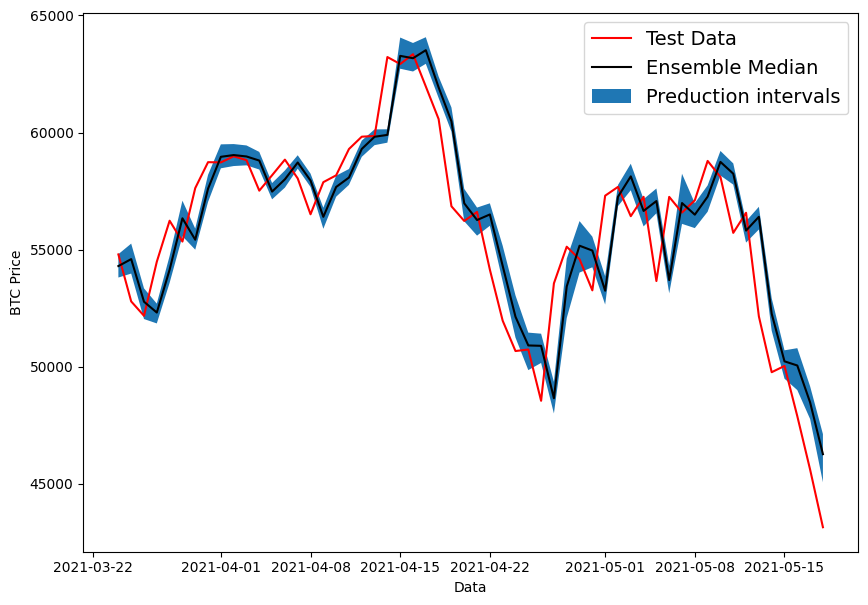

In [172]:
import matplotlib.pyplot as plt

start = 500
plt.figure(figsize=(10,7))
plt.plot(x_test.index[start:],y_test[start:],"r-",label="Test Data")
plt.plot(x_test.index[start:],ensemble_median[start:],"k-",label="Ensemble Median")
plt.xlabel("Data")
plt.ylabel("BTC Price")
plt.fill_between(x_test.index[start:],
                 (upper[start:]) , (lower[start:]),label="Preduction intervals")

plt.legend(loc="best",fontsize=14);

## Model 9 : Train a model on full historical data to make predictions into the future

In [173]:
HORIZON = 1
WINDOW_SIZE = 7

In [174]:
bitcoin_prices_windowed.head()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [175]:
# Train model on entire data to make predictions for the next day
x_all = bitcoin_prices_windowed.dropna().drop(["Price","block_reward"],axis=1).to_numpy()
# Get labels
y_all = bitcoin_prices_windowed.dropna()["Price"].to_numpy()

len(x_all) , len(y_all)

(2780, 2780)

In [176]:
dataset_all = tf.data.Dataset.from_tensor_slices((x_all,y_all)).batch(1024).prefetch(tf.data.AUTOTUNE)
dataset_all

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [177]:
tf.random.set_seed(42)

# Create model (nice and simple, just to test)
model_9 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
])

# Compile
model_9.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam())

# Fit model on all of the data to make future forecasts
model_9.fit(dataset_all,
            epochs=100,
            verbose=0) # don't print out anything, we've seen this all before

In [210]:
def make_future_prediction(values , model , into_future , window_size = WINDOW_SIZE):
    """
    
  Makes future forecasts into_future steps after values ends.

  Returns future forecasts as list of floats.

    
    """
    
    future_forecast = []
    
    future_val = values
    
    for _ in range(into_future):
        
        
        
        pred = model.predict(tf.expand_dims(future_val[-window_size:],axis=0))
        
        future_forecast.append(pred)
        
        print(f"For this sequence :  {future_val} \n\nmodel predict this : {pred}")
        
        future_val = np.append(future_val , pred)
        
        df = pd.DataFrame(future_val,columns=["Price"])
        
        for i in range(window_size):
            
            df[f"Price{i+1}"] = df["Price"].shift(i+1)

        x = df.dropna().drop(["Price"],axis=1).to_numpy()
        
        y = df.dropna()["Price"].to_numpy()
        
#         print(len(x),len(y))
        
        dataset = tf.data.Dataset.from_tensor_slices((x,y)).batch(1024).prefetch(tf.data.AUTOTUNE)
        
        print("\n\n\nModel Train on new data...\n\n")
        
        
        model.fit(dataset,
                 epochs=100,
                 verbose=0)
        
    return tf.squeeze(future_forecast)
        

In [211]:
future_forecast = make_future_prediction(values=y_all,
                                       model=model_9,
                                       into_future=14,
                                       window_size=WINDOW_SIZE)

1/1 [==============================] - 0s 47ms/step
For this sequence :  [  123.033        124.049        125.96116    ... 47885.62525472
 45604.61575361 43144.47129086] 

model predict this : [[56656.746]]



Model Train on new data...


1/1 [==============================] - 0s 44ms/step
For this sequence :  [  123.033        124.049        125.96116    ... 45604.61575361
 43144.47129086 56656.74609375] 

model predict this : [[50659.85]]



Model Train on new data...


1/1 [==============================] - 0s 46ms/step
For this sequence :  [  123.033        124.049        125.96116    ... 43144.47129086
 56656.74609375 50659.8515625 ] 

model predict this : [[49111.754]]



Model Train on new data...


1/1 [==============================] - 0s 45ms/step
For this sequence :  [  123.033        124.049        125.96116    ... 56656.74609375
 50659.8515625  49111.75390625] 

model predict this : [[48367.527]]



Model Train on new data...


1/1 [==============================] - 0s 44m

In [212]:
future_forecast

<tf.Tensor: shape=(14,), dtype=float32, numpy=
array([56656.746, 50659.85 , 49111.754, 48367.527, 47919.965, 44935.613,
       38807.88 , 58909.1  , 48161.332, 49342.965, 51872.633, 50033.156,
       38825.004, 22488.732], dtype=float32)>

## Plot future forecast

In [221]:
def get_future_dates(start_date , into_future , offset=1):
    """
    Returns array of datetime values rangeing from start_date+1day to start_date+into_future
    """
    
    start_date = start_date + np.timedelta64(offset,"D") # Specify start date , "D" stand for  day
    end_date = start_date + np.timedelta64(into_future,"D") # Specify end date
    return np.arange(start_date , end_date,dtype="datetime64[D]") # return a date range

In [222]:
# Last timestep
last_timestep = bitcoin_prices.index[-1]
last_timestep

Timestamp('2021-05-18 00:00:00')

In [223]:
# Get next two week of timesetep
next_time_steps = get_future_dates(start_date=last_timestep,
                                  into_future=14)
next_time_steps

array(['2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
       '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
       '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
       '2021-05-31', '2021-06-01'], dtype='datetime64[D]')

In [224]:
# Insert last timestep/final price into next time steps and future forecast
next_time_steps = np.insert(next_time_steps,0,last_timestep)
future_forecast = np.insert(future_forecast,0,btc_price[-1])
next_time_steps , future_forecast

(array(['2021-05-18', '2021-05-19', '2021-05-20', '2021-05-21',
        '2021-05-22', '2021-05-23', '2021-05-24', '2021-05-25',
        '2021-05-26', '2021-05-27', '2021-05-28', '2021-05-29',
        '2021-05-30', '2021-05-31', '2021-06-01'], dtype='datetime64[D]'),
 array([43144.473, 56656.746, 50659.85 , 49111.754, 48367.527, 47919.965,
        44935.613, 38807.88 , 58909.1  , 48161.332, 49342.965, 51872.633,
        50033.156, 38825.004, 22488.732], dtype=float32))

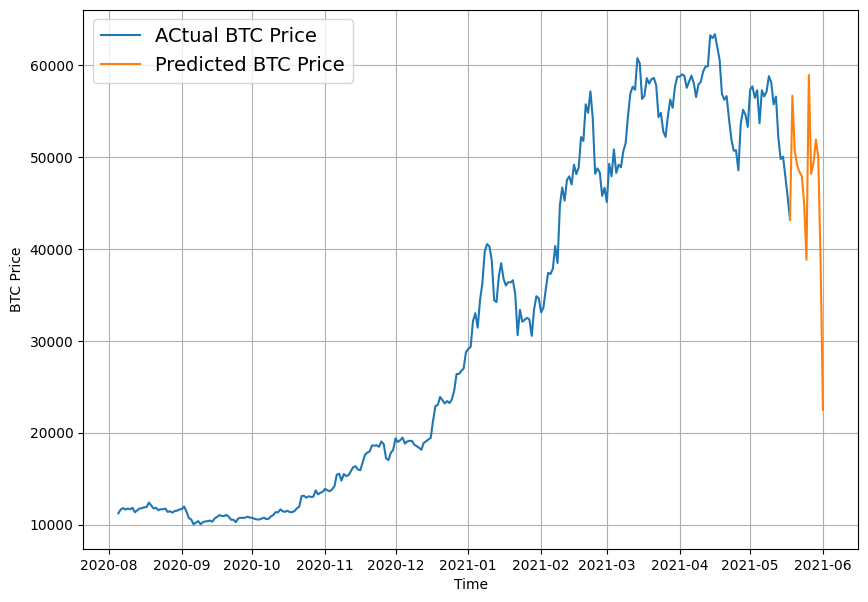

In [233]:
# Plot  future prices predictions of bitcoin 
plt.figure(figsize=(10,7))
plot_times_series(bitcoin_prices.index , btc_price ,start=2500,format="-",label="ACtual BTC Price")
plot_times_series(next_time_steps,future_forecast,format="-",label="Predicted BTC Price")